## section 1
creation of HDF5 dataframe and adding the images(preporcessed) and labels. this step helps us by making it easy to load the already preprocessed data into the training phase 

#### dataset
The dataset used in this Notebook is taken from intel image classification hosted at kaggle . Thanks to puneeth6060 for providing the data . download and extract the dataset into the ```../data_intel``` directory.

```
hdf5_implimentation
│   README.md
│     
│
└───dataset_intel
│   │   
│   └───seg_train 
|   |  |
|   |  |____seg_train
|   |    |
│   │    |___buildings
│   │    |___forest 
│   |    |___glacier
|   |    |___mountain
|   |    |___sea
|   |    |___street
|   |
|   |
│   └───seg_test
|   |  |____seg_test
|   |    |
│   │    |___buildings
│   │    |___forest 
│   |    |___glacier
|   |    |___mountain
|   |    |___sea
|   |    |___street
│   
└───code
    │  
```


dataset https://www.kaggle.com/puneet6060/intel-image-classification
    

In [1]:
import os
import glob
from random import shuffle
import numpy as np
import random
import h5py
from tqdm import tqdm_notebook as tqdm
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

iterate throught the train and test folder to read the image path and create appropriate labels

In [2]:
base_path_train = "../data_intel/seg_train/seg_train/"
base_path_test  = "../data_intel/seg_test/seg_test/"
folder_list = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street'] ### folder name and the labels will be generated in this format
print(folder_list)


### get the paths for the image 

train_image_path = []
test_image_path  = []
train_label = []
test_label = []
for i in range (0,len(folder_list)):
    
    train_datas = glob.glob(base_path_train + folder_list[i] +'/' + '*.jpg')
    test_datas = glob.glob(base_path_test + folder_list[i] +'/' + '*.jpg')
    train_label += [i]*len(train_datas)
    test_label += [i]*len(test_datas)
    train_image_path += train_datas
    test_image_path  += test_datas
    
    print("the image count for {} is {}".format(folder_list[i],len(train_datas)))
    
print("training image count : ",np.array(train_image_path).shape)
print("testing image count : ",np.array(test_image_path).shape)
print("training lebel count : ",np.array(train_label).shape)
print("testing label count : ",np.array(test_label).shape)



['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
the image count for buildings is 2191
the image count for forest is 2271
the image count for glacier is 2404
the image count for mountain is 2512
the image count for sea is 2274
the image count for street is 2382
training image count :  (14034,)
testing image count :  (3000,)
training lebel count :  (14034,)
testing label count :  (3000,)


shuffling the dataset

In [3]:
# training data
c = list(zip(train_image_path, train_label))
shuffle(c)
train_image_path, train_label = zip(*c)

#testing data
c = list(zip(test_image_path, test_label))
shuffle(c)
test_image_path, test_label = zip(*c)


#### creating the HDF5 file 

The Creation of HDF5 file starts with opening an hdf5 file and creating dataset by giving it a unique name ,shape and datatype
of the value to be stored . all these things should be provided bofore saving the data onto the dataset. the size of the dataset should not exceed the shape provided during the creation


In [4]:
hdf5_path = '..\\hdf5_data\\intel_nature_dataset.hdf5'

train_shape = (len(train_image_path),150,150,3)
test_shape = (len(test_image_path),150,150,3)

hdf5_file = h5py.File(hdf5_path, mode='w')

hdf5_file.create_dataset("train_img",train_shape,np.float32)
hdf5_file.create_dataset("test_img",test_shape,np.float32)

hdf5_file.create_dataset("train_label",(len(train_label),6),np.float32)
hdf5_file.create_dataset("test_label",(len(test_label),6),np.float32)

<HDF5 dataset "test_label": shape (3000, 6), type "<f4">

converting the integer label into one hot encoding using TF.one_hot function . this makes our life easy when it comes to 

In [5]:
### actual label conversion
classes = 6 ### number of classes
training_one_hot = tf.one_hot(train_label, classes)
testing_one_hot  = tf.one_hot(test_label, classes)

with tf.Session().as_default():
    testing_label  = testing_one_hot.eval() # to convet tensor into np array
    training_label  = training_one_hot.eval() # to convet tensor into np array
print(testing_label.shape)
print(training_label.shape)

(3000, 6)
(14034, 6)


#### data visualization

visualize the dataset by ploting the image and corresponding label

Text(0.5, 1.0, 'Label : 3')

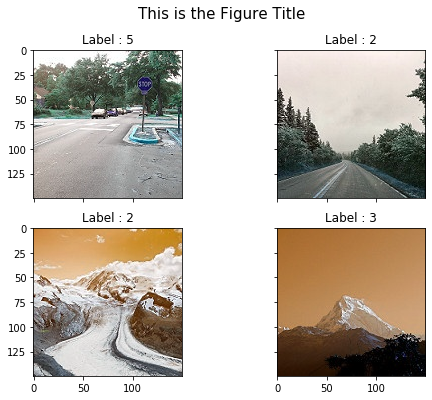

In [6]:


# classes ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

fig, axes =plt.subplots(2, 2, figsize=(8, 6), sharex=True, sharey=True)
fig.suptitle('This is the Figure Title', fontsize=15)

choice = random.randrange(0,14034-1)

axes[0,0].imshow(cv2.imread(train_image_path[choice]))
axes[0,0].set_title("Label : "+str(np.argmax(training_label[choice])))

choice = random.randrange(0,14034-1)

axes[0,1].imshow(cv2.imread(train_image_path[choice]))
axes[0,1].set_title("Label : "+str(np.argmax(training_label[choice])))

choice = random.randrange(0,14034-1)

axes[1,0].imshow(cv2.imread(train_image_path[choice]))
axes[1,0].set_title("Label : "+str(np.argmax(training_label[choice])))

choice = random.randrange(0,14034-1)

axes[1,1].imshow(cv2.imread(train_image_path[choice]))
axes[1,1].set_title("Label : "+str(np.argmax(training_label[choice])))

lets print some of the one hot encoded np arrays

In [7]:
training_label[0:10]


array([[0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0.]], dtype=float32)

lets copy the labels into the placeholder created in the hdf5 file 

In [8]:

hdf5_file["test_label"][...] = testing_label

hdf5_file["train_label"][...] = training_label


Load the training image, resize, normalize and save them into the dataset

In [9]:
def image_load_and_preprocess(path):
    img = cv2.imread(train_image_path[i])
    img = cv2.resize(img,(150,150),interpolation=cv2.INTER_CUBIC)
    img = img/255.0 # conver (0-255) value into (0-1) for training the neural network easily
    return img

In [10]:

for i in tqdm(range(len(train_image_path))):
    img = image_load_and_preprocess(train_image_path[i])
    hdf5_file["train_img"][i,...] = img[None]

Load the test image, resize, normalize and save them into the dataset

In [11]:

for i in tqdm(range(len(test_image_path))):
    img = cv2.imread(test_image_path[i])
    img = cv2.resize(img,(150,150),interpolation=cv2.INTER_CUBIC)
    img = img/255.0
    hdf5_file["test_img"][i,...] = img[None]

#### HDF5 creation is done.
its done. now we only haveto cose the hdf5 file to save it 

In [12]:
hdf5_file.close()

## section 2

load the hdf5 dataframe and train a image classifier much faster.

In [2]:
IMG_HEIGHT = IMG_WIDTH = 150

#### CNN classifier
a simple CNN based image classifer to classify image into 6 classes

In [3]:
model = Sequential([Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
                    MaxPooling2D(),
                    Conv2D(32, 3, padding='same', activation='relu'),
                    MaxPooling2D(),
                    Conv2D(64, 3, padding='same', activation='relu'),
                    MaxPooling2D(),
                    Conv2D(128, 3, padding='same', activation='relu'),
                    MaxPooling2D(),
                    Flatten(),
                    Dropout(0.5),
                    #Dense(1024,activation='relu'),
                    Dense(512,activation='relu'),
                    Dense(6,activation='softmax') 
                   ])

adding tensorboard callback to monitor the training process 

to visualize the metrics, use the cmd in a separete terminal to bring up the tensorboard dashboard . use it in the approprite folder location or give the proper path for the log folder 
```tensorboard --logdir ./log ```

In [4]:
tb_callback = keras.callbacks.TensorBoard(log_dir='./logs', histogram_freq=0, batch_size=32, write_graph=True, write_grads=False, write_images=False, embeddings_freq=0, embeddings_layer_names=None, embeddings_metadata=None, embeddings_data=None)

optimize = adam optimizer

loss = categorical crossentropy (as we have multiple classes 6)

In [5]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 128)       73856     
__________

a simple data generator

TODO: replace this with tensorfloe dataiterator or equivalent with multithread reading functionality

In [7]:
def train_generator(hdf5_path,X,Y,batch_size):
    hdf5_file = h5py.File(hdf5_path,"r")
    length = hdf5_file[X].shape[0]
    start = 0
    while True:
        train_x = hdf5_file[X][start:start+batch_size,...]
        train_y = hdf5_file[Y][start:start+batch_size,...]
        
        start += batch_size
        
        if start+batch_size > length:
            start = 0
        yield train_x,train_y
        
        
        

initialize the generator by passing the hdf5 file path and batch size

In [8]:
hdf5_path = '..\\hdf5_data\\intel_nature_dataset.hdf5'
batch_size = 32
train_gen = train_generator(hdf5_path,"train_img","train_label",batch_size)

In [9]:
test_gen = train_generator(hdf5_path,"test_img","test_label",batch_size)

check if the generator works 

In [29]:
next(train_gen)

(array([[[[0.92156863, 0.95686275, 0.96862745],
          [0.9764706 , 0.99607843, 1.        ],
          [1.        , 0.9764706 , 1.        ],
          ...,
          [0.        , 0.09803922, 0.03921569],
          [0.03921569, 0.13725491, 0.09803922],
          [0.        , 0.0627451 , 0.02745098]],
 
         [[0.9647059 , 1.        , 1.        ],
          [0.98039216, 0.99607843, 1.        ],
          [1.        , 0.98039216, 1.        ],
          ...,
          [0.32156864, 0.49411765, 0.44313726],
          [0.03529412, 0.17254902, 0.13333334],
          [0.        , 0.05882353, 0.02352941]],
 
         [[0.9411765 , 0.9843137 , 0.9764706 ],
          [0.85882354, 0.8784314 , 0.8745098 ],
          [0.92941177, 0.8862745 , 0.8980392 ],
          ...,
          [0.44705883, 0.68235296, 0.6431373 ],
          [0.        , 0.15686275, 0.12941177],
          [0.13333334, 0.3137255 , 0.2901961 ]],
 
         ...,
 
         [[0.03137255, 0.07450981, 0.09019608],
          [0.03529

In [10]:
#list of callbacks
# add model weight saving callback if needed 
callbacks = [tb_callback]

In [ ]:
model.fit_generator(train_gen, steps_per_epoch= int(14034/batch_size), epochs=10, verbose=1, callbacks=callbacks, validation_data=test_gen, validation_steps= int(3000/batch_size))

Epoch 1/10


 466/7017 [>.............................] - ETA: 6:32:44 - loss: 1.7353 - acc: 0.0000e+ - ETA: 2:13:03 - loss: 1.9017 - acc: 0.1667   - ETA: 1:21:06 - loss: 1.9127 - acc: 0.20 - ETA: 58:47 - loss: 1.9662 - acc: 0.1429 - ETA: 41:58 - loss: 1.9250 - acc: 0.10 - ETA: 35:28 - loss: 1.8961 - acc: 0.16 - ETA: 30:50 - loss: 1.8827 - acc: 0.17 - ETA: 27:22 - loss: 1.8695 - acc: 0.18 - ETA: 24:41 - loss: 1.8659 - acc: 0.16 - ETA: 22:33 - loss: 1.8603 - acc: 0.15 - ETA: 20:50 - loss: 1.8571 - acc: 0.15 - ETA: 19:22 - loss: 1.8446 - acc: 0.20 - ETA: 18:08 - loss: 1.8353 - acc: 0.19 - ETA: 17:05 - loss: 1.8335 - acc: 0.17 - ETA: 16:09 - loss: 1.8356 - acc: 0.16 - ETA: 15:20 - loss: 1.8266 - acc: 0.18 - ETA: 14:15 - loss: 1.8222 - acc: 0.18 - ETA: 13:20 - loss: 1.8114 - acc: 0.18 - ETA: 12:50 - loss: 1.8009 - acc: 0.18 - ETA: 12:08 - loss: 1.7922 - acc: 0.18 - ETA: 11:44 - loss: 1.7962 - acc: 0.18 - ETA: 11:23 - loss: 1.7963 - acc: 0.20 - ETA: 11:04 - loss: 1.7926 - acc: 0.20 - ETA: 10:47 - loss: 

 951/7017 [===>..........................] - ETA: 3:42 - loss: 1.4829 - acc: 0.385 - ETA: 3:42 - loss: 1.4811 - acc: 0.386 - ETA: 3:42 - loss: 1.4813 - acc: 0.385 - ETA: 3:41 - loss: 1.4840 - acc: 0.384 - ETA: 3:41 - loss: 1.4849 - acc: 0.383 - ETA: 3:40 - loss: 1.4849 - acc: 0.383 - ETA: 3:40 - loss: 1.4838 - acc: 0.383 - ETA: 3:40 - loss: 1.4805 - acc: 0.385 - ETA: 3:40 - loss: 1.4790 - acc: 0.385 - ETA: 3:40 - loss: 1.4785 - acc: 0.384 - ETA: 3:40 - loss: 1.4782 - acc: 0.383 - ETA: 3:40 - loss: 1.4763 - acc: 0.384 - ETA: 3:40 - loss: 1.4743 - acc: 0.385 - ETA: 3:40 - loss: 1.4732 - acc: 0.385 - ETA: 3:39 - loss: 1.4698 - acc: 0.388 - ETA: 3:39 - loss: 1.4748 - acc: 0.388 - ETA: 3:39 - loss: 1.4730 - acc: 0.389 - ETA: 3:39 - loss: 1.4734 - acc: 0.387 - ETA: 3:39 - loss: 1.4721 - acc: 0.389 - ETA: 3:38 - loss: 1.4697 - acc: 0.390 - ETA: 3:38 - loss: 1.4687 - acc: 0.390 - ETA: 3:38 - loss: 1.4698 - acc: 0.388 - ETA: 3:38 - loss: 1.4720 - acc: 0.387 - ETA: 3:38 - loss: 1.4722 - acc: 0.3

1446/7017 [=====>........................] - ETA: 3:02 - loss: 1.3364 - acc: 0.440 - ETA: 3:02 - loss: 1.3347 - acc: 0.441 - ETA: 3:02 - loss: 1.3341 - acc: 0.442 - ETA: 3:02 - loss: 1.3343 - acc: 0.441 - ETA: 3:02 - loss: 1.3347 - acc: 0.442 - ETA: 3:02 - loss: 1.3333 - acc: 0.442 - ETA: 3:02 - loss: 1.3326 - acc: 0.443 - ETA: 3:02 - loss: 1.3310 - acc: 0.444 - ETA: 3:02 - loss: 1.3308 - acc: 0.444 - ETA: 3:02 - loss: 1.3322 - acc: 0.444 - ETA: 3:02 - loss: 1.3334 - acc: 0.444 - ETA: 3:02 - loss: 1.3326 - acc: 0.444 - ETA: 3:01 - loss: 1.3330 - acc: 0.444 - ETA: 3:01 - loss: 1.3327 - acc: 0.444 - ETA: 3:01 - loss: 1.3321 - acc: 0.444 - ETA: 3:01 - loss: 1.3317 - acc: 0.443 - ETA: 3:01 - loss: 1.3321 - acc: 0.443 - ETA: 3:01 - loss: 1.3319 - acc: 0.443 - ETA: 3:01 - loss: 1.3309 - acc: 0.443 - ETA: 3:01 - loss: 1.3322 - acc: 0.443 - ETA: 3:00 - loss: 1.3297 - acc: 0.444 - ETA: 3:00 - loss: 1.3286 - acc: 0.444 - ETA: 3:00 - loss: 1.3259 - acc: 0.445 - ETA: 3:00 - loss: 1.3255 - acc: 0.4

1945/7017 [=======>......................] - ETA: 2:39 - loss: 1.2290 - acc: 0.490 - ETA: 2:38 - loss: 1.2271 - acc: 0.491 - ETA: 2:38 - loss: 1.2259 - acc: 0.491 - ETA: 2:38 - loss: 1.2271 - acc: 0.492 - ETA: 2:38 - loss: 1.2266 - acc: 0.492 - ETA: 2:38 - loss: 1.2252 - acc: 0.493 - ETA: 2:38 - loss: 1.2256 - acc: 0.492 - ETA: 2:38 - loss: 1.2255 - acc: 0.492 - ETA: 2:38 - loss: 1.2263 - acc: 0.492 - ETA: 2:37 - loss: 1.2255 - acc: 0.492 - ETA: 2:37 - loss: 1.2272 - acc: 0.491 - ETA: 2:37 - loss: 1.2283 - acc: 0.491 - ETA: 2:37 - loss: 1.2299 - acc: 0.491 - ETA: 2:37 - loss: 1.2290 - acc: 0.491 - ETA: 2:37 - loss: 1.2281 - acc: 0.491 - ETA: 2:37 - loss: 1.2277 - acc: 0.491 - ETA: 2:37 - loss: 1.2269 - acc: 0.492 - ETA: 2:37 - loss: 1.2261 - acc: 0.493 - ETA: 2:36 - loss: 1.2252 - acc: 0.494 - ETA: 2:36 - loss: 1.2247 - acc: 0.494 - ETA: 2:36 - loss: 1.2239 - acc: 0.495 - ETA: 2:36 - loss: 1.2235 - acc: 0.495 - ETA: 2:36 - loss: 1.2228 - acc: 0.495 - ETA: 2:36 - loss: 1.2229 - acc: 0.4

2435/7017 [=========>....................] - ETA: 2:20 - loss: 1.1762 - acc: 0.519 - ETA: 2:20 - loss: 1.1758 - acc: 0.519 - ETA: 2:20 - loss: 1.1755 - acc: 0.519 - ETA: 2:20 - loss: 1.1753 - acc: 0.520 - ETA: 2:20 - loss: 1.1759 - acc: 0.519 - ETA: 2:20 - loss: 1.1758 - acc: 0.519 - ETA: 2:20 - loss: 1.1764 - acc: 0.519 - ETA: 2:20 - loss: 1.1761 - acc: 0.519 - ETA: 2:20 - loss: 1.1757 - acc: 0.519 - ETA: 2:20 - loss: 1.1752 - acc: 0.519 - ETA: 2:20 - loss: 1.1751 - acc: 0.519 - ETA: 2:19 - loss: 1.1745 - acc: 0.519 - ETA: 2:19 - loss: 1.1739 - acc: 0.520 - ETA: 2:19 - loss: 1.1746 - acc: 0.520 - ETA: 2:19 - loss: 1.1744 - acc: 0.520 - ETA: 2:19 - loss: 1.1753 - acc: 0.519 - ETA: 2:19 - loss: 1.1748 - acc: 0.520 - ETA: 2:19 - loss: 1.1749 - acc: 0.520 - ETA: 2:19 - loss: 1.1746 - acc: 0.520 - ETA: 2:19 - loss: 1.1741 - acc: 0.520 - ETA: 2:19 - loss: 1.1734 - acc: 0.520 - ETA: 2:19 - loss: 1.1735 - acc: 0.520 - ETA: 2:19 - loss: 1.1733 - acc: 0.520 - ETA: 2:19 - loss: 1.1730 - acc: 0.5

2888/7017 [===========>..................] - ETA: 2:05 - loss: 1.1387 - acc: 0.532 - ETA: 2:05 - loss: 1.1386 - acc: 0.532 - ETA: 2:05 - loss: 1.1387 - acc: 0.532 - ETA: 2:05 - loss: 1.1387 - acc: 0.532 - ETA: 2:04 - loss: 1.1389 - acc: 0.532 - ETA: 2:04 - loss: 1.1382 - acc: 0.532 - ETA: 2:04 - loss: 1.1384 - acc: 0.532 - ETA: 2:04 - loss: 1.1382 - acc: 0.532 - ETA: 2:04 - loss: 1.1382 - acc: 0.532 - ETA: 2:04 - loss: 1.1377 - acc: 0.532 - ETA: 2:04 - loss: 1.1377 - acc: 0.532 - ETA: 2:04 - loss: 1.1375 - acc: 0.532 - ETA: 2:04 - loss: 1.1372 - acc: 0.532 - ETA: 2:04 - loss: 1.1365 - acc: 0.532 - ETA: 2:04 - loss: 1.1361 - acc: 0.533 - ETA: 2:04 - loss: 1.1359 - acc: 0.533 - ETA: 2:04 - loss: 1.1360 - acc: 0.532 - ETA: 2:04 - loss: 1.1358 - acc: 0.532 - ETA: 2:04 - loss: 1.1354 - acc: 0.532 - ETA: 2:04 - loss: 1.1352 - acc: 0.532 - ETA: 2:04 - loss: 1.1347 - acc: 0.533 - ETA: 2:03 - loss: 1.1344 - acc: 0.533 - ETA: 2:03 - loss: 1.1341 - acc: 0.533 - ETA: 2:03 - loss: 1.1339 - acc: 0.5

3333/7017 [=============>................] - ETA: 1:52 - loss: 1.1115 - acc: 0.542 - ETA: 1:52 - loss: 1.1108 - acc: 0.542 - ETA: 1:52 - loss: 1.1104 - acc: 0.543 - ETA: 1:52 - loss: 1.1113 - acc: 0.543 - ETA: 1:52 - loss: 1.1111 - acc: 0.543 - ETA: 1:52 - loss: 1.1110 - acc: 0.543 - ETA: 1:52 - loss: 1.1110 - acc: 0.543 - ETA: 1:52 - loss: 1.1108 - acc: 0.543 - ETA: 1:52 - loss: 1.1106 - acc: 0.543 - ETA: 1:52 - loss: 1.1109 - acc: 0.543 - ETA: 1:52 - loss: 1.1106 - acc: 0.543 - ETA: 1:52 - loss: 1.1103 - acc: 0.543 - ETA: 1:52 - loss: 1.1105 - acc: 0.543 - ETA: 1:52 - loss: 1.1097 - acc: 0.544 - ETA: 1:52 - loss: 1.1092 - acc: 0.544 - ETA: 1:52 - loss: 1.1095 - acc: 0.544 - ETA: 1:52 - loss: 1.1094 - acc: 0.543 - ETA: 1:52 - loss: 1.1093 - acc: 0.543 - ETA: 1:52 - loss: 1.1090 - acc: 0.543 - ETA: 1:51 - loss: 1.1098 - acc: 0.543 - ETA: 1:51 - loss: 1.1096 - acc: 0.543 - ETA: 1:51 - loss: 1.1091 - acc: 0.543 - ETA: 1:51 - loss: 1.1088 - acc: 0.543 - ETA: 1:51 - loss: 1.1084 - acc: 0.5

3753/7017 [===============>..............] - ETA: 1:41 - loss: 1.0835 - acc: 0.553 - ETA: 1:41 - loss: 1.0833 - acc: 0.553 - ETA: 1:41 - loss: 1.0833 - acc: 0.553 - ETA: 1:41 - loss: 1.0830 - acc: 0.554 - ETA: 1:41 - loss: 1.0827 - acc: 0.554 - ETA: 1:41 - loss: 1.0832 - acc: 0.554 - ETA: 1:41 - loss: 1.0831 - acc: 0.554 - ETA: 1:41 - loss: 1.0835 - acc: 0.554 - ETA: 1:41 - loss: 1.0838 - acc: 0.553 - ETA: 1:41 - loss: 1.0839 - acc: 0.553 - ETA: 1:41 - loss: 1.0834 - acc: 0.553 - ETA: 1:41 - loss: 1.0837 - acc: 0.553 - ETA: 1:41 - loss: 1.0841 - acc: 0.553 - ETA: 1:41 - loss: 1.0840 - acc: 0.553 - ETA: 1:40 - loss: 1.0840 - acc: 0.553 - ETA: 1:40 - loss: 1.0839 - acc: 0.553 - ETA: 1:40 - loss: 1.0837 - acc: 0.553 - ETA: 1:40 - loss: 1.0834 - acc: 0.553 - ETA: 1:40 - loss: 1.0831 - acc: 0.554 - ETA: 1:40 - loss: 1.0830 - acc: 0.553 - ETA: 1:40 - loss: 1.0828 - acc: 0.553 - ETA: 1:40 - loss: 1.0825 - acc: 0.554 - ETA: 1:40 - loss: 1.0830 - acc: 0.553 - ETA: 1:40 - loss: 1.0833 - acc: 0.5

4178/7017 [================>.............] - ETA: 1:31 - loss: 1.0701 - acc: 0.557 - ETA: 1:31 - loss: 1.0695 - acc: 0.557 - ETA: 1:31 - loss: 1.0696 - acc: 0.557 - ETA: 1:31 - loss: 1.0697 - acc: 0.557 - ETA: 1:31 - loss: 1.0693 - acc: 0.557 - ETA: 1:31 - loss: 1.0693 - acc: 0.557 - ETA: 1:31 - loss: 1.0692 - acc: 0.558 - ETA: 1:30 - loss: 1.0694 - acc: 0.557 - ETA: 1:30 - loss: 1.0699 - acc: 0.557 - ETA: 1:30 - loss: 1.0702 - acc: 0.557 - ETA: 1:30 - loss: 1.0703 - acc: 0.558 - ETA: 1:30 - loss: 1.0703 - acc: 0.558 - ETA: 1:30 - loss: 1.0704 - acc: 0.558 - ETA: 1:30 - loss: 1.0700 - acc: 0.558 - ETA: 1:30 - loss: 1.0705 - acc: 0.558 - ETA: 1:30 - loss: 1.0702 - acc: 0.558 - ETA: 1:30 - loss: 1.0700 - acc: 0.558 - ETA: 1:30 - loss: 1.0702 - acc: 0.558 - ETA: 1:30 - loss: 1.0701 - acc: 0.558 - ETA: 1:30 - loss: 1.0702 - acc: 0.558 - ETA: 1:30 - loss: 1.0699 - acc: 0.558 - ETA: 1:30 - loss: 1.0698 - acc: 0.558 - ETA: 1:30 - loss: 1.0699 - acc: 0.558 - ETA: 1:29 - loss: 1.0698 - acc: 0.5

4593/7017 [==================>...........] - ETA: 1:20 - loss: 1.0578 - acc: 0.563 - ETA: 1:20 - loss: 1.0575 - acc: 0.563 - ETA: 1:19 - loss: 1.0579 - acc: 0.563 - ETA: 1:19 - loss: 1.0576 - acc: 0.563 - ETA: 1:19 - loss: 1.0573 - acc: 0.564 - ETA: 1:19 - loss: 1.0572 - acc: 0.564 - ETA: 1:19 - loss: 1.0575 - acc: 0.564 - ETA: 1:19 - loss: 1.0573 - acc: 0.564 - ETA: 1:19 - loss: 1.0573 - acc: 0.564 - ETA: 1:19 - loss: 1.0573 - acc: 0.564 - ETA: 1:19 - loss: 1.0575 - acc: 0.564 - ETA: 1:19 - loss: 1.0573 - acc: 0.564 - ETA: 1:19 - loss: 1.0573 - acc: 0.564 - ETA: 1:19 - loss: 1.0571 - acc: 0.564 - ETA: 1:19 - loss: 1.0570 - acc: 0.564 - ETA: 1:19 - loss: 1.0570 - acc: 0.564 - ETA: 1:19 - loss: 1.0568 - acc: 0.564 - ETA: 1:19 - loss: 1.0569 - acc: 0.564 - ETA: 1:19 - loss: 1.0569 - acc: 0.564 - ETA: 1:19 - loss: 1.0567 - acc: 0.564 - ETA: 1:19 - loss: 1.0567 - acc: 0.564 - ETA: 1:19 - loss: 1.0573 - acc: 0.564 - ETA: 1:19 - loss: 1.0569 - acc: 0.564 - ETA: 1:18 - loss: 1.0568 - acc: 0.5

5029/7017 [====================>.........] - ETA: 1:09 - loss: 1.0453 - acc: 0.570 - ETA: 1:09 - loss: 1.0452 - acc: 0.570 - ETA: 1:09 - loss: 1.0449 - acc: 0.570 - ETA: 1:09 - loss: 1.0448 - acc: 0.570 - ETA: 1:09 - loss: 1.0445 - acc: 0.570 - ETA: 1:08 - loss: 1.0445 - acc: 0.570 - ETA: 1:08 - loss: 1.0444 - acc: 0.570 - ETA: 1:08 - loss: 1.0442 - acc: 0.570 - ETA: 1:08 - loss: 1.0440 - acc: 0.570 - ETA: 1:08 - loss: 1.0438 - acc: 0.570 - ETA: 1:08 - loss: 1.0436 - acc: 0.570 - ETA: 1:08 - loss: 1.0435 - acc: 0.570 - ETA: 1:08 - loss: 1.0440 - acc: 0.570 - ETA: 1:08 - loss: 1.0439 - acc: 0.571 - ETA: 1:08 - loss: 1.0438 - acc: 0.571 - ETA: 1:08 - loss: 1.0436 - acc: 0.571 - ETA: 1:08 - loss: 1.0436 - acc: 0.571 - ETA: 1:08 - loss: 1.0436 - acc: 0.571 - ETA: 1:08 - loss: 1.0438 - acc: 0.571 - ETA: 1:08 - loss: 1.0437 - acc: 0.571 - ETA: 1:08 - loss: 1.0437 - acc: 0.571 - ETA: 1:08 - loss: 1.0435 - acc: 0.571 - ETA: 1:08 - loss: 1.0433 - acc: 0.571 - ETA: 1:08 - loss: 1.0431 - acc: 0.5

5498/7017 [======================>.......] - ETA: 57s - loss: 1.0319 - acc: 0.57 - ETA: 57s - loss: 1.0320 - acc: 0.57 - ETA: 57s - loss: 1.0319 - acc: 0.57 - ETA: 57s - loss: 1.0319 - acc: 0.57 - ETA: 56s - loss: 1.0319 - acc: 0.57 - ETA: 56s - loss: 1.0318 - acc: 0.57 - ETA: 56s - loss: 1.0317 - acc: 0.57 - ETA: 56s - loss: 1.0316 - acc: 0.57 - ETA: 56s - loss: 1.0314 - acc: 0.57 - ETA: 56s - loss: 1.0312 - acc: 0.57 - ETA: 56s - loss: 1.0312 - acc: 0.57 - ETA: 56s - loss: 1.0313 - acc: 0.57 - ETA: 56s - loss: 1.0310 - acc: 0.57 - ETA: 56s - loss: 1.0312 - acc: 0.57 - ETA: 56s - loss: 1.0311 - acc: 0.57 - ETA: 56s - loss: 1.0314 - acc: 0.57 - ETA: 56s - loss: 1.0313 - acc: 0.57 - ETA: 56s - loss: 1.0313 - acc: 0.57 - ETA: 56s - loss: 1.0312 - acc: 0.57 - ETA: 56s - loss: 1.0311 - acc: 0.57 - ETA: 55s - loss: 1.0309 - acc: 0.57 - ETA: 55s - loss: 1.0309 - acc: 0.57 - ETA: 55s - loss: 1.0310 - acc: 0.57 - ETA: 55s - loss: 1.0315 - acc: 0.57 - ETA: 55s - loss: 1.0313 - acc: 0.57 - ETA: 

6016/7017 [========================>.....] - ETA: 43s - loss: 1.0195 - acc: 0.58 - ETA: 43s - loss: 1.0197 - acc: 0.58 - ETA: 43s - loss: 1.0195 - acc: 0.58 - ETA: 43s - loss: 1.0194 - acc: 0.58 - ETA: 43s - loss: 1.0191 - acc: 0.58 - ETA: 43s - loss: 1.0188 - acc: 0.58 - ETA: 43s - loss: 1.0185 - acc: 0.58 - ETA: 43s - loss: 1.0183 - acc: 0.58 - ETA: 43s - loss: 1.0182 - acc: 0.58 - ETA: 43s - loss: 1.0182 - acc: 0.58 - ETA: 42s - loss: 1.0182 - acc: 0.58 - ETA: 42s - loss: 1.0185 - acc: 0.58 - ETA: 42s - loss: 1.0183 - acc: 0.58 - ETA: 42s - loss: 1.0182 - acc: 0.58 - ETA: 42s - loss: 1.0180 - acc: 0.58 - ETA: 42s - loss: 1.0179 - acc: 0.58 - ETA: 42s - loss: 1.0179 - acc: 0.58 - ETA: 42s - loss: 1.0183 - acc: 0.58 - ETA: 42s - loss: 1.0181 - acc: 0.58 - ETA: 42s - loss: 1.0179 - acc: 0.58 - ETA: 42s - loss: 1.0180 - acc: 0.58 - ETA: 42s - loss: 1.0179 - acc: 0.58 - ETA: 42s - loss: 1.0179 - acc: 0.58 - ETA: 42s - loss: 1.0177 - acc: 0.58 - ETA: 41s - loss: 1.0178 - acc: 0.58 - ETA: 

6514/7017 [==========================>...] - ETA: 28s - loss: 1.0093 - acc: 0.58 - ETA: 28s - loss: 1.0091 - acc: 0.58 - ETA: 28s - loss: 1.0091 - acc: 0.58 - ETA: 28s - loss: 1.0090 - acc: 0.58 - ETA: 28s - loss: 1.0087 - acc: 0.58 - ETA: 28s - loss: 1.0085 - acc: 0.58 - ETA: 28s - loss: 1.0083 - acc: 0.58 - ETA: 27s - loss: 1.0083 - acc: 0.58 - ETA: 27s - loss: 1.0083 - acc: 0.58 - ETA: 27s - loss: 1.0085 - acc: 0.58 - ETA: 27s - loss: 1.0085 - acc: 0.58 - ETA: 27s - loss: 1.0085 - acc: 0.58 - ETA: 27s - loss: 1.0083 - acc: 0.58 - ETA: 27s - loss: 1.0086 - acc: 0.58 - ETA: 27s - loss: 1.0085 - acc: 0.58 - ETA: 27s - loss: 1.0083 - acc: 0.58 - ETA: 27s - loss: 1.0083 - acc: 0.58 - ETA: 27s - loss: 1.0083 - acc: 0.58 - ETA: 27s - loss: 1.0082 - acc: 0.58 - ETA: 27s - loss: 1.0083 - acc: 0.58 - ETA: 27s - loss: 1.0080 - acc: 0.58 - ETA: 26s - loss: 1.0080 - acc: 0.58 - ETA: 26s - loss: 1.0081 - acc: 0.58 - ETA: 26s - loss: 1.0077 - acc: 0.58 - ETA: 26s - loss: 1.0079 - acc: 0.58 - ETA: 

6953/7017 [============================>.] - ETA: 14s - loss: 0.9944 - acc: 0.59 - ETA: 14s - loss: 0.9944 - acc: 0.59 - ETA: 14s - loss: 0.9943 - acc: 0.59 - ETA: 14s - loss: 0.9942 - acc: 0.59 - ETA: 13s - loss: 0.9941 - acc: 0.59 - ETA: 13s - loss: 0.9940 - acc: 0.59 - ETA: 13s - loss: 0.9942 - acc: 0.59 - ETA: 13s - loss: 0.9948 - acc: 0.59 - ETA: 13s - loss: 0.9947 - acc: 0.59 - ETA: 13s - loss: 0.9949 - acc: 0.59 - ETA: 13s - loss: 0.9949 - acc: 0.59 - ETA: 13s - loss: 0.9952 - acc: 0.59 - ETA: 13s - loss: 0.9954 - acc: 0.59 - ETA: 13s - loss: 0.9953 - acc: 0.59 - ETA: 13s - loss: 0.9952 - acc: 0.59 - ETA: 13s - loss: 0.9951 - acc: 0.59 - ETA: 13s - loss: 0.9956 - acc: 0.59 - ETA: 13s - loss: 0.9955 - acc: 0.59 - ETA: 13s - loss: 0.9953 - acc: 0.59 - ETA: 13s - loss: 0.9950 - acc: 0.59 - ETA: 13s - loss: 0.9948 - acc: 0.59 - ETA: 12s - loss: 0.9947 - acc: 0.59 - ETA: 12s - loss: 0.9947 - acc: 0.59 - ETA: 12s - loss: 0.9945 - acc: 0.59 - ETA: 12s - loss: 0.9945 - acc: 0.59 - ETA: 

7017/7017 [==============================] - ETA: 1s - loss: 0.9911 - acc: 0.594 - ETA: 1s - loss: 0.9912 - acc: 0.594 - ETA: 1s - loss: 0.9911 - acc: 0.594 - ETA: 1s - loss: 0.9910 - acc: 0.594 - ETA: 1s - loss: 0.9909 - acc: 0.594 - ETA: 1s - loss: 0.9907 - acc: 0.594 - ETA: 1s - loss: 0.9908 - acc: 0.594 - ETA: 1s - loss: 0.9908 - acc: 0.594 - ETA: 1s - loss: 0.9905 - acc: 0.594 - ETA: 1s - loss: 0.9904 - acc: 0.594 - ETA: 1s - loss: 0.9902 - acc: 0.594 - ETA: 1s - loss: 0.9904 - acc: 0.594 - ETA: 1s - loss: 0.9904 - acc: 0.594 - ETA: 1s - loss: 0.9905 - acc: 0.594 - ETA: 0s - loss: 0.9903 - acc: 0.594 - ETA: 0s - loss: 0.9903 - acc: 0.594 - ETA: 0s - loss: 0.9901 - acc: 0.594 - ETA: 0s - loss: 0.9899 - acc: 0.594 - ETA: 0s - loss: 0.9897 - acc: 0.594 - ETA: 0s - loss: 0.9895 - acc: 0.594 - ETA: 0s - loss: 0.9894 - acc: 0.594 - ETA: 0s - loss: 0.9892 - acc: 0.595 - ETA: 0s - loss: 0.9891 - acc: 0.595 - ETA: 0s - loss: 0.9889 - acc: 0.595 - ETA: 0s - loss: 0.9888 - acc: 0.595 - ETA: 

 431/7017 [>.............................] - ETA: 2:51 - loss: 0.2696 - acc: 1.000 - ETA: 3:00 - loss: 0.5183 - acc: 0.833 - ETA: 3:05 - loss: 0.6757 - acc: 0.700 - ETA: 3:10 - loss: 0.8874 - acc: 0.571 - ETA: 3:17 - loss: 0.9542 - acc: 0.555 - ETA: 3:22 - loss: 0.9279 - acc: 0.545 - ETA: 3:24 - loss: 0.9691 - acc: 0.538 - ETA: 3:26 - loss: 0.9189 - acc: 0.533 - ETA: 3:29 - loss: 0.8483 - acc: 0.588 - ETA: 3:30 - loss: 0.8697 - acc: 0.552 - ETA: 3:32 - loss: 0.8170 - acc: 0.571 - ETA: 3:31 - loss: 0.8742 - acc: 0.565 - ETA: 3:25 - loss: 0.8207 - acc: 0.596 - ETA: 3:21 - loss: 0.8561 - acc: 0.586 - ETA: 3:20 - loss: 0.8206 - acc: 0.612 - ETA: 3:17 - loss: 0.8176 - acc: 0.617 - ETA: 3:14 - loss: 0.8774 - acc: 0.621 - ETA: 3:12 - loss: 0.8461 - acc: 0.625 - ETA: 3:10 - loss: 0.8264 - acc: 0.639 - ETA: 3:08 - loss: 0.8946 - acc: 0.630 - ETA: 3:08 - loss: 0.8949 - acc: 0.635 - ETA: 3:08 - loss: 0.9169 - acc: 0.620 - ETA: 3:08 - loss: 0.9072 - acc: 0.625 - ETA: 3:09 - loss: 0.9185 - acc: 0.6

 852/7017 [==>...........................] - ETA: 3:12 - loss: 0.8316 - acc: 0.647 - ETA: 3:12 - loss: 0.8333 - acc: 0.647 - ETA: 3:12 - loss: 0.8360 - acc: 0.647 - ETA: 3:12 - loss: 0.8349 - acc: 0.648 - ETA: 3:12 - loss: 0.8338 - acc: 0.648 - ETA: 3:12 - loss: 0.8331 - acc: 0.647 - ETA: 3:12 - loss: 0.8323 - acc: 0.648 - ETA: 3:12 - loss: 0.8333 - acc: 0.647 - ETA: 3:12 - loss: 0.8314 - acc: 0.648 - ETA: 3:12 - loss: 0.8315 - acc: 0.646 - ETA: 3:12 - loss: 0.8354 - acc: 0.644 - ETA: 3:12 - loss: 0.8349 - acc: 0.645 - ETA: 3:12 - loss: 0.8337 - acc: 0.645 - ETA: 3:12 - loss: 0.8386 - acc: 0.643 - ETA: 3:12 - loss: 0.8385 - acc: 0.643 - ETA: 3:12 - loss: 0.8360 - acc: 0.644 - ETA: 3:12 - loss: 0.8362 - acc: 0.645 - ETA: 3:13 - loss: 0.8335 - acc: 0.646 - ETA: 3:13 - loss: 0.8342 - acc: 0.645 - ETA: 3:13 - loss: 0.8347 - acc: 0.644 - ETA: 3:13 - loss: 0.8343 - acc: 0.645 - ETA: 3:13 - loss: 0.8354 - acc: 0.645 - ETA: 3:13 - loss: 0.8368 - acc: 0.644 - ETA: 3:13 - loss: 0.8376 - acc: 0.6

1263/7017 [====>.........................] - ETA: 3:05 - loss: 0.8498 - acc: 0.662 - ETA: 3:05 - loss: 0.8505 - acc: 0.662 - ETA: 3:05 - loss: 0.8503 - acc: 0.662 - ETA: 3:05 - loss: 0.8499 - acc: 0.662 - ETA: 3:05 - loss: 0.8505 - acc: 0.661 - ETA: 3:05 - loss: 0.8504 - acc: 0.661 - ETA: 3:05 - loss: 0.8493 - acc: 0.662 - ETA: 3:05 - loss: 0.8500 - acc: 0.661 - ETA: 3:05 - loss: 0.8493 - acc: 0.661 - ETA: 3:05 - loss: 0.8490 - acc: 0.661 - ETA: 3:05 - loss: 0.8495 - acc: 0.660 - ETA: 3:05 - loss: 0.8516 - acc: 0.660 - ETA: 3:05 - loss: 0.8520 - acc: 0.660 - ETA: 3:05 - loss: 0.8527 - acc: 0.659 - ETA: 3:05 - loss: 0.8532 - acc: 0.658 - ETA: 3:05 - loss: 0.8531 - acc: 0.658 - ETA: 3:05 - loss: 0.8532 - acc: 0.658 - ETA: 3:05 - loss: 0.8535 - acc: 0.658 - ETA: 3:05 - loss: 0.8530 - acc: 0.658 - ETA: 3:05 - loss: 0.8550 - acc: 0.658 - ETA: 3:05 - loss: 0.8545 - acc: 0.658 - ETA: 3:04 - loss: 0.8545 - acc: 0.657 - ETA: 3:04 - loss: 0.8550 - acc: 0.658 - ETA: 3:04 - loss: 0.8567 - acc: 0.6

1676/7017 [======>.......................] - ETA: 2:55 - loss: 0.8434 - acc: 0.662 - ETA: 2:55 - loss: 0.8446 - acc: 0.662 - ETA: 2:55 - loss: 0.8442 - acc: 0.662 - ETA: 2:55 - loss: 0.8432 - acc: 0.662 - ETA: 2:55 - loss: 0.8452 - acc: 0.662 - ETA: 2:55 - loss: 0.8457 - acc: 0.662 - ETA: 2:55 - loss: 0.8450 - acc: 0.662 - ETA: 2:55 - loss: 0.8447 - acc: 0.662 - ETA: 2:54 - loss: 0.8444 - acc: 0.662 - ETA: 2:54 - loss: 0.8453 - acc: 0.662 - ETA: 2:54 - loss: 0.8474 - acc: 0.661 - ETA: 2:54 - loss: 0.8472 - acc: 0.660 - ETA: 2:54 - loss: 0.8466 - acc: 0.661 - ETA: 2:54 - loss: 0.8470 - acc: 0.661 - ETA: 2:54 - loss: 0.8467 - acc: 0.661 - ETA: 2:54 - loss: 0.8470 - acc: 0.661 - ETA: 2:54 - loss: 0.8472 - acc: 0.661 - ETA: 2:54 - loss: 0.8479 - acc: 0.660 - ETA: 2:54 - loss: 0.8474 - acc: 0.661 - ETA: 2:54 - loss: 0.8471 - acc: 0.660 - ETA: 2:54 - loss: 0.8467 - acc: 0.661 - ETA: 2:54 - loss: 0.8462 - acc: 0.661 - ETA: 2:53 - loss: 0.8458 - acc: 0.662 - ETA: 2:53 - loss: 0.8452 - acc: 0.6

2112/7017 [========>.....................] - ETA: 2:43 - loss: 0.8313 - acc: 0.674 - ETA: 2:43 - loss: 0.8316 - acc: 0.673 - ETA: 2:42 - loss: 0.8317 - acc: 0.673 - ETA: 2:42 - loss: 0.8314 - acc: 0.673 - ETA: 2:42 - loss: 0.8311 - acc: 0.673 - ETA: 2:42 - loss: 0.8317 - acc: 0.673 - ETA: 2:42 - loss: 0.8323 - acc: 0.673 - ETA: 2:42 - loss: 0.8327 - acc: 0.673 - ETA: 2:42 - loss: 0.8329 - acc: 0.673 - ETA: 2:42 - loss: 0.8331 - acc: 0.672 - ETA: 2:42 - loss: 0.8331 - acc: 0.672 - ETA: 2:42 - loss: 0.8323 - acc: 0.673 - ETA: 2:42 - loss: 0.8320 - acc: 0.673 - ETA: 2:42 - loss: 0.8321 - acc: 0.673 - ETA: 2:42 - loss: 0.8323 - acc: 0.672 - ETA: 2:42 - loss: 0.8345 - acc: 0.672 - ETA: 2:42 - loss: 0.8339 - acc: 0.672 - ETA: 2:41 - loss: 0.8331 - acc: 0.673 - ETA: 2:41 - loss: 0.8337 - acc: 0.673 - ETA: 2:41 - loss: 0.8336 - acc: 0.673 - ETA: 2:41 - loss: 0.8338 - acc: 0.672 - ETA: 2:41 - loss: 0.8343 - acc: 0.672 - ETA: 2:41 - loss: 0.8351 - acc: 0.672 - ETA: 2:41 - loss: 0.8352 - acc: 0.6

2527/7017 [=========>....................] - ETA: 2:27 - loss: 0.8274 - acc: 0.673 - ETA: 2:26 - loss: 0.8274 - acc: 0.673 - ETA: 2:26 - loss: 0.8279 - acc: 0.673 - ETA: 2:26 - loss: 0.8284 - acc: 0.672 - ETA: 2:26 - loss: 0.8282 - acc: 0.673 - ETA: 2:26 - loss: 0.8277 - acc: 0.673 - ETA: 2:26 - loss: 0.8277 - acc: 0.673 - ETA: 2:26 - loss: 0.8271 - acc: 0.673 - ETA: 2:26 - loss: 0.8279 - acc: 0.673 - ETA: 2:26 - loss: 0.8277 - acc: 0.673 - ETA: 2:26 - loss: 0.8278 - acc: 0.673 - ETA: 2:26 - loss: 0.8279 - acc: 0.673 - ETA: 2:26 - loss: 0.8275 - acc: 0.673 - ETA: 2:26 - loss: 0.8277 - acc: 0.673 - ETA: 2:26 - loss: 0.8275 - acc: 0.673 - ETA: 2:26 - loss: 0.8289 - acc: 0.673 - ETA: 2:26 - loss: 0.8299 - acc: 0.673 - ETA: 2:26 - loss: 0.8311 - acc: 0.673 - ETA: 2:26 - loss: 0.8308 - acc: 0.674 - ETA: 2:26 - loss: 0.8305 - acc: 0.674 - ETA: 2:26 - loss: 0.8309 - acc: 0.673 - ETA: 2:26 - loss: 0.8306 - acc: 0.673 - ETA: 2:26 - loss: 0.8307 - acc: 0.673 - ETA: 2:26 - loss: 0.8304 - acc: 0.6

2959/7017 [===========>..................] - ETA: 2:16 - loss: 0.8241 - acc: 0.675 - ETA: 2:16 - loss: 0.8238 - acc: 0.675 - ETA: 2:16 - loss: 0.8237 - acc: 0.675 - ETA: 2:16 - loss: 0.8236 - acc: 0.675 - ETA: 2:16 - loss: 0.8245 - acc: 0.675 - ETA: 2:15 - loss: 0.8252 - acc: 0.674 - ETA: 2:15 - loss: 0.8247 - acc: 0.675 - ETA: 2:15 - loss: 0.8246 - acc: 0.675 - ETA: 2:15 - loss: 0.8248 - acc: 0.675 - ETA: 2:15 - loss: 0.8248 - acc: 0.675 - ETA: 2:15 - loss: 0.8249 - acc: 0.675 - ETA: 2:15 - loss: 0.8251 - acc: 0.674 - ETA: 2:15 - loss: 0.8258 - acc: 0.674 - ETA: 2:15 - loss: 0.8256 - acc: 0.674 - ETA: 2:15 - loss: 0.8253 - acc: 0.675 - ETA: 2:15 - loss: 0.8253 - acc: 0.675 - ETA: 2:15 - loss: 0.8253 - acc: 0.675 - ETA: 2:15 - loss: 0.8257 - acc: 0.675 - ETA: 2:15 - loss: 0.8258 - acc: 0.675 - ETA: 2:15 - loss: 0.8261 - acc: 0.674 - ETA: 2:15 - loss: 0.8259 - acc: 0.674 - ETA: 2:15 - loss: 0.8256 - acc: 0.675 - ETA: 2:15 - loss: 0.8257 - acc: 0.675 - ETA: 2:15 - loss: 0.8257 - acc: 0.6

3386/7017 [=============>................] - ETA: 2:02 - loss: 0.8161 - acc: 0.678 - ETA: 2:02 - loss: 0.8161 - acc: 0.678 - ETA: 2:02 - loss: 0.8159 - acc: 0.678 - ETA: 2:02 - loss: 0.8157 - acc: 0.678 - ETA: 2:02 - loss: 0.8154 - acc: 0.678 - ETA: 2:02 - loss: 0.8150 - acc: 0.678 - ETA: 2:02 - loss: 0.8147 - acc: 0.678 - ETA: 2:02 - loss: 0.8145 - acc: 0.678 - ETA: 2:02 - loss: 0.8143 - acc: 0.678 - ETA: 2:02 - loss: 0.8141 - acc: 0.678 - ETA: 2:02 - loss: 0.8140 - acc: 0.678 - ETA: 2:02 - loss: 0.8135 - acc: 0.679 - ETA: 2:02 - loss: 0.8138 - acc: 0.679 - ETA: 2:01 - loss: 0.8135 - acc: 0.679 - ETA: 2:01 - loss: 0.8131 - acc: 0.679 - ETA: 2:01 - loss: 0.8129 - acc: 0.679 - ETA: 2:01 - loss: 0.8125 - acc: 0.679 - ETA: 2:01 - loss: 0.8128 - acc: 0.679 - ETA: 2:01 - loss: 0.8139 - acc: 0.679 - ETA: 2:01 - loss: 0.8144 - acc: 0.679 - ETA: 2:01 - loss: 0.8143 - acc: 0.679 - ETA: 2:01 - loss: 0.8140 - acc: 0.679 - ETA: 2:01 - loss: 0.8142 - acc: 0.679 - ETA: 2:01 - loss: 0.8142 - acc: 0.6

3821/7017 [===============>..............] - ETA: 1:49 - loss: 0.8090 - acc: 0.682 - ETA: 1:49 - loss: 0.8091 - acc: 0.681 - ETA: 1:49 - loss: 0.8089 - acc: 0.681 - ETA: 1:49 - loss: 0.8089 - acc: 0.681 - ETA: 1:49 - loss: 0.8088 - acc: 0.682 - ETA: 1:49 - loss: 0.8090 - acc: 0.681 - ETA: 1:49 - loss: 0.8090 - acc: 0.681 - ETA: 1:49 - loss: 0.8090 - acc: 0.681 - ETA: 1:49 - loss: 0.8091 - acc: 0.681 - ETA: 1:49 - loss: 0.8095 - acc: 0.681 - ETA: 1:49 - loss: 0.8091 - acc: 0.681 - ETA: 1:48 - loss: 0.8090 - acc: 0.682 - ETA: 1:48 - loss: 0.8091 - acc: 0.681 - ETA: 1:48 - loss: 0.8090 - acc: 0.681 - ETA: 1:48 - loss: 0.8091 - acc: 0.681 - ETA: 1:48 - loss: 0.8092 - acc: 0.681 - ETA: 1:48 - loss: 0.8096 - acc: 0.681 - ETA: 1:48 - loss: 0.8104 - acc: 0.681 - ETA: 1:48 - loss: 0.8107 - acc: 0.681 - ETA: 1:48 - loss: 0.8110 - acc: 0.681 - ETA: 1:48 - loss: 0.8115 - acc: 0.681 - ETA: 1:48 - loss: 0.8120 - acc: 0.680 - ETA: 1:48 - loss: 0.8116 - acc: 0.681 - ETA: 1:48 - loss: 0.8114 - acc: 0.6

4287/7017 [=================>............] - ETA: 1:35 - loss: 0.8103 - acc: 0.684 - ETA: 1:35 - loss: 0.8104 - acc: 0.683 - ETA: 1:35 - loss: 0.8104 - acc: 0.683 - ETA: 1:35 - loss: 0.8108 - acc: 0.683 - ETA: 1:35 - loss: 0.8106 - acc: 0.683 - ETA: 1:35 - loss: 0.8115 - acc: 0.683 - ETA: 1:35 - loss: 0.8113 - acc: 0.683 - ETA: 1:35 - loss: 0.8119 - acc: 0.683 - ETA: 1:35 - loss: 0.8122 - acc: 0.683 - ETA: 1:34 - loss: 0.8122 - acc: 0.683 - ETA: 1:34 - loss: 0.8127 - acc: 0.683 - ETA: 1:34 - loss: 0.8125 - acc: 0.683 - ETA: 1:34 - loss: 0.8123 - acc: 0.683 - ETA: 1:34 - loss: 0.8122 - acc: 0.683 - ETA: 1:34 - loss: 0.8123 - acc: 0.683 - ETA: 1:34 - loss: 0.8120 - acc: 0.683 - ETA: 1:34 - loss: 0.8117 - acc: 0.683 - ETA: 1:34 - loss: 0.8116 - acc: 0.683 - ETA: 1:34 - loss: 0.8116 - acc: 0.683 - ETA: 1:33 - loss: 0.8117 - acc: 0.683 - ETA: 1:33 - loss: 0.8114 - acc: 0.683 - ETA: 1:33 - loss: 0.8112 - acc: 0.683 - ETA: 1:33 - loss: 0.8115 - acc: 0.683 - ETA: 1:33 - loss: 0.8116 - acc: 0.6

4738/7017 [===================>..........] - ETA: 1:20 - loss: 0.8037 - acc: 0.687 - ETA: 1:20 - loss: 0.8035 - acc: 0.687 - ETA: 1:20 - loss: 0.8033 - acc: 0.687 - ETA: 1:20 - loss: 0.8036 - acc: 0.687 - ETA: 1:20 - loss: 0.8035 - acc: 0.687 - ETA: 1:20 - loss: 0.8032 - acc: 0.687 - ETA: 1:20 - loss: 0.8031 - acc: 0.687 - ETA: 1:20 - loss: 0.8035 - acc: 0.687 - ETA: 1:20 - loss: 0.8034 - acc: 0.687 - ETA: 1:20 - loss: 0.8032 - acc: 0.687 - ETA: 1:20 - loss: 0.8029 - acc: 0.687 - ETA: 1:19 - loss: 0.8028 - acc: 0.687 - ETA: 1:19 - loss: 0.8025 - acc: 0.687 - ETA: 1:19 - loss: 0.8025 - acc: 0.687 - ETA: 1:19 - loss: 0.8027 - acc: 0.687 - ETA: 1:19 - loss: 0.8026 - acc: 0.687 - ETA: 1:19 - loss: 0.8023 - acc: 0.687 - ETA: 1:19 - loss: 0.8021 - acc: 0.687 - ETA: 1:19 - loss: 0.8023 - acc: 0.687 - ETA: 1:19 - loss: 0.8025 - acc: 0.687 - ETA: 1:19 - loss: 0.8022 - acc: 0.687 - ETA: 1:19 - loss: 0.8020 - acc: 0.687 - ETA: 1:19 - loss: 0.8018 - acc: 0.687 - ETA: 1:19 - loss: 0.8017 - acc: 0.6

5312/7017 [=====================>........] - ETA: 1:06 - loss: 0.7988 - acc: 0.689 - ETA: 1:06 - loss: 0.7991 - acc: 0.688 - ETA: 1:06 - loss: 0.7990 - acc: 0.688 - ETA: 1:06 - loss: 0.7988 - acc: 0.689 - ETA: 1:06 - loss: 0.7990 - acc: 0.688 - ETA: 1:06 - loss: 0.7989 - acc: 0.688 - ETA: 1:06 - loss: 0.7990 - acc: 0.688 - ETA: 1:06 - loss: 0.7992 - acc: 0.688 - ETA: 1:06 - loss: 0.7990 - acc: 0.688 - ETA: 1:06 - loss: 0.7989 - acc: 0.688 - ETA: 1:05 - loss: 0.7987 - acc: 0.688 - ETA: 1:05 - loss: 0.7988 - acc: 0.688 - ETA: 1:05 - loss: 0.7988 - acc: 0.688 - ETA: 1:05 - loss: 0.7989 - acc: 0.688 - ETA: 1:05 - loss: 0.7988 - acc: 0.688 - ETA: 1:05 - loss: 0.7986 - acc: 0.688 - ETA: 1:05 - loss: 0.7989 - acc: 0.688 - ETA: 1:05 - loss: 0.7987 - acc: 0.688 - ETA: 1:05 - loss: 0.7985 - acc: 0.688 - ETA: 1:05 - loss: 0.7983 - acc: 0.688 - ETA: 1:05 - loss: 0.7984 - acc: 0.689 - ETA: 1:05 - loss: 0.7988 - acc: 0.688 - ETA: 1:04 - loss: 0.7985 - acc: 0.688 - ETA: 1:04 - loss: 0.7985 - acc: 0.6

5792/7017 [=======================>......] - ETA: 49s - loss: 0.7932 - acc: 0.69 - ETA: 48s - loss: 0.7931 - acc: 0.69 - ETA: 48s - loss: 0.7932 - acc: 0.69 - ETA: 48s - loss: 0.7937 - acc: 0.69 - ETA: 48s - loss: 0.7940 - acc: 0.69 - ETA: 48s - loss: 0.7936 - acc: 0.69 - ETA: 48s - loss: 0.7933 - acc: 0.69 - ETA: 48s - loss: 0.7929 - acc: 0.69 - ETA: 48s - loss: 0.7927 - acc: 0.69 - ETA: 48s - loss: 0.7923 - acc: 0.69 - ETA: 48s - loss: 0.7924 - acc: 0.69 - ETA: 48s - loss: 0.7922 - acc: 0.69 - ETA: 48s - loss: 0.7919 - acc: 0.69 - ETA: 47s - loss: 0.7919 - acc: 0.69 - ETA: 47s - loss: 0.7921 - acc: 0.69 - ETA: 47s - loss: 0.7917 - acc: 0.69 - ETA: 47s - loss: 0.7915 - acc: 0.69 - ETA: 47s - loss: 0.7912 - acc: 0.69 - ETA: 47s - loss: 0.7910 - acc: 0.69 - ETA: 47s - loss: 0.7909 - acc: 0.69 - ETA: 47s - loss: 0.7907 - acc: 0.69 - ETA: 47s - loss: 0.7907 - acc: 0.69 - ETA: 47s - loss: 0.7910 - acc: 0.69 - ETA: 47s - loss: 0.7912 - acc: 0.69 - ETA: 47s - loss: 0.7910 - acc: 0.69 - ETA: 

6269/7017 [=========================>....] - ETA: 35s - loss: 0.7880 - acc: 0.69 - ETA: 34s - loss: 0.7880 - acc: 0.69 - ETA: 34s - loss: 0.7882 - acc: 0.69 - ETA: 34s - loss: 0.7881 - acc: 0.69 - ETA: 34s - loss: 0.7879 - acc: 0.69 - ETA: 34s - loss: 0.7881 - acc: 0.69 - ETA: 34s - loss: 0.7878 - acc: 0.69 - ETA: 34s - loss: 0.7876 - acc: 0.69 - ETA: 34s - loss: 0.7875 - acc: 0.69 - ETA: 34s - loss: 0.7877 - acc: 0.69 - ETA: 34s - loss: 0.7880 - acc: 0.69 - ETA: 34s - loss: 0.7879 - acc: 0.69 - ETA: 34s - loss: 0.7878 - acc: 0.69 - ETA: 34s - loss: 0.7877 - acc: 0.69 - ETA: 34s - loss: 0.7880 - acc: 0.69 - ETA: 34s - loss: 0.7881 - acc: 0.69 - ETA: 34s - loss: 0.7882 - acc: 0.69 - ETA: 34s - loss: 0.7882 - acc: 0.69 - ETA: 33s - loss: 0.7881 - acc: 0.69 - ETA: 33s - loss: 0.7883 - acc: 0.69 - ETA: 33s - loss: 0.7884 - acc: 0.69 - ETA: 33s - loss: 0.7884 - acc: 0.69 - ETA: 33s - loss: 0.7884 - acc: 0.69 - ETA: 33s - loss: 0.7885 - acc: 0.69 - ETA: 33s - loss: 0.7885 - acc: 0.69 - ETA: 

6737/7017 [===========================>..] - ETA: 21s - loss: 0.7852 - acc: 0.69 - ETA: 21s - loss: 0.7851 - acc: 0.69 - ETA: 21s - loss: 0.7851 - acc: 0.69 - ETA: 21s - loss: 0.7850 - acc: 0.69 - ETA: 21s - loss: 0.7849 - acc: 0.69 - ETA: 21s - loss: 0.7848 - acc: 0.69 - ETA: 21s - loss: 0.7847 - acc: 0.69 - ETA: 20s - loss: 0.7848 - acc: 0.69 - ETA: 20s - loss: 0.7846 - acc: 0.69 - ETA: 20s - loss: 0.7845 - acc: 0.69 - ETA: 20s - loss: 0.7846 - acc: 0.69 - ETA: 20s - loss: 0.7848 - acc: 0.69 - ETA: 20s - loss: 0.7846 - acc: 0.69 - ETA: 20s - loss: 0.7849 - acc: 0.69 - ETA: 20s - loss: 0.7849 - acc: 0.69 - ETA: 20s - loss: 0.7847 - acc: 0.69 - ETA: 20s - loss: 0.7848 - acc: 0.69 - ETA: 20s - loss: 0.7846 - acc: 0.69 - ETA: 20s - loss: 0.7844 - acc: 0.69 - ETA: 20s - loss: 0.7843 - acc: 0.69 - ETA: 20s - loss: 0.7843 - acc: 0.69 - ETA: 19s - loss: 0.7842 - acc: 0.69 - ETA: 19s - loss: 0.7844 - acc: 0.69 - ETA: 19s - loss: 0.7845 - acc: 0.69 - ETA: 19s - loss: 0.7846 - acc: 0.69 - ETA: 

7017/7017 [==============================] - ETA: 7s - loss: 0.7826 - acc: 0.697 - ETA: 7s - loss: 0.7825 - acc: 0.697 - ETA: 7s - loss: 0.7827 - acc: 0.697 - ETA: 7s - loss: 0.7828 - acc: 0.697 - ETA: 7s - loss: 0.7826 - acc: 0.697 - ETA: 7s - loss: 0.7825 - acc: 0.697 - ETA: 7s - loss: 0.7825 - acc: 0.697 - ETA: 7s - loss: 0.7826 - acc: 0.697 - ETA: 7s - loss: 0.7826 - acc: 0.697 - ETA: 7s - loss: 0.7825 - acc: 0.697 - ETA: 7s - loss: 0.7824 - acc: 0.697 - ETA: 7s - loss: 0.7823 - acc: 0.697 - ETA: 7s - loss: 0.7823 - acc: 0.697 - ETA: 7s - loss: 0.7821 - acc: 0.697 - ETA: 7s - loss: 0.7821 - acc: 0.697 - ETA: 7s - loss: 0.7823 - acc: 0.697 - ETA: 7s - loss: 0.7825 - acc: 0.697 - ETA: 6s - loss: 0.7825 - acc: 0.697 - ETA: 6s - loss: 0.7827 - acc: 0.697 - ETA: 6s - loss: 0.7825 - acc: 0.697 - ETA: 6s - loss: 0.7824 - acc: 0.697 - ETA: 6s - loss: 0.7825 - acc: 0.697 - ETA: 6s - loss: 0.7825 - acc: 0.697 - ETA: 6s - loss: 0.7824 - acc: 0.697 - ETA: 6s - loss: 0.7824 - acc: 0.697 - ETA: 

 443/7017 [>.............................] - ETA: 3:37 - loss: 0.7256 - acc: 0.500 - ETA: 3:43 - loss: 0.4499 - acc: 0.833 - ETA: 3:50 - loss: 0.5825 - acc: 0.800 - ETA: 3:58 - loss: 0.7777 - acc: 0.642 - ETA: 3:55 - loss: 0.7530 - acc: 0.666 - ETA: 3:56 - loss: 0.7170 - acc: 0.681 - ETA: 3:56 - loss: 0.7763 - acc: 0.692 - ETA: 3:57 - loss: 0.7578 - acc: 0.666 - ETA: 3:56 - loss: 0.7618 - acc: 0.676 - ETA: 3:57 - loss: 0.7379 - acc: 0.684 - ETA: 3:58 - loss: 0.6855 - acc: 0.714 - ETA: 3:57 - loss: 0.7127 - acc: 0.717 - ETA: 3:57 - loss: 0.6833 - acc: 0.740 - ETA: 3:58 - loss: 0.6495 - acc: 0.759 - ETA: 3:58 - loss: 0.7295 - acc: 0.724 - ETA: 3:58 - loss: 0.6879 - acc: 0.741 - ETA: 3:58 - loss: 0.7049 - acc: 0.727 - ETA: 4:00 - loss: 0.6802 - acc: 0.742 - ETA: 3:58 - loss: 0.7078 - acc: 0.729 - ETA: 3:53 - loss: 0.6992 - acc: 0.737 - ETA: 3:47 - loss: 0.6943 - acc: 0.732 - ETA: 3:43 - loss: 0.7375 - acc: 0.717 - ETA: 3:40 - loss: 0.7133 - acc: 0.734 - ETA: 3:37 - loss: 0.7219 - acc: 0.7

 907/7017 [==>...........................] - ETA: 3:18 - loss: 0.7402 - acc: 0.715 - ETA: 3:18 - loss: 0.7396 - acc: 0.716 - ETA: 3:17 - loss: 0.7389 - acc: 0.715 - ETA: 3:17 - loss: 0.7436 - acc: 0.713 - ETA: 3:17 - loss: 0.7420 - acc: 0.714 - ETA: 3:17 - loss: 0.7426 - acc: 0.714 - ETA: 3:16 - loss: 0.7405 - acc: 0.715 - ETA: 3:16 - loss: 0.7380 - acc: 0.716 - ETA: 3:16 - loss: 0.7371 - acc: 0.716 - ETA: 3:16 - loss: 0.7366 - acc: 0.716 - ETA: 3:16 - loss: 0.7352 - acc: 0.717 - ETA: 3:16 - loss: 0.7357 - acc: 0.716 - ETA: 3:16 - loss: 0.7362 - acc: 0.716 - ETA: 3:15 - loss: 0.7345 - acc: 0.716 - ETA: 3:15 - loss: 0.7372 - acc: 0.714 - ETA: 3:15 - loss: 0.7351 - acc: 0.715 - ETA: 3:15 - loss: 0.7346 - acc: 0.716 - ETA: 3:15 - loss: 0.7343 - acc: 0.716 - ETA: 3:15 - loss: 0.7347 - acc: 0.715 - ETA: 3:15 - loss: 0.7359 - acc: 0.714 - ETA: 3:15 - loss: 0.7338 - acc: 0.715 - ETA: 3:14 - loss: 0.7315 - acc: 0.717 - ETA: 3:14 - loss: 0.7291 - acc: 0.717 - ETA: 3:14 - loss: 0.7297 - acc: 0.7

1376/7017 [====>.........................] - ETA: 2:53 - loss: 0.7549 - acc: 0.707 - ETA: 2:53 - loss: 0.7540 - acc: 0.707 - ETA: 2:53 - loss: 0.7544 - acc: 0.707 - ETA: 2:53 - loss: 0.7542 - acc: 0.708 - ETA: 2:53 - loss: 0.7531 - acc: 0.708 - ETA: 2:52 - loss: 0.7543 - acc: 0.708 - ETA: 2:52 - loss: 0.7544 - acc: 0.708 - ETA: 2:52 - loss: 0.7523 - acc: 0.709 - ETA: 2:52 - loss: 0.7518 - acc: 0.709 - ETA: 2:52 - loss: 0.7513 - acc: 0.709 - ETA: 2:52 - loss: 0.7510 - acc: 0.709 - ETA: 2:51 - loss: 0.7524 - acc: 0.708 - ETA: 2:51 - loss: 0.7518 - acc: 0.708 - ETA: 2:51 - loss: 0.7504 - acc: 0.709 - ETA: 2:51 - loss: 0.7491 - acc: 0.709 - ETA: 2:51 - loss: 0.7491 - acc: 0.709 - ETA: 2:51 - loss: 0.7491 - acc: 0.709 - ETA: 2:51 - loss: 0.7495 - acc: 0.709 - ETA: 2:51 - loss: 0.7495 - acc: 0.709 - ETA: 2:51 - loss: 0.7488 - acc: 0.710 - ETA: 2:51 - loss: 0.7488 - acc: 0.710 - ETA: 2:51 - loss: 0.7489 - acc: 0.710 - ETA: 2:51 - loss: 0.7475 - acc: 0.711 - ETA: 2:51 - loss: 0.7477 - acc: 0.7

1861/7017 [======>.......................] - ETA: 2:36 - loss: 0.7341 - acc: 0.719 - ETA: 2:36 - loss: 0.7355 - acc: 0.718 - ETA: 2:36 - loss: 0.7356 - acc: 0.718 - ETA: 2:36 - loss: 0.7363 - acc: 0.718 - ETA: 2:35 - loss: 0.7362 - acc: 0.718 - ETA: 2:35 - loss: 0.7358 - acc: 0.718 - ETA: 2:35 - loss: 0.7351 - acc: 0.719 - ETA: 2:35 - loss: 0.7344 - acc: 0.719 - ETA: 2:35 - loss: 0.7341 - acc: 0.720 - ETA: 2:35 - loss: 0.7333 - acc: 0.720 - ETA: 2:35 - loss: 0.7330 - acc: 0.720 - ETA: 2:35 - loss: 0.7324 - acc: 0.721 - ETA: 2:35 - loss: 0.7328 - acc: 0.721 - ETA: 2:35 - loss: 0.7317 - acc: 0.721 - ETA: 2:35 - loss: 0.7310 - acc: 0.721 - ETA: 2:34 - loss: 0.7299 - acc: 0.722 - ETA: 2:34 - loss: 0.7295 - acc: 0.722 - ETA: 2:34 - loss: 0.7288 - acc: 0.722 - ETA: 2:34 - loss: 0.7275 - acc: 0.723 - ETA: 2:34 - loss: 0.7283 - acc: 0.722 - ETA: 2:34 - loss: 0.7285 - acc: 0.722 - ETA: 2:34 - loss: 0.7276 - acc: 0.722 - ETA: 2:34 - loss: 0.7276 - acc: 0.723 - ETA: 2:34 - loss: 0.7275 - acc: 0.7

2350/7017 [=========>....................] - ETA: 2:20 - loss: 0.7279 - acc: 0.724 - ETA: 2:20 - loss: 0.7279 - acc: 0.723 - ETA: 2:20 - loss: 0.7276 - acc: 0.723 - ETA: 2:20 - loss: 0.7277 - acc: 0.723 - ETA: 2:20 - loss: 0.7294 - acc: 0.723 - ETA: 2:20 - loss: 0.7290 - acc: 0.723 - ETA: 2:20 - loss: 0.7291 - acc: 0.723 - ETA: 2:20 - loss: 0.7285 - acc: 0.723 - ETA: 2:20 - loss: 0.7280 - acc: 0.724 - ETA: 2:20 - loss: 0.7277 - acc: 0.724 - ETA: 2:20 - loss: 0.7285 - acc: 0.723 - ETA: 2:20 - loss: 0.7279 - acc: 0.724 - ETA: 2:20 - loss: 0.7275 - acc: 0.724 - ETA: 2:20 - loss: 0.7273 - acc: 0.724 - ETA: 2:20 - loss: 0.7271 - acc: 0.724 - ETA: 2:20 - loss: 0.7274 - acc: 0.723 - ETA: 2:20 - loss: 0.7275 - acc: 0.723 - ETA: 2:20 - loss: 0.7282 - acc: 0.723 - ETA: 2:20 - loss: 0.7277 - acc: 0.723 - ETA: 2:20 - loss: 0.7272 - acc: 0.723 - ETA: 2:20 - loss: 0.7282 - acc: 0.723 - ETA: 2:19 - loss: 0.7277 - acc: 0.723 - ETA: 2:19 - loss: 0.7272 - acc: 0.723 - ETA: 2:19 - loss: 0.7266 - acc: 0.7

2788/7017 [==========>...................] - ETA: 2:06 - loss: 0.7209 - acc: 0.727 - ETA: 2:06 - loss: 0.7209 - acc: 0.727 - ETA: 2:06 - loss: 0.7212 - acc: 0.727 - ETA: 2:06 - loss: 0.7211 - acc: 0.727 - ETA: 2:05 - loss: 0.7206 - acc: 0.727 - ETA: 2:05 - loss: 0.7210 - acc: 0.727 - ETA: 2:05 - loss: 0.7219 - acc: 0.727 - ETA: 2:05 - loss: 0.7214 - acc: 0.727 - ETA: 2:05 - loss: 0.7219 - acc: 0.727 - ETA: 2:05 - loss: 0.7219 - acc: 0.727 - ETA: 2:05 - loss: 0.7215 - acc: 0.727 - ETA: 2:05 - loss: 0.7213 - acc: 0.727 - ETA: 2:05 - loss: 0.7210 - acc: 0.727 - ETA: 2:05 - loss: 0.7204 - acc: 0.728 - ETA: 2:05 - loss: 0.7200 - acc: 0.728 - ETA: 2:05 - loss: 0.7204 - acc: 0.728 - ETA: 2:05 - loss: 0.7209 - acc: 0.727 - ETA: 2:05 - loss: 0.7208 - acc: 0.727 - ETA: 2:05 - loss: 0.7207 - acc: 0.727 - ETA: 2:05 - loss: 0.7209 - acc: 0.727 - ETA: 2:05 - loss: 0.7209 - acc: 0.727 - ETA: 2:05 - loss: 0.7209 - acc: 0.728 - ETA: 2:04 - loss: 0.7210 - acc: 0.727 - ETA: 2:04 - loss: 0.7206 - acc: 0.7

3230/7017 [============>.................] - ETA: 1:55 - loss: 0.7198 - acc: 0.727 - ETA: 1:54 - loss: 0.7195 - acc: 0.727 - ETA: 1:54 - loss: 0.7192 - acc: 0.727 - ETA: 1:54 - loss: 0.7191 - acc: 0.727 - ETA: 1:54 - loss: 0.7188 - acc: 0.727 - ETA: 1:54 - loss: 0.7186 - acc: 0.727 - ETA: 1:54 - loss: 0.7184 - acc: 0.727 - ETA: 1:54 - loss: 0.7192 - acc: 0.727 - ETA: 1:54 - loss: 0.7199 - acc: 0.727 - ETA: 1:54 - loss: 0.7197 - acc: 0.727 - ETA: 1:54 - loss: 0.7196 - acc: 0.727 - ETA: 1:54 - loss: 0.7196 - acc: 0.727 - ETA: 1:54 - loss: 0.7203 - acc: 0.727 - ETA: 1:54 - loss: 0.7199 - acc: 0.727 - ETA: 1:54 - loss: 0.7198 - acc: 0.727 - ETA: 1:54 - loss: 0.7200 - acc: 0.727 - ETA: 1:54 - loss: 0.7199 - acc: 0.727 - ETA: 1:54 - loss: 0.7208 - acc: 0.727 - ETA: 1:54 - loss: 0.7206 - acc: 0.727 - ETA: 1:54 - loss: 0.7205 - acc: 0.727 - ETA: 1:54 - loss: 0.7206 - acc: 0.727 - ETA: 1:54 - loss: 0.7205 - acc: 0.727 - ETA: 1:54 - loss: 0.7201 - acc: 0.727 - ETA: 1:54 - loss: 0.7208 - acc: 0.7

3675/7017 [==============>...............] - ETA: 1:43 - loss: 0.7159 - acc: 0.729 - ETA: 1:43 - loss: 0.7157 - acc: 0.729 - ETA: 1:43 - loss: 0.7171 - acc: 0.729 - ETA: 1:43 - loss: 0.7172 - acc: 0.729 - ETA: 1:43 - loss: 0.7170 - acc: 0.729 - ETA: 1:43 - loss: 0.7168 - acc: 0.729 - ETA: 1:43 - loss: 0.7167 - acc: 0.729 - ETA: 1:43 - loss: 0.7165 - acc: 0.729 - ETA: 1:43 - loss: 0.7163 - acc: 0.729 - ETA: 1:43 - loss: 0.7163 - acc: 0.729 - ETA: 1:43 - loss: 0.7163 - acc: 0.729 - ETA: 1:43 - loss: 0.7160 - acc: 0.729 - ETA: 1:43 - loss: 0.7156 - acc: 0.729 - ETA: 1:43 - loss: 0.7154 - acc: 0.729 - ETA: 1:43 - loss: 0.7155 - acc: 0.729 - ETA: 1:43 - loss: 0.7154 - acc: 0.729 - ETA: 1:42 - loss: 0.7150 - acc: 0.730 - ETA: 1:42 - loss: 0.7153 - acc: 0.729 - ETA: 1:42 - loss: 0.7151 - acc: 0.730 - ETA: 1:42 - loss: 0.7148 - acc: 0.730 - ETA: 1:42 - loss: 0.7146 - acc: 0.730 - ETA: 1:42 - loss: 0.7143 - acc: 0.730 - ETA: 1:42 - loss: 0.7147 - acc: 0.730 - ETA: 1:42 - loss: 0.7147 - acc: 0.7

4137/7017 [================>.............] - ETA: 1:32 - loss: 0.7183 - acc: 0.728 - ETA: 1:32 - loss: 0.7181 - acc: 0.728 - ETA: 1:31 - loss: 0.7181 - acc: 0.728 - ETA: 1:31 - loss: 0.7180 - acc: 0.728 - ETA: 1:31 - loss: 0.7178 - acc: 0.729 - ETA: 1:31 - loss: 0.7178 - acc: 0.728 - ETA: 1:31 - loss: 0.7176 - acc: 0.728 - ETA: 1:31 - loss: 0.7174 - acc: 0.728 - ETA: 1:31 - loss: 0.7175 - acc: 0.728 - ETA: 1:31 - loss: 0.7171 - acc: 0.729 - ETA: 1:31 - loss: 0.7170 - acc: 0.729 - ETA: 1:31 - loss: 0.7170 - acc: 0.729 - ETA: 1:31 - loss: 0.7171 - acc: 0.729 - ETA: 1:31 - loss: 0.7171 - acc: 0.729 - ETA: 1:31 - loss: 0.7173 - acc: 0.729 - ETA: 1:30 - loss: 0.7171 - acc: 0.729 - ETA: 1:30 - loss: 0.7176 - acc: 0.729 - ETA: 1:30 - loss: 0.7176 - acc: 0.729 - ETA: 1:30 - loss: 0.7178 - acc: 0.729 - ETA: 1:30 - loss: 0.7177 - acc: 0.729 - ETA: 1:30 - loss: 0.7177 - acc: 0.729 - ETA: 1:30 - loss: 0.7174 - acc: 0.728 - ETA: 1:30 - loss: 0.7175 - acc: 0.728 - ETA: 1:30 - loss: 0.7174 - acc: 0.7

4611/7017 [==================>...........] - ETA: 1:19 - loss: 0.7103 - acc: 0.731 - ETA: 1:19 - loss: 0.7103 - acc: 0.731 - ETA: 1:19 - loss: 0.7104 - acc: 0.731 - ETA: 1:19 - loss: 0.7102 - acc: 0.731 - ETA: 1:19 - loss: 0.7100 - acc: 0.731 - ETA: 1:19 - loss: 0.7105 - acc: 0.731 - ETA: 1:18 - loss: 0.7106 - acc: 0.731 - ETA: 1:18 - loss: 0.7110 - acc: 0.731 - ETA: 1:18 - loss: 0.7109 - acc: 0.731 - ETA: 1:18 - loss: 0.7111 - acc: 0.731 - ETA: 1:18 - loss: 0.7109 - acc: 0.731 - ETA: 1:18 - loss: 0.7108 - acc: 0.731 - ETA: 1:18 - loss: 0.7107 - acc: 0.731 - ETA: 1:18 - loss: 0.7107 - acc: 0.731 - ETA: 1:18 - loss: 0.7105 - acc: 0.731 - ETA: 1:18 - loss: 0.7110 - acc: 0.731 - ETA: 1:18 - loss: 0.7109 - acc: 0.731 - ETA: 1:18 - loss: 0.7106 - acc: 0.731 - ETA: 1:18 - loss: 0.7104 - acc: 0.731 - ETA: 1:18 - loss: 0.7103 - acc: 0.731 - ETA: 1:18 - loss: 0.7103 - acc: 0.731 - ETA: 1:18 - loss: 0.7110 - acc: 0.731 - ETA: 1:18 - loss: 0.7109 - acc: 0.731 - ETA: 1:18 - loss: 0.7107 - acc: 0.7

5149/7017 [=====================>........] - ETA: 1:05 - loss: 0.7078 - acc: 0.732 - ETA: 1:05 - loss: 0.7075 - acc: 0.732 - ETA: 1:05 - loss: 0.7080 - acc: 0.732 - ETA: 1:05 - loss: 0.7080 - acc: 0.732 - ETA: 1:05 - loss: 0.7078 - acc: 0.732 - ETA: 1:05 - loss: 0.7084 - acc: 0.732 - ETA: 1:05 - loss: 0.7084 - acc: 0.732 - ETA: 1:05 - loss: 0.7082 - acc: 0.732 - ETA: 1:05 - loss: 0.7080 - acc: 0.732 - ETA: 1:05 - loss: 0.7078 - acc: 0.732 - ETA: 1:05 - loss: 0.7076 - acc: 0.732 - ETA: 1:04 - loss: 0.7074 - acc: 0.732 - ETA: 1:04 - loss: 0.7075 - acc: 0.732 - ETA: 1:04 - loss: 0.7084 - acc: 0.732 - ETA: 1:04 - loss: 0.7084 - acc: 0.732 - ETA: 1:04 - loss: 0.7087 - acc: 0.732 - ETA: 1:04 - loss: 0.7085 - acc: 0.732 - ETA: 1:04 - loss: 0.7084 - acc: 0.732 - ETA: 1:04 - loss: 0.7081 - acc: 0.732 - ETA: 1:04 - loss: 0.7078 - acc: 0.733 - ETA: 1:04 - loss: 0.7079 - acc: 0.733 - ETA: 1:04 - loss: 0.7078 - acc: 0.733 - ETA: 1:04 - loss: 0.7076 - acc: 0.733 - ETA: 1:04 - loss: 0.7072 - acc: 0.7

5709/7017 [=======================>......] - ETA: 50s - loss: 0.7087 - acc: 0.73 - ETA: 50s - loss: 0.7087 - acc: 0.73 - ETA: 50s - loss: 0.7087 - acc: 0.73 - ETA: 50s - loss: 0.7086 - acc: 0.73 - ETA: 50s - loss: 0.7086 - acc: 0.73 - ETA: 50s - loss: 0.7084 - acc: 0.73 - ETA: 50s - loss: 0.7085 - acc: 0.73 - ETA: 50s - loss: 0.7085 - acc: 0.73 - ETA: 49s - loss: 0.7084 - acc: 0.73 - ETA: 49s - loss: 0.7088 - acc: 0.73 - ETA: 49s - loss: 0.7085 - acc: 0.73 - ETA: 49s - loss: 0.7083 - acc: 0.73 - ETA: 49s - loss: 0.7082 - acc: 0.73 - ETA: 49s - loss: 0.7080 - acc: 0.73 - ETA: 49s - loss: 0.7080 - acc: 0.73 - ETA: 49s - loss: 0.7079 - acc: 0.73 - ETA: 49s - loss: 0.7080 - acc: 0.73 - ETA: 49s - loss: 0.7080 - acc: 0.73 - ETA: 49s - loss: 0.7083 - acc: 0.73 - ETA: 49s - loss: 0.7083 - acc: 0.73 - ETA: 48s - loss: 0.7081 - acc: 0.73 - ETA: 48s - loss: 0.7078 - acc: 0.73 - ETA: 48s - loss: 0.7081 - acc: 0.73 - ETA: 48s - loss: 0.7081 - acc: 0.73 - ETA: 48s - loss: 0.7079 - acc: 0.73 - ETA: 

6211/7017 [=========================>....] - ETA: 35s - loss: 0.7030 - acc: 0.73 - ETA: 35s - loss: 0.7031 - acc: 0.73 - ETA: 34s - loss: 0.7033 - acc: 0.73 - ETA: 34s - loss: 0.7034 - acc: 0.73 - ETA: 34s - loss: 0.7038 - acc: 0.73 - ETA: 34s - loss: 0.7040 - acc: 0.73 - ETA: 34s - loss: 0.7041 - acc: 0.73 - ETA: 34s - loss: 0.7043 - acc: 0.73 - ETA: 34s - loss: 0.7043 - acc: 0.73 - ETA: 34s - loss: 0.7042 - acc: 0.73 - ETA: 34s - loss: 0.7040 - acc: 0.73 - ETA: 34s - loss: 0.7040 - acc: 0.73 - ETA: 34s - loss: 0.7042 - acc: 0.73 - ETA: 34s - loss: 0.7043 - acc: 0.73 - ETA: 34s - loss: 0.7042 - acc: 0.73 - ETA: 34s - loss: 0.7042 - acc: 0.73 - ETA: 34s - loss: 0.7043 - acc: 0.73 - ETA: 34s - loss: 0.7042 - acc: 0.73 - ETA: 34s - loss: 0.7042 - acc: 0.73 - ETA: 34s - loss: 0.7041 - acc: 0.73 - ETA: 33s - loss: 0.7040 - acc: 0.73 - ETA: 33s - loss: 0.7043 - acc: 0.73 - ETA: 33s - loss: 0.7043 - acc: 0.73 - ETA: 33s - loss: 0.7043 - acc: 0.73 - ETA: 33s - loss: 0.7042 - acc: 0.73 - ETA: 

6708/7017 [===========================>..] - ETA: 21s - loss: 0.7055 - acc: 0.73 - ETA: 21s - loss: 0.7054 - acc: 0.73 - ETA: 21s - loss: 0.7055 - acc: 0.73 - ETA: 21s - loss: 0.7053 - acc: 0.73 - ETA: 21s - loss: 0.7052 - acc: 0.73 - ETA: 21s - loss: 0.7051 - acc: 0.73 - ETA: 21s - loss: 0.7049 - acc: 0.73 - ETA: 21s - loss: 0.7050 - acc: 0.73 - ETA: 21s - loss: 0.7056 - acc: 0.73 - ETA: 21s - loss: 0.7055 - acc: 0.73 - ETA: 21s - loss: 0.7055 - acc: 0.73 - ETA: 20s - loss: 0.7055 - acc: 0.73 - ETA: 20s - loss: 0.7057 - acc: 0.73 - ETA: 20s - loss: 0.7055 - acc: 0.73 - ETA: 20s - loss: 0.7053 - acc: 0.73 - ETA: 20s - loss: 0.7055 - acc: 0.73 - ETA: 20s - loss: 0.7059 - acc: 0.73 - ETA: 20s - loss: 0.7057 - acc: 0.73 - ETA: 20s - loss: 0.7056 - acc: 0.73 - ETA: 20s - loss: 0.7057 - acc: 0.73 - ETA: 20s - loss: 0.7055 - acc: 0.73 - ETA: 20s - loss: 0.7055 - acc: 0.73 - ETA: 20s - loss: 0.7057 - acc: 0.73 - ETA: 20s - loss: 0.7058 - acc: 0.73 - ETA: 20s - loss: 0.7057 - acc: 0.73 - ETA: 

7017/7017 [==============================] - ETA: 8s - loss: 0.7018 - acc: 0.735 - ETA: 8s - loss: 0.7018 - acc: 0.735 - ETA: 8s - loss: 0.7017 - acc: 0.735 - ETA: 8s - loss: 0.7018 - acc: 0.735 - ETA: 8s - loss: 0.7018 - acc: 0.735 - ETA: 7s - loss: 0.7017 - acc: 0.735 - ETA: 7s - loss: 0.7016 - acc: 0.735 - ETA: 7s - loss: 0.7018 - acc: 0.735 - ETA: 7s - loss: 0.7021 - acc: 0.735 - ETA: 7s - loss: 0.7019 - acc: 0.735 - ETA: 7s - loss: 0.7018 - acc: 0.735 - ETA: 7s - loss: 0.7016 - acc: 0.735 - ETA: 7s - loss: 0.7016 - acc: 0.735 - ETA: 7s - loss: 0.7016 - acc: 0.735 - ETA: 7s - loss: 0.7015 - acc: 0.735 - ETA: 7s - loss: 0.7014 - acc: 0.735 - ETA: 7s - loss: 0.7015 - acc: 0.735 - ETA: 7s - loss: 0.7014 - acc: 0.735 - ETA: 7s - loss: 0.7012 - acc: 0.735 - ETA: 7s - loss: 0.7013 - acc: 0.735 - ETA: 7s - loss: 0.7013 - acc: 0.735 - ETA: 7s - loss: 0.7012 - acc: 0.735 - ETA: 6s - loss: 0.7011 - acc: 0.735 - ETA: 6s - loss: 0.7010 - acc: 0.735 - ETA: 6s - loss: 0.7008 - acc: 0.735 - ETA: 

 451/7017 [>.............................] - ETA: 2:40 - loss: 0.0486 - acc: 1.000 - ETA: 3:00 - loss: 0.2195 - acc: 1.000 - ETA: 3:05 - loss: 0.3554 - acc: 0.900 - ETA: 3:13 - loss: 0.5163 - acc: 0.785 - ETA: 3:19 - loss: 0.7472 - acc: 0.722 - ETA: 3:23 - loss: 0.7085 - acc: 0.727 - ETA: 3:24 - loss: 0.7451 - acc: 0.692 - ETA: 3:16 - loss: 0.6538 - acc: 0.750 - ETA: 3:14 - loss: 0.6302 - acc: 0.750 - ETA: 3:16 - loss: 0.6594 - acc: 0.750 - ETA: 3:19 - loss: 0.6701 - acc: 0.750 - ETA: 3:21 - loss: 0.6500 - acc: 0.750 - ETA: 3:23 - loss: 0.6194 - acc: 0.750 - ETA: 3:25 - loss: 0.6490 - acc: 0.732 - ETA: 3:26 - loss: 0.6462 - acc: 0.733 - ETA: 3:26 - loss: 0.6293 - acc: 0.734 - ETA: 3:27 - loss: 0.6124 - acc: 0.735 - ETA: 3:28 - loss: 0.5917 - acc: 0.750 - ETA: 3:28 - loss: 0.5892 - acc: 0.750 - ETA: 3:29 - loss: 0.5897 - acc: 0.750 - ETA: 3:30 - loss: 0.5801 - acc: 0.750 - ETA: 3:30 - loss: 0.5904 - acc: 0.750 - ETA: 3:31 - loss: 0.6019 - acc: 0.750 - ETA: 3:33 - loss: 0.5838 - acc: 0.7

 910/7017 [==>...........................] - ETA: 3:04 - loss: 0.6830 - acc: 0.745 - ETA: 3:04 - loss: 0.6817 - acc: 0.746 - ETA: 3:04 - loss: 0.6812 - acc: 0.745 - ETA: 3:04 - loss: 0.6839 - acc: 0.742 - ETA: 3:03 - loss: 0.6809 - acc: 0.744 - ETA: 3:03 - loss: 0.6799 - acc: 0.744 - ETA: 3:03 - loss: 0.6779 - acc: 0.745 - ETA: 3:02 - loss: 0.6775 - acc: 0.744 - ETA: 3:02 - loss: 0.6791 - acc: 0.744 - ETA: 3:02 - loss: 0.6824 - acc: 0.741 - ETA: 3:02 - loss: 0.6840 - acc: 0.741 - ETA: 3:01 - loss: 0.6817 - acc: 0.742 - ETA: 3:01 - loss: 0.6826 - acc: 0.741 - ETA: 3:01 - loss: 0.6804 - acc: 0.741 - ETA: 3:00 - loss: 0.6781 - acc: 0.743 - ETA: 3:00 - loss: 0.6764 - acc: 0.744 - ETA: 3:00 - loss: 0.6772 - acc: 0.744 - ETA: 3:00 - loss: 0.6739 - acc: 0.746 - ETA: 3:00 - loss: 0.6765 - acc: 0.745 - ETA: 2:59 - loss: 0.6783 - acc: 0.743 - ETA: 2:59 - loss: 0.6782 - acc: 0.743 - ETA: 2:59 - loss: 0.6789 - acc: 0.743 - ETA: 2:59 - loss: 0.6804 - acc: 0.743 - ETA: 2:59 - loss: 0.6831 - acc: 0.7

1325/7017 [====>.........................] - ETA: 2:50 - loss: 0.6841 - acc: 0.745 - ETA: 2:50 - loss: 0.6835 - acc: 0.745 - ETA: 2:50 - loss: 0.6855 - acc: 0.744 - ETA: 2:50 - loss: 0.6862 - acc: 0.744 - ETA: 2:50 - loss: 0.6852 - acc: 0.744 - ETA: 2:50 - loss: 0.6840 - acc: 0.745 - ETA: 2:50 - loss: 0.6849 - acc: 0.745 - ETA: 2:50 - loss: 0.6838 - acc: 0.745 - ETA: 2:50 - loss: 0.6844 - acc: 0.745 - ETA: 2:49 - loss: 0.6833 - acc: 0.745 - ETA: 2:49 - loss: 0.6829 - acc: 0.745 - ETA: 2:49 - loss: 0.6834 - acc: 0.745 - ETA: 2:49 - loss: 0.6825 - acc: 0.746 - ETA: 2:49 - loss: 0.6813 - acc: 0.746 - ETA: 2:49 - loss: 0.6822 - acc: 0.746 - ETA: 2:49 - loss: 0.6816 - acc: 0.746 - ETA: 2:49 - loss: 0.6815 - acc: 0.746 - ETA: 2:49 - loss: 0.6804 - acc: 0.747 - ETA: 2:49 - loss: 0.6811 - acc: 0.746 - ETA: 2:49 - loss: 0.6823 - acc: 0.746 - ETA: 2:49 - loss: 0.6827 - acc: 0.746 - ETA: 2:49 - loss: 0.6838 - acc: 0.745 - ETA: 2:49 - loss: 0.6828 - acc: 0.745 - ETA: 2:49 - loss: 0.6828 - acc: 0.7

1770/7017 [======>.......................] - ETA: 2:42 - loss: 0.6737 - acc: 0.754 - ETA: 2:42 - loss: 0.6731 - acc: 0.754 - ETA: 2:42 - loss: 0.6727 - acc: 0.754 - ETA: 2:42 - loss: 0.6721 - acc: 0.755 - ETA: 2:42 - loss: 0.6723 - acc: 0.755 - ETA: 2:42 - loss: 0.6719 - acc: 0.755 - ETA: 2:42 - loss: 0.6710 - acc: 0.755 - ETA: 2:42 - loss: 0.6707 - acc: 0.755 - ETA: 2:41 - loss: 0.6705 - acc: 0.755 - ETA: 2:41 - loss: 0.6695 - acc: 0.755 - ETA: 2:41 - loss: 0.6715 - acc: 0.755 - ETA: 2:41 - loss: 0.6709 - acc: 0.755 - ETA: 2:41 - loss: 0.6703 - acc: 0.755 - ETA: 2:41 - loss: 0.6712 - acc: 0.755 - ETA: 2:41 - loss: 0.6716 - acc: 0.755 - ETA: 2:41 - loss: 0.6718 - acc: 0.755 - ETA: 2:40 - loss: 0.6708 - acc: 0.756 - ETA: 2:40 - loss: 0.6702 - acc: 0.756 - ETA: 2:40 - loss: 0.6692 - acc: 0.756 - ETA: 2:40 - loss: 0.6693 - acc: 0.756 - ETA: 2:40 - loss: 0.6690 - acc: 0.757 - ETA: 2:40 - loss: 0.6685 - acc: 0.757 - ETA: 2:40 - loss: 0.6691 - acc: 0.756 - ETA: 2:40 - loss: 0.6689 - acc: 0.7

2231/7017 [========>.....................] - ETA: 2:28 - loss: 0.6611 - acc: 0.759 - ETA: 2:28 - loss: 0.6602 - acc: 0.759 - ETA: 2:28 - loss: 0.6601 - acc: 0.759 - ETA: 2:28 - loss: 0.6600 - acc: 0.760 - ETA: 2:28 - loss: 0.6614 - acc: 0.759 - ETA: 2:28 - loss: 0.6612 - acc: 0.759 - ETA: 2:28 - loss: 0.6608 - acc: 0.759 - ETA: 2:28 - loss: 0.6606 - acc: 0.759 - ETA: 2:28 - loss: 0.6601 - acc: 0.759 - ETA: 2:27 - loss: 0.6597 - acc: 0.759 - ETA: 2:27 - loss: 0.6597 - acc: 0.759 - ETA: 2:27 - loss: 0.6596 - acc: 0.759 - ETA: 2:27 - loss: 0.6592 - acc: 0.759 - ETA: 2:27 - loss: 0.6588 - acc: 0.759 - ETA: 2:27 - loss: 0.6581 - acc: 0.760 - ETA: 2:27 - loss: 0.6581 - acc: 0.760 - ETA: 2:27 - loss: 0.6586 - acc: 0.759 - ETA: 2:27 - loss: 0.6584 - acc: 0.759 - ETA: 2:27 - loss: 0.6580 - acc: 0.759 - ETA: 2:27 - loss: 0.6579 - acc: 0.759 - ETA: 2:27 - loss: 0.6577 - acc: 0.759 - ETA: 2:27 - loss: 0.6588 - acc: 0.759 - ETA: 2:27 - loss: 0.6584 - acc: 0.759 - ETA: 2:27 - loss: 0.6593 - acc: 0.7

2689/7017 [==========>...................] - ETA: 2:14 - loss: 0.6488 - acc: 0.762 - ETA: 2:14 - loss: 0.6487 - acc: 0.762 - ETA: 2:14 - loss: 0.6484 - acc: 0.762 - ETA: 2:14 - loss: 0.6491 - acc: 0.762 - ETA: 2:14 - loss: 0.6513 - acc: 0.762 - ETA: 2:14 - loss: 0.6510 - acc: 0.762 - ETA: 2:14 - loss: 0.6518 - acc: 0.762 - ETA: 2:14 - loss: 0.6521 - acc: 0.761 - ETA: 2:14 - loss: 0.6523 - acc: 0.761 - ETA: 2:14 - loss: 0.6524 - acc: 0.761 - ETA: 2:13 - loss: 0.6519 - acc: 0.761 - ETA: 2:13 - loss: 0.6526 - acc: 0.761 - ETA: 2:13 - loss: 0.6522 - acc: 0.761 - ETA: 2:13 - loss: 0.6529 - acc: 0.761 - ETA: 2:13 - loss: 0.6526 - acc: 0.761 - ETA: 2:13 - loss: 0.6527 - acc: 0.761 - ETA: 2:13 - loss: 0.6529 - acc: 0.761 - ETA: 2:13 - loss: 0.6529 - acc: 0.761 - ETA: 2:13 - loss: 0.6531 - acc: 0.761 - ETA: 2:13 - loss: 0.6533 - acc: 0.760 - ETA: 2:13 - loss: 0.6535 - acc: 0.760 - ETA: 2:13 - loss: 0.6535 - acc: 0.760 - ETA: 2:13 - loss: 0.6535 - acc: 0.760 - ETA: 2:13 - loss: 0.6535 - acc: 0.7

3168/7017 [============>.................] - ETA: 2:01 - loss: 0.6427 - acc: 0.764 - ETA: 2:01 - loss: 0.6437 - acc: 0.764 - ETA: 2:01 - loss: 0.6434 - acc: 0.764 - ETA: 2:01 - loss: 0.6434 - acc: 0.764 - ETA: 2:01 - loss: 0.6440 - acc: 0.764 - ETA: 2:01 - loss: 0.6434 - acc: 0.764 - ETA: 2:01 - loss: 0.6436 - acc: 0.764 - ETA: 2:01 - loss: 0.6433 - acc: 0.764 - ETA: 2:01 - loss: 0.6440 - acc: 0.764 - ETA: 2:00 - loss: 0.6438 - acc: 0.764 - ETA: 2:00 - loss: 0.6437 - acc: 0.764 - ETA: 2:00 - loss: 0.6458 - acc: 0.764 - ETA: 2:00 - loss: 0.6456 - acc: 0.764 - ETA: 2:00 - loss: 0.6457 - acc: 0.764 - ETA: 2:00 - loss: 0.6458 - acc: 0.763 - ETA: 2:00 - loss: 0.6457 - acc: 0.763 - ETA: 2:00 - loss: 0.6464 - acc: 0.764 - ETA: 2:00 - loss: 0.6469 - acc: 0.763 - ETA: 2:00 - loss: 0.6466 - acc: 0.764 - ETA: 2:00 - loss: 0.6468 - acc: 0.764 - ETA: 2:00 - loss: 0.6465 - acc: 0.764 - ETA: 2:00 - loss: 0.6478 - acc: 0.763 - ETA: 1:59 - loss: 0.6477 - acc: 0.763 - ETA: 1:59 - loss: 0.6478 - acc: 0.7

3671/7017 [==============>...............] - ETA: 1:46 - loss: 0.6463 - acc: 0.764 - ETA: 1:46 - loss: 0.6458 - acc: 0.764 - ETA: 1:46 - loss: 0.6460 - acc: 0.764 - ETA: 1:46 - loss: 0.6458 - acc: 0.764 - ETA: 1:46 - loss: 0.6464 - acc: 0.764 - ETA: 1:46 - loss: 0.6463 - acc: 0.764 - ETA: 1:46 - loss: 0.6460 - acc: 0.764 - ETA: 1:46 - loss: 0.6458 - acc: 0.765 - ETA: 1:46 - loss: 0.6456 - acc: 0.765 - ETA: 1:46 - loss: 0.6456 - acc: 0.764 - ETA: 1:46 - loss: 0.6456 - acc: 0.764 - ETA: 1:46 - loss: 0.6459 - acc: 0.764 - ETA: 1:45 - loss: 0.6457 - acc: 0.765 - ETA: 1:45 - loss: 0.6458 - acc: 0.764 - ETA: 1:45 - loss: 0.6457 - acc: 0.764 - ETA: 1:45 - loss: 0.6456 - acc: 0.764 - ETA: 1:45 - loss: 0.6456 - acc: 0.764 - ETA: 1:45 - loss: 0.6459 - acc: 0.764 - ETA: 1:45 - loss: 0.6458 - acc: 0.764 - ETA: 1:45 - loss: 0.6460 - acc: 0.764 - ETA: 1:45 - loss: 0.6457 - acc: 0.764 - ETA: 1:45 - loss: 0.6465 - acc: 0.764 - ETA: 1:45 - loss: 0.6464 - acc: 0.764 - ETA: 1:45 - loss: 0.6462 - acc: 0.7

4129/7017 [================>.............] - ETA: 1:31 - loss: 0.6500 - acc: 0.761 - ETA: 1:31 - loss: 0.6499 - acc: 0.761 - ETA: 1:31 - loss: 0.6496 - acc: 0.761 - ETA: 1:31 - loss: 0.6495 - acc: 0.761 - ETA: 1:31 - loss: 0.6495 - acc: 0.761 - ETA: 1:31 - loss: 0.6493 - acc: 0.761 - ETA: 1:31 - loss: 0.6492 - acc: 0.761 - ETA: 1:31 - loss: 0.6490 - acc: 0.761 - ETA: 1:31 - loss: 0.6497 - acc: 0.761 - ETA: 1:31 - loss: 0.6496 - acc: 0.761 - ETA: 1:31 - loss: 0.6495 - acc: 0.761 - ETA: 1:31 - loss: 0.6493 - acc: 0.761 - ETA: 1:31 - loss: 0.6491 - acc: 0.762 - ETA: 1:31 - loss: 0.6490 - acc: 0.762 - ETA: 1:31 - loss: 0.6490 - acc: 0.762 - ETA: 1:31 - loss: 0.6487 - acc: 0.762 - ETA: 1:30 - loss: 0.6490 - acc: 0.761 - ETA: 1:30 - loss: 0.6487 - acc: 0.762 - ETA: 1:30 - loss: 0.6486 - acc: 0.762 - ETA: 1:30 - loss: 0.6487 - acc: 0.762 - ETA: 1:30 - loss: 0.6484 - acc: 0.762 - ETA: 1:30 - loss: 0.6489 - acc: 0.762 - ETA: 1:30 - loss: 0.6487 - acc: 0.762 - ETA: 1:30 - loss: 0.6489 - acc: 0.7

4587/7017 [==================>...........] - ETA: 1:19 - loss: 0.6455 - acc: 0.762 - ETA: 1:19 - loss: 0.6456 - acc: 0.762 - ETA: 1:19 - loss: 0.6455 - acc: 0.763 - ETA: 1:19 - loss: 0.6454 - acc: 0.762 - ETA: 1:19 - loss: 0.6456 - acc: 0.762 - ETA: 1:18 - loss: 0.6455 - acc: 0.762 - ETA: 1:18 - loss: 0.6453 - acc: 0.762 - ETA: 1:18 - loss: 0.6452 - acc: 0.763 - ETA: 1:18 - loss: 0.6455 - acc: 0.762 - ETA: 1:18 - loss: 0.6454 - acc: 0.762 - ETA: 1:18 - loss: 0.6461 - acc: 0.762 - ETA: 1:18 - loss: 0.6462 - acc: 0.762 - ETA: 1:18 - loss: 0.6463 - acc: 0.762 - ETA: 1:18 - loss: 0.6465 - acc: 0.762 - ETA: 1:18 - loss: 0.6464 - acc: 0.762 - ETA: 1:18 - loss: 0.6466 - acc: 0.762 - ETA: 1:18 - loss: 0.6467 - acc: 0.762 - ETA: 1:18 - loss: 0.6467 - acc: 0.762 - ETA: 1:18 - loss: 0.6467 - acc: 0.762 - ETA: 1:18 - loss: 0.6466 - acc: 0.762 - ETA: 1:18 - loss: 0.6463 - acc: 0.762 - ETA: 1:18 - loss: 0.6462 - acc: 0.762 - ETA: 1:18 - loss: 0.6462 - acc: 0.762 - ETA: 1:17 - loss: 0.6463 - acc: 0.7

5061/7017 [====================>.........] - ETA: 1:06 - loss: 0.6446 - acc: 0.762 - ETA: 1:06 - loss: 0.6443 - acc: 0.762 - ETA: 1:06 - loss: 0.6442 - acc: 0.762 - ETA: 1:06 - loss: 0.6442 - acc: 0.762 - ETA: 1:06 - loss: 0.6443 - acc: 0.762 - ETA: 1:06 - loss: 0.6441 - acc: 0.762 - ETA: 1:06 - loss: 0.6439 - acc: 0.762 - ETA: 1:06 - loss: 0.6436 - acc: 0.762 - ETA: 1:06 - loss: 0.6434 - acc: 0.763 - ETA: 1:06 - loss: 0.6433 - acc: 0.763 - ETA: 1:05 - loss: 0.6435 - acc: 0.763 - ETA: 1:05 - loss: 0.6436 - acc: 0.763 - ETA: 1:05 - loss: 0.6435 - acc: 0.763 - ETA: 1:05 - loss: 0.6433 - acc: 0.763 - ETA: 1:05 - loss: 0.6437 - acc: 0.763 - ETA: 1:05 - loss: 0.6436 - acc: 0.763 - ETA: 1:05 - loss: 0.6437 - acc: 0.763 - ETA: 1:05 - loss: 0.6436 - acc: 0.763 - ETA: 1:05 - loss: 0.6435 - acc: 0.763 - ETA: 1:05 - loss: 0.6443 - acc: 0.762 - ETA: 1:05 - loss: 0.6441 - acc: 0.762 - ETA: 1:05 - loss: 0.6441 - acc: 0.762 - ETA: 1:05 - loss: 0.6439 - acc: 0.763 - ETA: 1:05 - loss: 0.6438 - acc: 0.7

5574/7017 [======================>.......] - ETA: 53s - loss: 0.6437 - acc: 0.76 - ETA: 53s - loss: 0.6438 - acc: 0.76 - ETA: 53s - loss: 0.6438 - acc: 0.76 - ETA: 53s - loss: 0.6437 - acc: 0.76 - ETA: 53s - loss: 0.6435 - acc: 0.76 - ETA: 53s - loss: 0.6434 - acc: 0.76 - ETA: 53s - loss: 0.6438 - acc: 0.76 - ETA: 53s - loss: 0.6440 - acc: 0.76 - ETA: 53s - loss: 0.6439 - acc: 0.76 - ETA: 52s - loss: 0.6442 - acc: 0.76 - ETA: 52s - loss: 0.6446 - acc: 0.76 - ETA: 52s - loss: 0.6444 - acc: 0.76 - ETA: 52s - loss: 0.6444 - acc: 0.76 - ETA: 52s - loss: 0.6445 - acc: 0.76 - ETA: 52s - loss: 0.6450 - acc: 0.76 - ETA: 52s - loss: 0.6450 - acc: 0.76 - ETA: 52s - loss: 0.6449 - acc: 0.76 - ETA: 52s - loss: 0.6449 - acc: 0.76 - ETA: 52s - loss: 0.6448 - acc: 0.76 - ETA: 52s - loss: 0.6445 - acc: 0.76 - ETA: 52s - loss: 0.6445 - acc: 0.76 - ETA: 51s - loss: 0.6445 - acc: 0.76 - ETA: 51s - loss: 0.6449 - acc: 0.76 - ETA: 51s - loss: 0.6447 - acc: 0.76 - ETA: 51s - loss: 0.6444 - acc: 0.76 - ETA: 

6057/7017 [========================>.....] - ETA: 39s - loss: 0.6425 - acc: 0.76 - ETA: 39s - loss: 0.6427 - acc: 0.76 - ETA: 39s - loss: 0.6425 - acc: 0.76 - ETA: 39s - loss: 0.6426 - acc: 0.76 - ETA: 39s - loss: 0.6427 - acc: 0.76 - ETA: 39s - loss: 0.6431 - acc: 0.76 - ETA: 39s - loss: 0.6430 - acc: 0.76 - ETA: 38s - loss: 0.6428 - acc: 0.76 - ETA: 38s - loss: 0.6428 - acc: 0.76 - ETA: 38s - loss: 0.6429 - acc: 0.76 - ETA: 38s - loss: 0.6429 - acc: 0.76 - ETA: 38s - loss: 0.6428 - acc: 0.76 - ETA: 38s - loss: 0.6427 - acc: 0.76 - ETA: 38s - loss: 0.6428 - acc: 0.76 - ETA: 38s - loss: 0.6427 - acc: 0.76 - ETA: 38s - loss: 0.6428 - acc: 0.76 - ETA: 38s - loss: 0.6426 - acc: 0.76 - ETA: 38s - loss: 0.6426 - acc: 0.76 - ETA: 38s - loss: 0.6425 - acc: 0.76 - ETA: 38s - loss: 0.6424 - acc: 0.76 - ETA: 38s - loss: 0.6424 - acc: 0.76 - ETA: 38s - loss: 0.6423 - acc: 0.76 - ETA: 38s - loss: 0.6422 - acc: 0.76 - ETA: 38s - loss: 0.6422 - acc: 0.76 - ETA: 37s - loss: 0.6423 - acc: 0.76 - ETA: 

6548/7017 [==========================>...] - ETA: 26s - loss: 0.6449 - acc: 0.76 - ETA: 26s - loss: 0.6450 - acc: 0.76 - ETA: 26s - loss: 0.6449 - acc: 0.76 - ETA: 26s - loss: 0.6448 - acc: 0.76 - ETA: 25s - loss: 0.6448 - acc: 0.76 - ETA: 25s - loss: 0.6447 - acc: 0.76 - ETA: 25s - loss: 0.6445 - acc: 0.76 - ETA: 25s - loss: 0.6445 - acc: 0.76 - ETA: 25s - loss: 0.6443 - acc: 0.76 - ETA: 25s - loss: 0.6443 - acc: 0.76 - ETA: 25s - loss: 0.6441 - acc: 0.76 - ETA: 25s - loss: 0.6443 - acc: 0.76 - ETA: 25s - loss: 0.6442 - acc: 0.76 - ETA: 25s - loss: 0.6440 - acc: 0.76 - ETA: 25s - loss: 0.6439 - acc: 0.76 - ETA: 25s - loss: 0.6438 - acc: 0.76 - ETA: 25s - loss: 0.6437 - acc: 0.76 - ETA: 25s - loss: 0.6436 - acc: 0.76 - ETA: 25s - loss: 0.6434 - acc: 0.76 - ETA: 25s - loss: 0.6433 - acc: 0.76 - ETA: 24s - loss: 0.6436 - acc: 0.76 - ETA: 24s - loss: 0.6434 - acc: 0.76 - ETA: 24s - loss: 0.6432 - acc: 0.76 - ETA: 24s - loss: 0.6430 - acc: 0.76 - ETA: 24s - loss: 0.6429 - acc: 0.76 - ETA: 

7017/7017 [==============================] - ETA: 12s - loss: 0.6422 - acc: 0.76 - ETA: 12s - loss: 0.6422 - acc: 0.76 - ETA: 12s - loss: 0.6421 - acc: 0.76 - ETA: 12s - loss: 0.6420 - acc: 0.76 - ETA: 12s - loss: 0.6419 - acc: 0.76 - ETA: 12s - loss: 0.6418 - acc: 0.76 - ETA: 12s - loss: 0.6418 - acc: 0.76 - ETA: 12s - loss: 0.6417 - acc: 0.76 - ETA: 12s - loss: 0.6417 - acc: 0.76 - ETA: 12s - loss: 0.6415 - acc: 0.76 - ETA: 12s - loss: 0.6414 - acc: 0.76 - ETA: 12s - loss: 0.6414 - acc: 0.76 - ETA: 12s - loss: 0.6414 - acc: 0.76 - ETA: 11s - loss: 0.6414 - acc: 0.76 - ETA: 11s - loss: 0.6414 - acc: 0.76 - ETA: 11s - loss: 0.6413 - acc: 0.76 - ETA: 11s - loss: 0.6412 - acc: 0.76 - ETA: 11s - loss: 0.6411 - acc: 0.76 - ETA: 11s - loss: 0.6413 - acc: 0.76 - ETA: 11s - loss: 0.6412 - acc: 0.76 - ETA: 11s - loss: 0.6411 - acc: 0.76 - ETA: 11s - loss: 0.6410 - acc: 0.76 - ETA: 11s - loss: 0.6411 - acc: 0.76 - ETA: 11s - loss: 0.6412 - acc: 0.76 - ETA: 11s - loss: 0.6411 - acc: 0.76 - ETA: 

Epoch 5/10


 449/7017 [>.............................] - ETA: 2:34 - loss: 0.5473 - acc: 1.000 - ETA: 2:51 - loss: 0.3191 - acc: 1.000 - ETA: 3:01 - loss: 0.3496 - acc: 0.900 - ETA: 3:04 - loss: 0.5219 - acc: 0.785 - ETA: 3:08 - loss: 0.5407 - acc: 0.777 - ETA: 3:09 - loss: 0.5837 - acc: 0.772 - ETA: 3:09 - loss: 0.6745 - acc: 0.769 - ETA: 3:09 - loss: 0.6330 - acc: 0.800 - ETA: 3:10 - loss: 0.6502 - acc: 0.794 - ETA: 3:11 - loss: 0.6690 - acc: 0.789 - ETA: 3:11 - loss: 0.6084 - acc: 0.809 - ETA: 3:12 - loss: 0.6344 - acc: 0.782 - ETA: 3:12 - loss: 0.5997 - acc: 0.800 - ETA: 3:12 - loss: 0.5591 - acc: 0.814 - ETA: 3:12 - loss: 0.6501 - acc: 0.775 - ETA: 3:12 - loss: 0.6133 - acc: 0.790 - ETA: 3:12 - loss: 0.6178 - acc: 0.787 - ETA: 3:10 - loss: 0.6012 - acc: 0.791 - ETA: 3:09 - loss: 0.5812 - acc: 0.802 - ETA: 3:11 - loss: 0.5740 - acc: 0.800 - ETA: 3:12 - loss: 0.5717 - acc: 0.797 - ETA: 3:14 - loss: 0.5878 - acc: 0.784 - ETA: 3:13 - loss: 0.5847 - acc: 0.782 - ETA: 3:12 - loss: 0.5559 - acc: 0.7

 872/7017 [==>...........................] - ETA: 3:02 - loss: 0.6095 - acc: 0.776 - ETA: 3:02 - loss: 0.6121 - acc: 0.774 - ETA: 3:02 - loss: 0.6115 - acc: 0.774 - ETA: 3:02 - loss: 0.6097 - acc: 0.775 - ETA: 3:02 - loss: 0.6117 - acc: 0.775 - ETA: 3:03 - loss: 0.6105 - acc: 0.775 - ETA: 3:03 - loss: 0.6083 - acc: 0.776 - ETA: 3:03 - loss: 0.6071 - acc: 0.776 - ETA: 3:03 - loss: 0.6049 - acc: 0.777 - ETA: 3:03 - loss: 0.6041 - acc: 0.777 - ETA: 3:03 - loss: 0.6037 - acc: 0.777 - ETA: 3:03 - loss: 0.6042 - acc: 0.777 - ETA: 3:03 - loss: 0.6035 - acc: 0.776 - ETA: 3:04 - loss: 0.6086 - acc: 0.775 - ETA: 3:04 - loss: 0.6096 - acc: 0.774 - ETA: 3:04 - loss: 0.6148 - acc: 0.773 - ETA: 3:04 - loss: 0.6138 - acc: 0.773 - ETA: 3:04 - loss: 0.6146 - acc: 0.773 - ETA: 3:04 - loss: 0.6161 - acc: 0.773 - ETA: 3:04 - loss: 0.6150 - acc: 0.773 - ETA: 3:04 - loss: 0.6137 - acc: 0.773 - ETA: 3:04 - loss: 0.6115 - acc: 0.774 - ETA: 3:05 - loss: 0.6105 - acc: 0.774 - ETA: 3:05 - loss: 0.6089 - acc: 0.7

1286/7017 [====>.........................] - ETA: 2:57 - loss: 0.6313 - acc: 0.768 - ETA: 2:57 - loss: 0.6346 - acc: 0.767 - ETA: 2:57 - loss: 0.6338 - acc: 0.768 - ETA: 2:57 - loss: 0.6336 - acc: 0.768 - ETA: 2:57 - loss: 0.6336 - acc: 0.768 - ETA: 2:57 - loss: 0.6344 - acc: 0.768 - ETA: 2:57 - loss: 0.6344 - acc: 0.768 - ETA: 2:57 - loss: 0.6343 - acc: 0.768 - ETA: 2:57 - loss: 0.6338 - acc: 0.768 - ETA: 2:57 - loss: 0.6349 - acc: 0.768 - ETA: 2:57 - loss: 0.6339 - acc: 0.769 - ETA: 2:57 - loss: 0.6356 - acc: 0.767 - ETA: 2:57 - loss: 0.6349 - acc: 0.768 - ETA: 2:57 - loss: 0.6351 - acc: 0.767 - ETA: 2:57 - loss: 0.6361 - acc: 0.767 - ETA: 2:57 - loss: 0.6351 - acc: 0.768 - ETA: 2:57 - loss: 0.6355 - acc: 0.768 - ETA: 2:57 - loss: 0.6353 - acc: 0.768 - ETA: 2:57 - loss: 0.6349 - acc: 0.768 - ETA: 2:57 - loss: 0.6339 - acc: 0.768 - ETA: 2:57 - loss: 0.6346 - acc: 0.768 - ETA: 2:57 - loss: 0.6340 - acc: 0.769 - ETA: 2:57 - loss: 0.6336 - acc: 0.769 - ETA: 2:57 - loss: 0.6328 - acc: 0.7

1702/7017 [======>.......................] - ETA: 2:52 - loss: 0.6254 - acc: 0.772 - ETA: 2:51 - loss: 0.6251 - acc: 0.772 - ETA: 2:51 - loss: 0.6249 - acc: 0.772 - ETA: 2:51 - loss: 0.6247 - acc: 0.772 - ETA: 2:51 - loss: 0.6240 - acc: 0.772 - ETA: 2:51 - loss: 0.6246 - acc: 0.772 - ETA: 2:51 - loss: 0.6241 - acc: 0.772 - ETA: 2:51 - loss: 0.6234 - acc: 0.773 - ETA: 2:51 - loss: 0.6237 - acc: 0.772 - ETA: 2:51 - loss: 0.6233 - acc: 0.772 - ETA: 2:51 - loss: 0.6226 - acc: 0.772 - ETA: 2:51 - loss: 0.6237 - acc: 0.772 - ETA: 2:51 - loss: 0.6230 - acc: 0.772 - ETA: 2:51 - loss: 0.6221 - acc: 0.773 - ETA: 2:51 - loss: 0.6219 - acc: 0.773 - ETA: 2:51 - loss: 0.6213 - acc: 0.773 - ETA: 2:51 - loss: 0.6218 - acc: 0.773 - ETA: 2:51 - loss: 0.6211 - acc: 0.773 - ETA: 2:51 - loss: 0.6203 - acc: 0.773 - ETA: 2:51 - loss: 0.6197 - acc: 0.774 - ETA: 2:51 - loss: 0.6190 - acc: 0.774 - ETA: 2:51 - loss: 0.6190 - acc: 0.774 - ETA: 2:51 - loss: 0.6183 - acc: 0.774 - ETA: 2:51 - loss: 0.6184 - acc: 0.7

2136/7017 [========>.....................] - ETA: 2:42 - loss: 0.6113 - acc: 0.779 - ETA: 2:42 - loss: 0.6118 - acc: 0.779 - ETA: 2:41 - loss: 0.6120 - acc: 0.779 - ETA: 2:41 - loss: 0.6116 - acc: 0.779 - ETA: 2:41 - loss: 0.6109 - acc: 0.780 - ETA: 2:41 - loss: 0.6106 - acc: 0.780 - ETA: 2:41 - loss: 0.6116 - acc: 0.779 - ETA: 2:41 - loss: 0.6123 - acc: 0.779 - ETA: 2:41 - loss: 0.6121 - acc: 0.779 - ETA: 2:41 - loss: 0.6128 - acc: 0.779 - ETA: 2:41 - loss: 0.6126 - acc: 0.779 - ETA: 2:41 - loss: 0.6122 - acc: 0.779 - ETA: 2:41 - loss: 0.6117 - acc: 0.779 - ETA: 2:41 - loss: 0.6115 - acc: 0.779 - ETA: 2:41 - loss: 0.6117 - acc: 0.779 - ETA: 2:41 - loss: 0.6129 - acc: 0.779 - ETA: 2:41 - loss: 0.6125 - acc: 0.779 - ETA: 2:41 - loss: 0.6121 - acc: 0.779 - ETA: 2:41 - loss: 0.6121 - acc: 0.779 - ETA: 2:41 - loss: 0.6123 - acc: 0.779 - ETA: 2:41 - loss: 0.6120 - acc: 0.780 - ETA: 2:40 - loss: 0.6113 - acc: 0.780 - ETA: 2:40 - loss: 0.6115 - acc: 0.780 - ETA: 2:40 - loss: 0.6109 - acc: 0.7

2549/7017 [=========>....................] - ETA: 2:27 - loss: 0.5941 - acc: 0.783 - ETA: 2:27 - loss: 0.5936 - acc: 0.784 - ETA: 2:27 - loss: 0.5942 - acc: 0.783 - ETA: 2:27 - loss: 0.5953 - acc: 0.783 - ETA: 2:27 - loss: 0.5950 - acc: 0.783 - ETA: 2:27 - loss: 0.5956 - acc: 0.783 - ETA: 2:27 - loss: 0.5953 - acc: 0.783 - ETA: 2:27 - loss: 0.5958 - acc: 0.783 - ETA: 2:27 - loss: 0.5959 - acc: 0.783 - ETA: 2:27 - loss: 0.5954 - acc: 0.784 - ETA: 2:27 - loss: 0.5956 - acc: 0.783 - ETA: 2:27 - loss: 0.5955 - acc: 0.783 - ETA: 2:27 - loss: 0.5951 - acc: 0.784 - ETA: 2:27 - loss: 0.5961 - acc: 0.783 - ETA: 2:27 - loss: 0.5956 - acc: 0.784 - ETA: 2:27 - loss: 0.5950 - acc: 0.784 - ETA: 2:27 - loss: 0.5948 - acc: 0.784 - ETA: 2:27 - loss: 0.5944 - acc: 0.784 - ETA: 2:27 - loss: 0.5940 - acc: 0.784 - ETA: 2:27 - loss: 0.5937 - acc: 0.785 - ETA: 2:26 - loss: 0.5944 - acc: 0.784 - ETA: 2:26 - loss: 0.5939 - acc: 0.784 - ETA: 2:26 - loss: 0.5947 - acc: 0.784 - ETA: 2:26 - loss: 0.5953 - acc: 0.7

2962/7017 [===========>..................] - ETA: 2:16 - loss: 0.5927 - acc: 0.785 - ETA: 2:16 - loss: 0.5933 - acc: 0.785 - ETA: 2:16 - loss: 0.5931 - acc: 0.785 - ETA: 2:16 - loss: 0.5929 - acc: 0.785 - ETA: 2:16 - loss: 0.5934 - acc: 0.785 - ETA: 2:16 - loss: 0.5932 - acc: 0.785 - ETA: 2:16 - loss: 0.5931 - acc: 0.785 - ETA: 2:16 - loss: 0.5930 - acc: 0.785 - ETA: 2:16 - loss: 0.5931 - acc: 0.785 - ETA: 2:15 - loss: 0.5932 - acc: 0.785 - ETA: 2:15 - loss: 0.5928 - acc: 0.785 - ETA: 2:15 - loss: 0.5926 - acc: 0.785 - ETA: 2:15 - loss: 0.5922 - acc: 0.785 - ETA: 2:15 - loss: 0.5919 - acc: 0.785 - ETA: 2:15 - loss: 0.5922 - acc: 0.785 - ETA: 2:15 - loss: 0.5919 - acc: 0.785 - ETA: 2:15 - loss: 0.5918 - acc: 0.785 - ETA: 2:15 - loss: 0.5926 - acc: 0.785 - ETA: 2:15 - loss: 0.5923 - acc: 0.785 - ETA: 2:15 - loss: 0.5923 - acc: 0.785 - ETA: 2:15 - loss: 0.5921 - acc: 0.785 - ETA: 2:15 - loss: 0.5918 - acc: 0.786 - ETA: 2:15 - loss: 0.5925 - acc: 0.785 - ETA: 2:15 - loss: 0.5938 - acc: 0.7

3374/7017 [=============>................] - ETA: 2:04 - loss: 0.5961 - acc: 0.785 - ETA: 2:04 - loss: 0.5958 - acc: 0.785 - ETA: 2:04 - loss: 0.5958 - acc: 0.785 - ETA: 2:04 - loss: 0.5955 - acc: 0.785 - ETA: 2:04 - loss: 0.5951 - acc: 0.786 - ETA: 2:04 - loss: 0.5948 - acc: 0.786 - ETA: 2:04 - loss: 0.5946 - acc: 0.786 - ETA: 2:04 - loss: 0.5943 - acc: 0.786 - ETA: 2:04 - loss: 0.5941 - acc: 0.786 - ETA: 2:04 - loss: 0.5937 - acc: 0.786 - ETA: 2:04 - loss: 0.5937 - acc: 0.786 - ETA: 2:04 - loss: 0.5940 - acc: 0.786 - ETA: 2:04 - loss: 0.5937 - acc: 0.786 - ETA: 2:04 - loss: 0.5938 - acc: 0.786 - ETA: 2:03 - loss: 0.5936 - acc: 0.786 - ETA: 2:03 - loss: 0.5933 - acc: 0.786 - ETA: 2:03 - loss: 0.5933 - acc: 0.786 - ETA: 2:03 - loss: 0.5931 - acc: 0.786 - ETA: 2:03 - loss: 0.5929 - acc: 0.787 - ETA: 2:03 - loss: 0.5932 - acc: 0.787 - ETA: 2:03 - loss: 0.5929 - acc: 0.787 - ETA: 2:03 - loss: 0.5930 - acc: 0.786 - ETA: 2:03 - loss: 0.5931 - acc: 0.786 - ETA: 2:03 - loss: 0.5928 - acc: 0.7

3801/7017 [===============>..............] - ETA: 1:52 - loss: 0.5971 - acc: 0.784 - ETA: 1:52 - loss: 0.5968 - acc: 0.784 - ETA: 1:52 - loss: 0.5969 - acc: 0.784 - ETA: 1:52 - loss: 0.5967 - acc: 0.784 - ETA: 1:52 - loss: 0.5966 - acc: 0.784 - ETA: 1:52 - loss: 0.5966 - acc: 0.784 - ETA: 1:52 - loss: 0.5969 - acc: 0.784 - ETA: 1:52 - loss: 0.5972 - acc: 0.784 - ETA: 1:52 - loss: 0.5972 - acc: 0.784 - ETA: 1:52 - loss: 0.5974 - acc: 0.783 - ETA: 1:52 - loss: 0.5971 - acc: 0.784 - ETA: 1:51 - loss: 0.5970 - acc: 0.784 - ETA: 1:51 - loss: 0.5967 - acc: 0.784 - ETA: 1:51 - loss: 0.5965 - acc: 0.784 - ETA: 1:51 - loss: 0.5965 - acc: 0.784 - ETA: 1:51 - loss: 0.5962 - acc: 0.784 - ETA: 1:51 - loss: 0.5964 - acc: 0.784 - ETA: 1:51 - loss: 0.5963 - acc: 0.784 - ETA: 1:51 - loss: 0.5961 - acc: 0.784 - ETA: 1:51 - loss: 0.5959 - acc: 0.784 - ETA: 1:51 - loss: 0.5959 - acc: 0.784 - ETA: 1:51 - loss: 0.5959 - acc: 0.784 - ETA: 1:51 - loss: 0.5964 - acc: 0.784 - ETA: 1:51 - loss: 0.5963 - acc: 0.7

4217/7017 [=================>............] - ETA: 1:39 - loss: 0.6001 - acc: 0.783 - ETA: 1:39 - loss: 0.6002 - acc: 0.783 - ETA: 1:39 - loss: 0.6001 - acc: 0.783 - ETA: 1:39 - loss: 0.5999 - acc: 0.783 - ETA: 1:38 - loss: 0.5996 - acc: 0.783 - ETA: 1:38 - loss: 0.5995 - acc: 0.783 - ETA: 1:38 - loss: 0.5992 - acc: 0.783 - ETA: 1:38 - loss: 0.5990 - acc: 0.783 - ETA: 1:38 - loss: 0.5996 - acc: 0.783 - ETA: 1:38 - loss: 0.5995 - acc: 0.783 - ETA: 1:38 - loss: 0.5999 - acc: 0.783 - ETA: 1:38 - loss: 0.6002 - acc: 0.782 - ETA: 1:38 - loss: 0.6004 - acc: 0.782 - ETA: 1:38 - loss: 0.6004 - acc: 0.782 - ETA: 1:38 - loss: 0.6001 - acc: 0.782 - ETA: 1:38 - loss: 0.6006 - acc: 0.782 - ETA: 1:38 - loss: 0.6007 - acc: 0.782 - ETA: 1:38 - loss: 0.6004 - acc: 0.782 - ETA: 1:38 - loss: 0.6013 - acc: 0.782 - ETA: 1:38 - loss: 0.6012 - acc: 0.782 - ETA: 1:37 - loss: 0.6009 - acc: 0.782 - ETA: 1:37 - loss: 0.6007 - acc: 0.782 - ETA: 1:37 - loss: 0.6015 - acc: 0.782 - ETA: 1:37 - loss: 0.6016 - acc: 0.7

4630/7017 [==================>...........] - ETA: 1:26 - loss: 0.5991 - acc: 0.783 - ETA: 1:26 - loss: 0.5991 - acc: 0.783 - ETA: 1:26 - loss: 0.5991 - acc: 0.783 - ETA: 1:26 - loss: 0.5993 - acc: 0.783 - ETA: 1:26 - loss: 0.5992 - acc: 0.783 - ETA: 1:26 - loss: 0.5990 - acc: 0.783 - ETA: 1:26 - loss: 0.5988 - acc: 0.783 - ETA: 1:25 - loss: 0.5986 - acc: 0.783 - ETA: 1:25 - loss: 0.5985 - acc: 0.783 - ETA: 1:25 - loss: 0.5984 - acc: 0.783 - ETA: 1:25 - loss: 0.5982 - acc: 0.784 - ETA: 1:25 - loss: 0.5981 - acc: 0.784 - ETA: 1:25 - loss: 0.5980 - acc: 0.784 - ETA: 1:25 - loss: 0.5978 - acc: 0.784 - ETA: 1:25 - loss: 0.5975 - acc: 0.784 - ETA: 1:25 - loss: 0.5975 - acc: 0.784 - ETA: 1:25 - loss: 0.5972 - acc: 0.784 - ETA: 1:25 - loss: 0.5970 - acc: 0.784 - ETA: 1:25 - loss: 0.5970 - acc: 0.784 - ETA: 1:25 - loss: 0.5970 - acc: 0.784 - ETA: 1:25 - loss: 0.5969 - acc: 0.784 - ETA: 1:25 - loss: 0.5969 - acc: 0.784 - ETA: 1:25 - loss: 0.5977 - acc: 0.784 - ETA: 1:24 - loss: 0.5975 - acc: 0.7

5082/7017 [====================>.........] - ETA: 1:13 - loss: 0.6010 - acc: 0.782 - ETA: 1:13 - loss: 0.6009 - acc: 0.782 - ETA: 1:13 - loss: 0.6008 - acc: 0.782 - ETA: 1:13 - loss: 0.6006 - acc: 0.782 - ETA: 1:13 - loss: 0.6006 - acc: 0.782 - ETA: 1:13 - loss: 0.6004 - acc: 0.782 - ETA: 1:13 - loss: 0.6002 - acc: 0.782 - ETA: 1:13 - loss: 0.6001 - acc: 0.782 - ETA: 1:13 - loss: 0.5999 - acc: 0.782 - ETA: 1:13 - loss: 0.6006 - acc: 0.782 - ETA: 1:13 - loss: 0.6004 - acc: 0.782 - ETA: 1:13 - loss: 0.6005 - acc: 0.782 - ETA: 1:13 - loss: 0.6003 - acc: 0.782 - ETA: 1:13 - loss: 0.6002 - acc: 0.782 - ETA: 1:13 - loss: 0.6002 - acc: 0.782 - ETA: 1:13 - loss: 0.6001 - acc: 0.782 - ETA: 1:12 - loss: 0.6000 - acc: 0.783 - ETA: 1:12 - loss: 0.5998 - acc: 0.783 - ETA: 1:12 - loss: 0.5998 - acc: 0.783 - ETA: 1:12 - loss: 0.5998 - acc: 0.783 - ETA: 1:12 - loss: 0.5996 - acc: 0.783 - ETA: 1:12 - loss: 0.5994 - acc: 0.783 - ETA: 1:12 - loss: 0.5992 - acc: 0.783 - ETA: 1:12 - loss: 0.5992 - acc: 0.7

5516/7017 [======================>.......] - ETA: 59s - loss: 0.6003 - acc: 0.78 - ETA: 59s - loss: 0.6002 - acc: 0.78 - ETA: 59s - loss: 0.6005 - acc: 0.78 - ETA: 59s - loss: 0.6005 - acc: 0.78 - ETA: 59s - loss: 0.6005 - acc: 0.78 - ETA: 59s - loss: 0.6003 - acc: 0.78 - ETA: 58s - loss: 0.6004 - acc: 0.78 - ETA: 58s - loss: 0.6008 - acc: 0.78 - ETA: 58s - loss: 0.6007 - acc: 0.78 - ETA: 58s - loss: 0.6010 - acc: 0.78 - ETA: 58s - loss: 0.6013 - acc: 0.78 - ETA: 58s - loss: 0.6011 - acc: 0.78 - ETA: 58s - loss: 0.6010 - acc: 0.78 - ETA: 58s - loss: 0.6008 - acc: 0.78 - ETA: 58s - loss: 0.6010 - acc: 0.78 - ETA: 58s - loss: 0.6009 - acc: 0.78 - ETA: 58s - loss: 0.6007 - acc: 0.78 - ETA: 58s - loss: 0.6005 - acc: 0.78 - ETA: 58s - loss: 0.6004 - acc: 0.78 - ETA: 58s - loss: 0.6002 - acc: 0.78 - ETA: 58s - loss: 0.6005 - acc: 0.78 - ETA: 58s - loss: 0.6006 - acc: 0.78 - ETA: 58s - loss: 0.6004 - acc: 0.78 - ETA: 57s - loss: 0.6008 - acc: 0.78 - ETA: 57s - loss: 0.6006 - acc: 0.78 - ETA: 

5962/7017 [========================>.....] - ETA: 46s - loss: 0.6001 - acc: 0.78 - ETA: 46s - loss: 0.6004 - acc: 0.78 - ETA: 46s - loss: 0.6008 - acc: 0.78 - ETA: 46s - loss: 0.6008 - acc: 0.78 - ETA: 45s - loss: 0.6009 - acc: 0.78 - ETA: 45s - loss: 0.6007 - acc: 0.78 - ETA: 45s - loss: 0.6006 - acc: 0.78 - ETA: 45s - loss: 0.6006 - acc: 0.78 - ETA: 45s - loss: 0.6007 - acc: 0.78 - ETA: 45s - loss: 0.6009 - acc: 0.78 - ETA: 45s - loss: 0.6008 - acc: 0.78 - ETA: 45s - loss: 0.6007 - acc: 0.78 - ETA: 45s - loss: 0.6007 - acc: 0.78 - ETA: 45s - loss: 0.6006 - acc: 0.78 - ETA: 45s - loss: 0.6006 - acc: 0.78 - ETA: 45s - loss: 0.6006 - acc: 0.78 - ETA: 45s - loss: 0.6006 - acc: 0.78 - ETA: 45s - loss: 0.6005 - acc: 0.78 - ETA: 45s - loss: 0.6004 - acc: 0.78 - ETA: 45s - loss: 0.6006 - acc: 0.78 - ETA: 45s - loss: 0.6005 - acc: 0.78 - ETA: 44s - loss: 0.6010 - acc: 0.78 - ETA: 44s - loss: 0.6009 - acc: 0.78 - ETA: 44s - loss: 0.6009 - acc: 0.78 - ETA: 44s - loss: 0.6009 - acc: 0.78 - ETA: 

6397/7017 [==========================>...] - ETA: 32s - loss: 0.5998 - acc: 0.78 - ETA: 32s - loss: 0.5998 - acc: 0.78 - ETA: 32s - loss: 0.5998 - acc: 0.78 - ETA: 32s - loss: 0.6000 - acc: 0.78 - ETA: 32s - loss: 0.6000 - acc: 0.78 - ETA: 32s - loss: 0.5999 - acc: 0.78 - ETA: 32s - loss: 0.5997 - acc: 0.78 - ETA: 32s - loss: 0.5995 - acc: 0.78 - ETA: 32s - loss: 0.5998 - acc: 0.78 - ETA: 31s - loss: 0.6002 - acc: 0.78 - ETA: 31s - loss: 0.6001 - acc: 0.78 - ETA: 31s - loss: 0.6005 - acc: 0.78 - ETA: 31s - loss: 0.6004 - acc: 0.78 - ETA: 31s - loss: 0.6007 - acc: 0.78 - ETA: 31s - loss: 0.6005 - acc: 0.78 - ETA: 31s - loss: 0.6004 - acc: 0.78 - ETA: 31s - loss: 0.6004 - acc: 0.78 - ETA: 31s - loss: 0.6003 - acc: 0.78 - ETA: 31s - loss: 0.6003 - acc: 0.78 - ETA: 31s - loss: 0.6005 - acc: 0.78 - ETA: 31s - loss: 0.6006 - acc: 0.78 - ETA: 31s - loss: 0.6010 - acc: 0.78 - ETA: 31s - loss: 0.6011 - acc: 0.78 - ETA: 31s - loss: 0.6010 - acc: 0.78 - ETA: 31s - loss: 0.6011 - acc: 0.78 - ETA: 

6833/7017 [============================>.] - ETA: 19s - loss: 0.5980 - acc: 0.78 - ETA: 19s - loss: 0.5978 - acc: 0.78 - ETA: 19s - loss: 0.5979 - acc: 0.78 - ETA: 18s - loss: 0.5977 - acc: 0.78 - ETA: 18s - loss: 0.5978 - acc: 0.78 - ETA: 18s - loss: 0.5979 - acc: 0.78 - ETA: 18s - loss: 0.5979 - acc: 0.78 - ETA: 18s - loss: 0.5978 - acc: 0.78 - ETA: 18s - loss: 0.5978 - acc: 0.78 - ETA: 18s - loss: 0.5980 - acc: 0.78 - ETA: 18s - loss: 0.5979 - acc: 0.78 - ETA: 18s - loss: 0.5978 - acc: 0.78 - ETA: 18s - loss: 0.5978 - acc: 0.78 - ETA: 18s - loss: 0.5978 - acc: 0.78 - ETA: 18s - loss: 0.5978 - acc: 0.78 - ETA: 18s - loss: 0.5978 - acc: 0.78 - ETA: 18s - loss: 0.5977 - acc: 0.78 - ETA: 18s - loss: 0.5978 - acc: 0.78 - ETA: 18s - loss: 0.5977 - acc: 0.78 - ETA: 17s - loss: 0.5976 - acc: 0.78 - ETA: 17s - loss: 0.5978 - acc: 0.78 - ETA: 17s - loss: 0.5977 - acc: 0.78 - ETA: 17s - loss: 0.5976 - acc: 0.78 - ETA: 17s - loss: 0.5974 - acc: 0.78 - ETA: 17s - loss: 0.5973 - acc: 0.78 - ETA: 

7017/7017 [==============================] - ETA: 5s - loss: 0.5964 - acc: 0.783 - ETA: 5s - loss: 0.5964 - acc: 0.783 - ETA: 5s - loss: 0.5963 - acc: 0.783 - ETA: 5s - loss: 0.5964 - acc: 0.783 - ETA: 5s - loss: 0.5971 - acc: 0.783 - ETA: 5s - loss: 0.5970 - acc: 0.783 - ETA: 5s - loss: 0.5970 - acc: 0.783 - ETA: 5s - loss: 0.5971 - acc: 0.783 - ETA: 5s - loss: 0.5971 - acc: 0.783 - ETA: 5s - loss: 0.5970 - acc: 0.783 - ETA: 5s - loss: 0.5971 - acc: 0.783 - ETA: 4s - loss: 0.5969 - acc: 0.783 - ETA: 4s - loss: 0.5969 - acc: 0.783 - ETA: 4s - loss: 0.5969 - acc: 0.783 - ETA: 4s - loss: 0.5974 - acc: 0.783 - ETA: 4s - loss: 0.5975 - acc: 0.783 - ETA: 4s - loss: 0.5984 - acc: 0.783 - ETA: 4s - loss: 0.5984 - acc: 0.783 - ETA: 4s - loss: 0.5982 - acc: 0.783 - ETA: 4s - loss: 0.5983 - acc: 0.783 - ETA: 4s - loss: 0.5982 - acc: 0.783 - ETA: 4s - loss: 0.5981 - acc: 0.783 - ETA: 4s - loss: 0.5984 - acc: 0.783 - ETA: 4s - loss: 0.5985 - acc: 0.783 - ETA: 4s - loss: 0.5986 - acc: 0.783 - ETA: 

 424/7017 [>.............................] - ETA: 3:08 - loss: 0.1744 - acc: 1.000 - ETA: 3:23 - loss: 0.1580 - acc: 1.000 - ETA: 3:22 - loss: 0.2667 - acc: 1.000 - ETA: 3:20 - loss: 0.4799 - acc: 0.928 - ETA: 3:18 - loss: 0.5522 - acc: 0.833 - ETA: 3:18 - loss: 0.5175 - acc: 0.818 - ETA: 3:17 - loss: 0.5000 - acc: 0.846 - ETA: 3:15 - loss: 0.4437 - acc: 0.866 - ETA: 3:20 - loss: 0.4212 - acc: 0.882 - ETA: 3:24 - loss: 0.5220 - acc: 0.868 - ETA: 3:27 - loss: 0.5209 - acc: 0.857 - ETA: 3:29 - loss: 0.6018 - acc: 0.804 - ETA: 3:32 - loss: 0.5764 - acc: 0.820 - ETA: 3:33 - loss: 0.5366 - acc: 0.833 - ETA: 3:35 - loss: 0.6307 - acc: 0.793 - ETA: 3:37 - loss: 0.5917 - acc: 0.806 - ETA: 3:37 - loss: 0.5827 - acc: 0.818 - ETA: 3:36 - loss: 0.5599 - acc: 0.828 - ETA: 3:35 - loss: 0.5611 - acc: 0.824 - ETA: 3:36 - loss: 0.5329 - acc: 0.833 - ETA: 3:37 - loss: 0.5243 - acc: 0.841 - ETA: 3:37 - loss: 0.5177 - acc: 0.837 - ETA: 3:37 - loss: 0.5514 - acc: 0.811 - ETA: 3:37 - loss: 0.5324 - acc: 0.8

 842/7017 [==>...........................] - ETA: 3:21 - loss: 0.6215 - acc: 0.773 - ETA: 3:21 - loss: 0.6225 - acc: 0.773 - ETA: 3:21 - loss: 0.6252 - acc: 0.773 - ETA: 3:21 - loss: 0.6257 - acc: 0.773 - ETA: 3:21 - loss: 0.6273 - acc: 0.771 - ETA: 3:21 - loss: 0.6292 - acc: 0.770 - ETA: 3:21 - loss: 0.6324 - acc: 0.770 - ETA: 3:21 - loss: 0.6309 - acc: 0.770 - ETA: 3:21 - loss: 0.6297 - acc: 0.770 - ETA: 3:20 - loss: 0.6298 - acc: 0.770 - ETA: 3:20 - loss: 0.6278 - acc: 0.771 - ETA: 3:20 - loss: 0.6274 - acc: 0.771 - ETA: 3:20 - loss: 0.6248 - acc: 0.772 - ETA: 3:20 - loss: 0.6253 - acc: 0.771 - ETA: 3:20 - loss: 0.6283 - acc: 0.768 - ETA: 3:20 - loss: 0.6260 - acc: 0.769 - ETA: 3:20 - loss: 0.6264 - acc: 0.769 - ETA: 3:20 - loss: 0.6256 - acc: 0.769 - ETA: 3:20 - loss: 0.6251 - acc: 0.768 - ETA: 3:20 - loss: 0.6240 - acc: 0.768 - ETA: 3:20 - loss: 0.6222 - acc: 0.769 - ETA: 3:20 - loss: 0.6202 - acc: 0.770 - ETA: 3:20 - loss: 0.6190 - acc: 0.771 - ETA: 3:20 - loss: 0.6187 - acc: 0.7

1253/7017 [====>.........................] - ETA: 3:11 - loss: 0.6324 - acc: 0.766 - ETA: 3:11 - loss: 0.6326 - acc: 0.766 - ETA: 3:11 - loss: 0.6318 - acc: 0.767 - ETA: 3:11 - loss: 0.6314 - acc: 0.767 - ETA: 3:11 - loss: 0.6300 - acc: 0.767 - ETA: 3:11 - loss: 0.6286 - acc: 0.768 - ETA: 3:11 - loss: 0.6277 - acc: 0.768 - ETA: 3:11 - loss: 0.6273 - acc: 0.768 - ETA: 3:11 - loss: 0.6266 - acc: 0.769 - ETA: 3:11 - loss: 0.6268 - acc: 0.769 - ETA: 3:11 - loss: 0.6258 - acc: 0.769 - ETA: 3:11 - loss: 0.6255 - acc: 0.769 - ETA: 3:11 - loss: 0.6255 - acc: 0.769 - ETA: 3:11 - loss: 0.6251 - acc: 0.769 - ETA: 3:11 - loss: 0.6243 - acc: 0.770 - ETA: 3:11 - loss: 0.6261 - acc: 0.770 - ETA: 3:10 - loss: 0.6278 - acc: 0.768 - ETA: 3:10 - loss: 0.6281 - acc: 0.768 - ETA: 3:10 - loss: 0.6282 - acc: 0.768 - ETA: 3:10 - loss: 0.6288 - acc: 0.768 - ETA: 3:10 - loss: 0.6303 - acc: 0.768 - ETA: 3:10 - loss: 0.6295 - acc: 0.769 - ETA: 3:10 - loss: 0.6291 - acc: 0.769 - ETA: 3:10 - loss: 0.6289 - acc: 0.7

1666/7017 [======>.......................] - ETA: 3:00 - loss: 0.6179 - acc: 0.777 - ETA: 3:00 - loss: 0.6174 - acc: 0.778 - ETA: 3:00 - loss: 0.6166 - acc: 0.778 - ETA: 3:00 - loss: 0.6169 - acc: 0.778 - ETA: 3:00 - loss: 0.6166 - acc: 0.778 - ETA: 3:00 - loss: 0.6160 - acc: 0.778 - ETA: 3:00 - loss: 0.6155 - acc: 0.778 - ETA: 3:00 - loss: 0.6155 - acc: 0.778 - ETA: 3:00 - loss: 0.6164 - acc: 0.777 - ETA: 3:00 - loss: 0.6164 - acc: 0.777 - ETA: 3:00 - loss: 0.6160 - acc: 0.777 - ETA: 3:00 - loss: 0.6155 - acc: 0.777 - ETA: 3:00 - loss: 0.6150 - acc: 0.777 - ETA: 3:00 - loss: 0.6149 - acc: 0.777 - ETA: 3:00 - loss: 0.6149 - acc: 0.777 - ETA: 3:00 - loss: 0.6175 - acc: 0.777 - ETA: 3:00 - loss: 0.6184 - acc: 0.776 - ETA: 3:00 - loss: 0.6181 - acc: 0.776 - ETA: 3:00 - loss: 0.6177 - acc: 0.776 - ETA: 3:00 - loss: 0.6169 - acc: 0.776 - ETA: 3:00 - loss: 0.6169 - acc: 0.776 - ETA: 3:00 - loss: 0.6177 - acc: 0.776 - ETA: 3:00 - loss: 0.6173 - acc: 0.776 - ETA: 3:00 - loss: 0.6165 - acc: 0.7

2085/7017 [=======>......................] - ETA: 2:50 - loss: 0.5976 - acc: 0.785 - ETA: 2:50 - loss: 0.5971 - acc: 0.785 - ETA: 2:49 - loss: 0.5981 - acc: 0.785 - ETA: 2:49 - loss: 0.5977 - acc: 0.785 - ETA: 2:49 - loss: 0.5978 - acc: 0.785 - ETA: 2:49 - loss: 0.5992 - acc: 0.784 - ETA: 2:49 - loss: 0.5999 - acc: 0.784 - ETA: 2:49 - loss: 0.6004 - acc: 0.784 - ETA: 2:49 - loss: 0.6003 - acc: 0.784 - ETA: 2:49 - loss: 0.6001 - acc: 0.784 - ETA: 2:49 - loss: 0.6002 - acc: 0.784 - ETA: 2:49 - loss: 0.6010 - acc: 0.783 - ETA: 2:49 - loss: 0.6008 - acc: 0.783 - ETA: 2:49 - loss: 0.6010 - acc: 0.783 - ETA: 2:49 - loss: 0.6019 - acc: 0.783 - ETA: 2:49 - loss: 0.6019 - acc: 0.783 - ETA: 2:49 - loss: 0.6014 - acc: 0.783 - ETA: 2:49 - loss: 0.6010 - acc: 0.783 - ETA: 2:49 - loss: 0.6010 - acc: 0.783 - ETA: 2:49 - loss: 0.6010 - acc: 0.783 - ETA: 2:49 - loss: 0.6020 - acc: 0.783 - ETA: 2:49 - loss: 0.6019 - acc: 0.783 - ETA: 2:48 - loss: 0.6014 - acc: 0.783 - ETA: 2:48 - loss: 0.6010 - acc: 0.7

2502/7017 [=========>....................] - ETA: 2:37 - loss: 0.5889 - acc: 0.787 - ETA: 2:37 - loss: 0.5884 - acc: 0.787 - ETA: 2:37 - loss: 0.5880 - acc: 0.787 - ETA: 2:37 - loss: 0.5879 - acc: 0.787 - ETA: 2:37 - loss: 0.5877 - acc: 0.787 - ETA: 2:37 - loss: 0.5873 - acc: 0.787 - ETA: 2:37 - loss: 0.5870 - acc: 0.788 - ETA: 2:37 - loss: 0.5866 - acc: 0.788 - ETA: 2:37 - loss: 0.5870 - acc: 0.788 - ETA: 2:37 - loss: 0.5868 - acc: 0.788 - ETA: 2:36 - loss: 0.5867 - acc: 0.788 - ETA: 2:36 - loss: 0.5866 - acc: 0.788 - ETA: 2:36 - loss: 0.5862 - acc: 0.788 - ETA: 2:36 - loss: 0.5859 - acc: 0.788 - ETA: 2:36 - loss: 0.5859 - acc: 0.788 - ETA: 2:36 - loss: 0.5857 - acc: 0.788 - ETA: 2:36 - loss: 0.5859 - acc: 0.788 - ETA: 2:36 - loss: 0.5862 - acc: 0.788 - ETA: 2:36 - loss: 0.5862 - acc: 0.788 - ETA: 2:36 - loss: 0.5857 - acc: 0.788 - ETA: 2:36 - loss: 0.5853 - acc: 0.788 - ETA: 2:36 - loss: 0.5848 - acc: 0.789 - ETA: 2:36 - loss: 0.5849 - acc: 0.789 - ETA: 2:36 - loss: 0.5850 - acc: 0.7

2916/7017 [===========>..................] - ETA: 2:23 - loss: 0.5797 - acc: 0.791 - ETA: 2:23 - loss: 0.5793 - acc: 0.791 - ETA: 2:23 - loss: 0.5790 - acc: 0.791 - ETA: 2:23 - loss: 0.5787 - acc: 0.791 - ETA: 2:23 - loss: 0.5783 - acc: 0.791 - ETA: 2:23 - loss: 0.5783 - acc: 0.791 - ETA: 2:23 - loss: 0.5790 - acc: 0.791 - ETA: 2:23 - loss: 0.5786 - acc: 0.791 - ETA: 2:23 - loss: 0.5789 - acc: 0.791 - ETA: 2:23 - loss: 0.5785 - acc: 0.791 - ETA: 2:23 - loss: 0.5786 - acc: 0.791 - ETA: 2:23 - loss: 0.5789 - acc: 0.791 - ETA: 2:22 - loss: 0.5794 - acc: 0.791 - ETA: 2:22 - loss: 0.5791 - acc: 0.791 - ETA: 2:22 - loss: 0.5788 - acc: 0.791 - ETA: 2:22 - loss: 0.5784 - acc: 0.791 - ETA: 2:22 - loss: 0.5781 - acc: 0.791 - ETA: 2:22 - loss: 0.5779 - acc: 0.791 - ETA: 2:22 - loss: 0.5775 - acc: 0.791 - ETA: 2:22 - loss: 0.5772 - acc: 0.791 - ETA: 2:22 - loss: 0.5770 - acc: 0.792 - ETA: 2:22 - loss: 0.5773 - acc: 0.792 - ETA: 2:22 - loss: 0.5770 - acc: 0.792 - ETA: 2:22 - loss: 0.5767 - acc: 0.7

3330/7017 [=============>................] - ETA: 2:10 - loss: 0.5796 - acc: 0.790 - ETA: 2:10 - loss: 0.5796 - acc: 0.790 - ETA: 2:10 - loss: 0.5793 - acc: 0.790 - ETA: 2:10 - loss: 0.5790 - acc: 0.790 - ETA: 2:10 - loss: 0.5790 - acc: 0.790 - ETA: 2:10 - loss: 0.5788 - acc: 0.790 - ETA: 2:10 - loss: 0.5787 - acc: 0.790 - ETA: 2:10 - loss: 0.5791 - acc: 0.790 - ETA: 2:10 - loss: 0.5788 - acc: 0.790 - ETA: 2:10 - loss: 0.5785 - acc: 0.790 - ETA: 2:10 - loss: 0.5783 - acc: 0.790 - ETA: 2:10 - loss: 0.5780 - acc: 0.791 - ETA: 2:10 - loss: 0.5779 - acc: 0.790 - ETA: 2:10 - loss: 0.5775 - acc: 0.791 - ETA: 2:10 - loss: 0.5773 - acc: 0.791 - ETA: 2:10 - loss: 0.5770 - acc: 0.791 - ETA: 2:09 - loss: 0.5776 - acc: 0.791 - ETA: 2:09 - loss: 0.5773 - acc: 0.791 - ETA: 2:09 - loss: 0.5771 - acc: 0.791 - ETA: 2:09 - loss: 0.5770 - acc: 0.791 - ETA: 2:09 - loss: 0.5767 - acc: 0.791 - ETA: 2:09 - loss: 0.5768 - acc: 0.791 - ETA: 2:09 - loss: 0.5765 - acc: 0.791 - ETA: 2:09 - loss: 0.5766 - acc: 0.7

3744/7017 [===============>..............] - ETA: 1:57 - loss: 0.5790 - acc: 0.789 - ETA: 1:57 - loss: 0.5788 - acc: 0.789 - ETA: 1:57 - loss: 0.5785 - acc: 0.789 - ETA: 1:57 - loss: 0.5782 - acc: 0.790 - ETA: 1:57 - loss: 0.5779 - acc: 0.790 - ETA: 1:57 - loss: 0.5777 - acc: 0.790 - ETA: 1:57 - loss: 0.5777 - acc: 0.790 - ETA: 1:57 - loss: 0.5780 - acc: 0.789 - ETA: 1:57 - loss: 0.5780 - acc: 0.789 - ETA: 1:57 - loss: 0.5781 - acc: 0.789 - ETA: 1:57 - loss: 0.5778 - acc: 0.789 - ETA: 1:57 - loss: 0.5777 - acc: 0.790 - ETA: 1:57 - loss: 0.5773 - acc: 0.790 - ETA: 1:57 - loss: 0.5775 - acc: 0.789 - ETA: 1:57 - loss: 0.5772 - acc: 0.790 - ETA: 1:57 - loss: 0.5771 - acc: 0.790 - ETA: 1:57 - loss: 0.5773 - acc: 0.789 - ETA: 1:56 - loss: 0.5775 - acc: 0.789 - ETA: 1:56 - loss: 0.5773 - acc: 0.789 - ETA: 1:56 - loss: 0.5770 - acc: 0.789 - ETA: 1:56 - loss: 0.5768 - acc: 0.790 - ETA: 1:56 - loss: 0.5766 - acc: 0.790 - ETA: 1:56 - loss: 0.5764 - acc: 0.790 - ETA: 1:56 - loss: 0.5761 - acc: 0.7

4167/7017 [================>.............] - ETA: 1:44 - loss: 0.5784 - acc: 0.789 - ETA: 1:44 - loss: 0.5785 - acc: 0.789 - ETA: 1:44 - loss: 0.5782 - acc: 0.789 - ETA: 1:44 - loss: 0.5780 - acc: 0.789 - ETA: 1:44 - loss: 0.5777 - acc: 0.789 - ETA: 1:44 - loss: 0.5778 - acc: 0.789 - ETA: 1:44 - loss: 0.5780 - acc: 0.789 - ETA: 1:43 - loss: 0.5780 - acc: 0.789 - ETA: 1:43 - loss: 0.5782 - acc: 0.789 - ETA: 1:43 - loss: 0.5780 - acc: 0.789 - ETA: 1:43 - loss: 0.5778 - acc: 0.789 - ETA: 1:43 - loss: 0.5782 - acc: 0.789 - ETA: 1:43 - loss: 0.5782 - acc: 0.789 - ETA: 1:43 - loss: 0.5785 - acc: 0.789 - ETA: 1:43 - loss: 0.5785 - acc: 0.789 - ETA: 1:43 - loss: 0.5785 - acc: 0.789 - ETA: 1:43 - loss: 0.5791 - acc: 0.789 - ETA: 1:43 - loss: 0.5793 - acc: 0.789 - ETA: 1:43 - loss: 0.5791 - acc: 0.789 - ETA: 1:42 - loss: 0.5792 - acc: 0.789 - ETA: 1:42 - loss: 0.5789 - acc: 0.789 - ETA: 1:42 - loss: 0.5789 - acc: 0.789 - ETA: 1:42 - loss: 0.5791 - acc: 0.789 - ETA: 1:42 - loss: 0.5789 - acc: 0.7

4579/7017 [==================>...........] - ETA: 1:31 - loss: 0.5759 - acc: 0.790 - ETA: 1:30 - loss: 0.5758 - acc: 0.790 - ETA: 1:30 - loss: 0.5755 - acc: 0.790 - ETA: 1:30 - loss: 0.5754 - acc: 0.790 - ETA: 1:30 - loss: 0.5756 - acc: 0.790 - ETA: 1:30 - loss: 0.5757 - acc: 0.790 - ETA: 1:30 - loss: 0.5756 - acc: 0.790 - ETA: 1:30 - loss: 0.5756 - acc: 0.790 - ETA: 1:30 - loss: 0.5757 - acc: 0.790 - ETA: 1:30 - loss: 0.5755 - acc: 0.790 - ETA: 1:30 - loss: 0.5754 - acc: 0.790 - ETA: 1:30 - loss: 0.5760 - acc: 0.790 - ETA: 1:30 - loss: 0.5758 - acc: 0.790 - ETA: 1:30 - loss: 0.5758 - acc: 0.789 - ETA: 1:30 - loss: 0.5756 - acc: 0.790 - ETA: 1:30 - loss: 0.5757 - acc: 0.789 - ETA: 1:30 - loss: 0.5758 - acc: 0.789 - ETA: 1:30 - loss: 0.5756 - acc: 0.789 - ETA: 1:29 - loss: 0.5757 - acc: 0.789 - ETA: 1:29 - loss: 0.5757 - acc: 0.789 - ETA: 1:29 - loss: 0.5755 - acc: 0.789 - ETA: 1:29 - loss: 0.5754 - acc: 0.790 - ETA: 1:29 - loss: 0.5755 - acc: 0.790 - ETA: 1:29 - loss: 0.5763 - acc: 0.7

5003/7017 [====================>.........] - ETA: 1:17 - loss: 0.5767 - acc: 0.787 - ETA: 1:17 - loss: 0.5768 - acc: 0.787 - ETA: 1:17 - loss: 0.5772 - acc: 0.787 - ETA: 1:17 - loss: 0.5772 - acc: 0.787 - ETA: 1:17 - loss: 0.5774 - acc: 0.787 - ETA: 1:17 - loss: 0.5773 - acc: 0.787 - ETA: 1:17 - loss: 0.5772 - acc: 0.787 - ETA: 1:17 - loss: 0.5772 - acc: 0.787 - ETA: 1:17 - loss: 0.5772 - acc: 0.787 - ETA: 1:17 - loss: 0.5770 - acc: 0.787 - ETA: 1:17 - loss: 0.5770 - acc: 0.787 - ETA: 1:17 - loss: 0.5769 - acc: 0.787 - ETA: 1:17 - loss: 0.5768 - acc: 0.787 - ETA: 1:17 - loss: 0.5766 - acc: 0.787 - ETA: 1:17 - loss: 0.5767 - acc: 0.787 - ETA: 1:16 - loss: 0.5765 - acc: 0.788 - ETA: 1:16 - loss: 0.5767 - acc: 0.787 - ETA: 1:16 - loss: 0.5765 - acc: 0.788 - ETA: 1:16 - loss: 0.5765 - acc: 0.788 - ETA: 1:16 - loss: 0.5766 - acc: 0.787 - ETA: 1:16 - loss: 0.5764 - acc: 0.788 - ETA: 1:16 - loss: 0.5763 - acc: 0.788 - ETA: 1:16 - loss: 0.5763 - acc: 0.788 - ETA: 1:16 - loss: 0.5761 - acc: 0.7

5441/7017 [======================>.......] - ETA: 1:04 - loss: 0.5780 - acc: 0.788 - ETA: 1:04 - loss: 0.5778 - acc: 0.788 - ETA: 1:04 - loss: 0.5777 - acc: 0.788 - ETA: 1:03 - loss: 0.5777 - acc: 0.788 - ETA: 1:03 - loss: 0.5775 - acc: 0.788 - ETA: 1:03 - loss: 0.5776 - acc: 0.788 - ETA: 1:03 - loss: 0.5777 - acc: 0.787 - ETA: 1:03 - loss: 0.5774 - acc: 0.788 - ETA: 1:03 - loss: 0.5773 - acc: 0.788 - ETA: 1:03 - loss: 0.5775 - acc: 0.788 - ETA: 1:03 - loss: 0.5774 - acc: 0.788 - ETA: 1:03 - loss: 0.5778 - acc: 0.787 - ETA: 1:03 - loss: 0.5778 - acc: 0.787 - ETA: 1:03 - loss: 0.5779 - acc: 0.787 - ETA: 1:02 - loss: 0.5777 - acc: 0.787 - ETA: 1:02 - loss: 0.5776 - acc: 0.788 - ETA: 1:02 - loss: 0.5774 - acc: 0.788 - ETA: 1:02 - loss: 0.5774 - acc: 0.788 - ETA: 1:02 - loss: 0.5773 - acc: 0.788 - ETA: 1:02 - loss: 0.5771 - acc: 0.788 - ETA: 1:02 - loss: 0.5770 - acc: 0.788 - ETA: 1:02 - loss: 0.5775 - acc: 0.788 - ETA: 1:02 - loss: 0.5775 - acc: 0.788 - ETA: 1:02 - loss: 0.5774 - acc: 0.7

5876/7017 [========================>.....] - ETA: 50s - loss: 0.5752 - acc: 0.78 - ETA: 50s - loss: 0.5750 - acc: 0.78 - ETA: 50s - loss: 0.5750 - acc: 0.78 - ETA: 50s - loss: 0.5750 - acc: 0.78 - ETA: 49s - loss: 0.5751 - acc: 0.78 - ETA: 49s - loss: 0.5749 - acc: 0.78 - ETA: 49s - loss: 0.5754 - acc: 0.78 - ETA: 49s - loss: 0.5752 - acc: 0.78 - ETA: 49s - loss: 0.5756 - acc: 0.78 - ETA: 49s - loss: 0.5755 - acc: 0.78 - ETA: 49s - loss: 0.5753 - acc: 0.78 - ETA: 49s - loss: 0.5751 - acc: 0.78 - ETA: 49s - loss: 0.5749 - acc: 0.78 - ETA: 49s - loss: 0.5748 - acc: 0.78 - ETA: 49s - loss: 0.5747 - acc: 0.78 - ETA: 49s - loss: 0.5748 - acc: 0.78 - ETA: 49s - loss: 0.5749 - acc: 0.78 - ETA: 49s - loss: 0.5749 - acc: 0.78 - ETA: 49s - loss: 0.5749 - acc: 0.78 - ETA: 49s - loss: 0.5749 - acc: 0.78 - ETA: 48s - loss: 0.5749 - acc: 0.78 - ETA: 48s - loss: 0.5748 - acc: 0.78 - ETA: 48s - loss: 0.5747 - acc: 0.78 - ETA: 48s - loss: 0.5746 - acc: 0.78 - ETA: 48s - loss: 0.5745 - acc: 0.78 - ETA: 

6315/7017 [=========================>....] - ETA: 36s - loss: 0.5715 - acc: 0.79 - ETA: 36s - loss: 0.5716 - acc: 0.79 - ETA: 36s - loss: 0.5716 - acc: 0.79 - ETA: 36s - loss: 0.5714 - acc: 0.79 - ETA: 35s - loss: 0.5712 - acc: 0.79 - ETA: 35s - loss: 0.5711 - acc: 0.79 - ETA: 35s - loss: 0.5710 - acc: 0.79 - ETA: 35s - loss: 0.5710 - acc: 0.79 - ETA: 35s - loss: 0.5711 - acc: 0.79 - ETA: 35s - loss: 0.5709 - acc: 0.79 - ETA: 35s - loss: 0.5710 - acc: 0.79 - ETA: 35s - loss: 0.5714 - acc: 0.79 - ETA: 35s - loss: 0.5714 - acc: 0.79 - ETA: 35s - loss: 0.5713 - acc: 0.79 - ETA: 35s - loss: 0.5712 - acc: 0.79 - ETA: 35s - loss: 0.5715 - acc: 0.79 - ETA: 35s - loss: 0.5715 - acc: 0.79 - ETA: 35s - loss: 0.5720 - acc: 0.79 - ETA: 34s - loss: 0.5719 - acc: 0.79 - ETA: 34s - loss: 0.5721 - acc: 0.79 - ETA: 34s - loss: 0.5725 - acc: 0.79 - ETA: 34s - loss: 0.5726 - acc: 0.79 - ETA: 34s - loss: 0.5729 - acc: 0.79 - ETA: 34s - loss: 0.5731 - acc: 0.79 - ETA: 34s - loss: 0.5734 - acc: 0.79 - ETA: 

6750/7017 [===========================>..] - ETA: 22s - loss: 0.5735 - acc: 0.78 - ETA: 22s - loss: 0.5734 - acc: 0.78 - ETA: 22s - loss: 0.5733 - acc: 0.78 - ETA: 22s - loss: 0.5734 - acc: 0.78 - ETA: 22s - loss: 0.5734 - acc: 0.78 - ETA: 22s - loss: 0.5734 - acc: 0.78 - ETA: 21s - loss: 0.5733 - acc: 0.78 - ETA: 21s - loss: 0.5732 - acc: 0.78 - ETA: 21s - loss: 0.5731 - acc: 0.78 - ETA: 21s - loss: 0.5730 - acc: 0.78 - ETA: 21s - loss: 0.5729 - acc: 0.78 - ETA: 21s - loss: 0.5731 - acc: 0.78 - ETA: 21s - loss: 0.5729 - acc: 0.78 - ETA: 21s - loss: 0.5730 - acc: 0.78 - ETA: 21s - loss: 0.5729 - acc: 0.78 - ETA: 21s - loss: 0.5729 - acc: 0.78 - ETA: 21s - loss: 0.5728 - acc: 0.78 - ETA: 21s - loss: 0.5727 - acc: 0.78 - ETA: 21s - loss: 0.5725 - acc: 0.78 - ETA: 21s - loss: 0.5725 - acc: 0.78 - ETA: 21s - loss: 0.5724 - acc: 0.78 - ETA: 20s - loss: 0.5726 - acc: 0.78 - ETA: 20s - loss: 0.5725 - acc: 0.78 - ETA: 20s - loss: 0.5726 - acc: 0.78 - ETA: 20s - loss: 0.5729 - acc: 0.78 - ETA: 

7017/7017 [==============================] - ETA: 8s - loss: 0.5719 - acc: 0.789 - ETA: 8s - loss: 0.5719 - acc: 0.789 - ETA: 8s - loss: 0.5722 - acc: 0.789 - ETA: 8s - loss: 0.5721 - acc: 0.789 - ETA: 8s - loss: 0.5720 - acc: 0.789 - ETA: 8s - loss: 0.5719 - acc: 0.789 - ETA: 8s - loss: 0.5720 - acc: 0.789 - ETA: 7s - loss: 0.5719 - acc: 0.789 - ETA: 7s - loss: 0.5723 - acc: 0.789 - ETA: 7s - loss: 0.5724 - acc: 0.789 - ETA: 7s - loss: 0.5723 - acc: 0.789 - ETA: 7s - loss: 0.5723 - acc: 0.789 - ETA: 7s - loss: 0.5723 - acc: 0.789 - ETA: 7s - loss: 0.5725 - acc: 0.789 - ETA: 7s - loss: 0.5724 - acc: 0.789 - ETA: 7s - loss: 0.5723 - acc: 0.789 - ETA: 7s - loss: 0.5722 - acc: 0.789 - ETA: 7s - loss: 0.5721 - acc: 0.789 - ETA: 7s - loss: 0.5721 - acc: 0.789 - ETA: 7s - loss: 0.5721 - acc: 0.789 - ETA: 7s - loss: 0.5720 - acc: 0.789 - ETA: 7s - loss: 0.5721 - acc: 0.789 - ETA: 7s - loss: 0.5720 - acc: 0.789 - ETA: 6s - loss: 0.5720 - acc: 0.789 - ETA: 6s - loss: 0.5722 - acc: 0.789 - ETA: 

 426/7017 [>.............................] - ETA: 3:05 - loss: 0.3117 - acc: 1.000 - ETA: 3:13 - loss: 0.3138 - acc: 1.000 - ETA: 3:14 - loss: 0.4772 - acc: 0.900 - ETA: 3:08 - loss: 0.5478 - acc: 0.857 - ETA: 3:10 - loss: 0.6072 - acc: 0.777 - ETA: 3:12 - loss: 0.5228 - acc: 0.818 - ETA: 3:12 - loss: 0.5177 - acc: 0.807 - ETA: 3:14 - loss: 0.4805 - acc: 0.800 - ETA: 3:16 - loss: 0.5455 - acc: 0.794 - ETA: 3:15 - loss: 0.5246 - acc: 0.789 - ETA: 3:11 - loss: 0.5126 - acc: 0.795 - ETA: 3:09 - loss: 0.5019 - acc: 0.791 - ETA: 3:09 - loss: 0.4875 - acc: 0.788 - ETA: 3:09 - loss: 0.5039 - acc: 0.785 - ETA: 3:10 - loss: 0.5823 - acc: 0.783 - ETA: 3:10 - loss: 0.5582 - acc: 0.796 - ETA: 3:10 - loss: 0.5509 - acc: 0.794 - ETA: 3:11 - loss: 0.5423 - acc: 0.791 - ETA: 3:11 - loss: 0.5333 - acc: 0.789 - ETA: 3:11 - loss: 0.5129 - acc: 0.800 - ETA: 3:11 - loss: 0.4973 - acc: 0.809 - ETA: 3:12 - loss: 0.5011 - acc: 0.806 - ETA: 3:12 - loss: 0.5068 - acc: 0.793 - ETA: 3:12 - loss: 0.4917 - acc: 0.8

 839/7017 [==>...........................] - ETA: 3:06 - loss: 0.5634 - acc: 0.793 - ETA: 3:06 - loss: 0.5664 - acc: 0.791 - ETA: 3:06 - loss: 0.5661 - acc: 0.791 - ETA: 3:06 - loss: 0.5717 - acc: 0.790 - ETA: 3:06 - loss: 0.5727 - acc: 0.790 - ETA: 3:07 - loss: 0.5773 - acc: 0.788 - ETA: 3:07 - loss: 0.5747 - acc: 0.789 - ETA: 3:07 - loss: 0.5757 - acc: 0.788 - ETA: 3:07 - loss: 0.5761 - acc: 0.788 - ETA: 3:07 - loss: 0.5742 - acc: 0.789 - ETA: 3:07 - loss: 0.5731 - acc: 0.789 - ETA: 3:07 - loss: 0.5701 - acc: 0.790 - ETA: 3:07 - loss: 0.5739 - acc: 0.789 - ETA: 3:07 - loss: 0.5738 - acc: 0.789 - ETA: 3:07 - loss: 0.5725 - acc: 0.789 - ETA: 3:07 - loss: 0.5762 - acc: 0.788 - ETA: 3:07 - loss: 0.5743 - acc: 0.789 - ETA: 3:07 - loss: 0.5725 - acc: 0.790 - ETA: 3:07 - loss: 0.5706 - acc: 0.791 - ETA: 3:07 - loss: 0.5684 - acc: 0.792 - ETA: 3:06 - loss: 0.5662 - acc: 0.793 - ETA: 3:06 - loss: 0.5656 - acc: 0.794 - ETA: 3:06 - loss: 0.5650 - acc: 0.794 - ETA: 3:06 - loss: 0.5649 - acc: 0.7

1256/7017 [====>.........................] - ETA: 3:05 - loss: 0.5755 - acc: 0.786 - ETA: 3:05 - loss: 0.5757 - acc: 0.785 - ETA: 3:05 - loss: 0.5751 - acc: 0.785 - ETA: 3:05 - loss: 0.5768 - acc: 0.784 - ETA: 3:04 - loss: 0.5762 - acc: 0.784 - ETA: 3:04 - loss: 0.5749 - acc: 0.785 - ETA: 3:04 - loss: 0.5736 - acc: 0.785 - ETA: 3:04 - loss: 0.5725 - acc: 0.786 - ETA: 3:04 - loss: 0.5723 - acc: 0.786 - ETA: 3:04 - loss: 0.5716 - acc: 0.786 - ETA: 3:04 - loss: 0.5719 - acc: 0.786 - ETA: 3:04 - loss: 0.5711 - acc: 0.787 - ETA: 3:04 - loss: 0.5704 - acc: 0.787 - ETA: 3:04 - loss: 0.5730 - acc: 0.785 - ETA: 3:04 - loss: 0.5719 - acc: 0.786 - ETA: 3:04 - loss: 0.5720 - acc: 0.786 - ETA: 3:04 - loss: 0.5746 - acc: 0.786 - ETA: 3:04 - loss: 0.5755 - acc: 0.785 - ETA: 3:04 - loss: 0.5749 - acc: 0.785 - ETA: 3:04 - loss: 0.5753 - acc: 0.785 - ETA: 3:04 - loss: 0.5750 - acc: 0.785 - ETA: 3:04 - loss: 0.5772 - acc: 0.784 - ETA: 3:04 - loss: 0.5768 - acc: 0.785 - ETA: 3:04 - loss: 0.5764 - acc: 0.7

1685/7017 [======>.......................] - ETA: 2:54 - loss: 0.5620 - acc: 0.792 - ETA: 2:54 - loss: 0.5615 - acc: 0.792 - ETA: 2:54 - loss: 0.5619 - acc: 0.793 - ETA: 2:54 - loss: 0.5611 - acc: 0.793 - ETA: 2:54 - loss: 0.5607 - acc: 0.793 - ETA: 2:54 - loss: 0.5607 - acc: 0.793 - ETA: 2:53 - loss: 0.5599 - acc: 0.793 - ETA: 2:53 - loss: 0.5607 - acc: 0.793 - ETA: 2:53 - loss: 0.5600 - acc: 0.793 - ETA: 2:53 - loss: 0.5596 - acc: 0.793 - ETA: 2:53 - loss: 0.5593 - acc: 0.793 - ETA: 2:53 - loss: 0.5597 - acc: 0.793 - ETA: 2:53 - loss: 0.5593 - acc: 0.793 - ETA: 2:53 - loss: 0.5614 - acc: 0.793 - ETA: 2:53 - loss: 0.5614 - acc: 0.792 - ETA: 2:53 - loss: 0.5612 - acc: 0.792 - ETA: 2:53 - loss: 0.5604 - acc: 0.793 - ETA: 2:52 - loss: 0.5596 - acc: 0.793 - ETA: 2:52 - loss: 0.5598 - acc: 0.792 - ETA: 2:52 - loss: 0.5591 - acc: 0.793 - ETA: 2:52 - loss: 0.5589 - acc: 0.793 - ETA: 2:52 - loss: 0.5586 - acc: 0.793 - ETA: 2:51 - loss: 0.5591 - acc: 0.793 - ETA: 2:51 - loss: 0.5579 - acc: 0.7

2100/7017 [=======>......................] - ETA: 2:41 - loss: 0.5513 - acc: 0.798 - ETA: 2:41 - loss: 0.5514 - acc: 0.798 - ETA: 2:41 - loss: 0.5522 - acc: 0.798 - ETA: 2:41 - loss: 0.5517 - acc: 0.798 - ETA: 2:41 - loss: 0.5520 - acc: 0.798 - ETA: 2:41 - loss: 0.5527 - acc: 0.798 - ETA: 2:41 - loss: 0.5527 - acc: 0.798 - ETA: 2:41 - loss: 0.5523 - acc: 0.798 - ETA: 2:41 - loss: 0.5522 - acc: 0.798 - ETA: 2:41 - loss: 0.5518 - acc: 0.799 - ETA: 2:41 - loss: 0.5516 - acc: 0.799 - ETA: 2:41 - loss: 0.5520 - acc: 0.799 - ETA: 2:41 - loss: 0.5513 - acc: 0.799 - ETA: 2:41 - loss: 0.5507 - acc: 0.799 - ETA: 2:41 - loss: 0.5514 - acc: 0.799 - ETA: 2:41 - loss: 0.5516 - acc: 0.799 - ETA: 2:41 - loss: 0.5520 - acc: 0.799 - ETA: 2:41 - loss: 0.5524 - acc: 0.798 - ETA: 2:41 - loss: 0.5533 - acc: 0.798 - ETA: 2:41 - loss: 0.5528 - acc: 0.798 - ETA: 2:41 - loss: 0.5529 - acc: 0.798 - ETA: 2:41 - loss: 0.5529 - acc: 0.798 - ETA: 2:40 - loss: 0.5542 - acc: 0.797 - ETA: 2:40 - loss: 0.5553 - acc: 0.7

2513/7017 [=========>....................] - ETA: 2:31 - loss: 0.5452 - acc: 0.801 - ETA: 2:31 - loss: 0.5454 - acc: 0.801 - ETA: 2:31 - loss: 0.5451 - acc: 0.801 - ETA: 2:31 - loss: 0.5449 - acc: 0.801 - ETA: 2:31 - loss: 0.5447 - acc: 0.801 - ETA: 2:31 - loss: 0.5443 - acc: 0.801 - ETA: 2:31 - loss: 0.5439 - acc: 0.801 - ETA: 2:31 - loss: 0.5437 - acc: 0.802 - ETA: 2:30 - loss: 0.5437 - acc: 0.801 - ETA: 2:30 - loss: 0.5442 - acc: 0.801 - ETA: 2:30 - loss: 0.5439 - acc: 0.801 - ETA: 2:30 - loss: 0.5435 - acc: 0.802 - ETA: 2:30 - loss: 0.5430 - acc: 0.802 - ETA: 2:30 - loss: 0.5426 - acc: 0.802 - ETA: 2:30 - loss: 0.5430 - acc: 0.802 - ETA: 2:30 - loss: 0.5426 - acc: 0.802 - ETA: 2:30 - loss: 0.5432 - acc: 0.802 - ETA: 2:30 - loss: 0.5428 - acc: 0.802 - ETA: 2:30 - loss: 0.5424 - acc: 0.802 - ETA: 2:30 - loss: 0.5421 - acc: 0.802 - ETA: 2:30 - loss: 0.5423 - acc: 0.802 - ETA: 2:30 - loss: 0.5422 - acc: 0.802 - ETA: 2:30 - loss: 0.5438 - acc: 0.802 - ETA: 2:30 - loss: 0.5444 - acc: 0.8

2928/7017 [===========>..................] - ETA: 2:19 - loss: 0.5376 - acc: 0.804 - ETA: 2:19 - loss: 0.5390 - acc: 0.804 - ETA: 2:19 - loss: 0.5393 - acc: 0.804 - ETA: 2:19 - loss: 0.5389 - acc: 0.804 - ETA: 2:19 - loss: 0.5386 - acc: 0.804 - ETA: 2:19 - loss: 0.5388 - acc: 0.804 - ETA: 2:19 - loss: 0.5393 - acc: 0.804 - ETA: 2:19 - loss: 0.5391 - acc: 0.804 - ETA: 2:19 - loss: 0.5388 - acc: 0.804 - ETA: 2:18 - loss: 0.5385 - acc: 0.805 - ETA: 2:18 - loss: 0.5384 - acc: 0.805 - ETA: 2:18 - loss: 0.5391 - acc: 0.804 - ETA: 2:18 - loss: 0.5389 - acc: 0.804 - ETA: 2:18 - loss: 0.5388 - acc: 0.804 - ETA: 2:18 - loss: 0.5385 - acc: 0.804 - ETA: 2:18 - loss: 0.5387 - acc: 0.804 - ETA: 2:18 - loss: 0.5385 - acc: 0.804 - ETA: 2:18 - loss: 0.5385 - acc: 0.804 - ETA: 2:18 - loss: 0.5387 - acc: 0.804 - ETA: 2:18 - loss: 0.5385 - acc: 0.804 - ETA: 2:18 - loss: 0.5383 - acc: 0.804 - ETA: 2:18 - loss: 0.5383 - acc: 0.804 - ETA: 2:18 - loss: 0.5387 - acc: 0.804 - ETA: 2:18 - loss: 0.5390 - acc: 0.8

3344/7017 [=============>................] - ETA: 2:07 - loss: 0.5356 - acc: 0.805 - ETA: 2:07 - loss: 0.5356 - acc: 0.805 - ETA: 2:06 - loss: 0.5385 - acc: 0.805 - ETA: 2:06 - loss: 0.5383 - acc: 0.805 - ETA: 2:06 - loss: 0.5380 - acc: 0.805 - ETA: 2:06 - loss: 0.5380 - acc: 0.805 - ETA: 2:06 - loss: 0.5376 - acc: 0.805 - ETA: 2:06 - loss: 0.5374 - acc: 0.806 - ETA: 2:06 - loss: 0.5371 - acc: 0.806 - ETA: 2:06 - loss: 0.5370 - acc: 0.806 - ETA: 2:06 - loss: 0.5368 - acc: 0.806 - ETA: 2:06 - loss: 0.5370 - acc: 0.806 - ETA: 2:06 - loss: 0.5369 - acc: 0.806 - ETA: 2:06 - loss: 0.5367 - acc: 0.806 - ETA: 2:06 - loss: 0.5365 - acc: 0.806 - ETA: 2:06 - loss: 0.5362 - acc: 0.806 - ETA: 2:06 - loss: 0.5361 - acc: 0.806 - ETA: 2:06 - loss: 0.5358 - acc: 0.806 - ETA: 2:06 - loss: 0.5360 - acc: 0.806 - ETA: 2:05 - loss: 0.5359 - acc: 0.806 - ETA: 2:05 - loss: 0.5356 - acc: 0.806 - ETA: 2:05 - loss: 0.5353 - acc: 0.806 - ETA: 2:05 - loss: 0.5350 - acc: 0.806 - ETA: 2:05 - loss: 0.5351 - acc: 0.8

3757/7017 [===============>..............] - ETA: 1:54 - loss: 0.5392 - acc: 0.805 - ETA: 1:54 - loss: 0.5395 - acc: 0.805 - ETA: 1:54 - loss: 0.5396 - acc: 0.804 - ETA: 1:54 - loss: 0.5394 - acc: 0.804 - ETA: 1:54 - loss: 0.5393 - acc: 0.805 - ETA: 1:54 - loss: 0.5391 - acc: 0.805 - ETA: 1:54 - loss: 0.5390 - acc: 0.805 - ETA: 1:54 - loss: 0.5387 - acc: 0.805 - ETA: 1:53 - loss: 0.5385 - acc: 0.805 - ETA: 1:53 - loss: 0.5384 - acc: 0.805 - ETA: 1:53 - loss: 0.5386 - acc: 0.805 - ETA: 1:53 - loss: 0.5383 - acc: 0.805 - ETA: 1:53 - loss: 0.5380 - acc: 0.805 - ETA: 1:53 - loss: 0.5380 - acc: 0.805 - ETA: 1:53 - loss: 0.5379 - acc: 0.805 - ETA: 1:53 - loss: 0.5377 - acc: 0.805 - ETA: 1:53 - loss: 0.5374 - acc: 0.806 - ETA: 1:53 - loss: 0.5372 - acc: 0.806 - ETA: 1:53 - loss: 0.5372 - acc: 0.806 - ETA: 1:53 - loss: 0.5375 - acc: 0.806 - ETA: 1:53 - loss: 0.5373 - acc: 0.806 - ETA: 1:53 - loss: 0.5373 - acc: 0.805 - ETA: 1:53 - loss: 0.5374 - acc: 0.805 - ETA: 1:53 - loss: 0.5374 - acc: 0.8

4171/7017 [================>.............] - ETA: 1:42 - loss: 0.5397 - acc: 0.805 - ETA: 1:42 - loss: 0.5396 - acc: 0.805 - ETA: 1:41 - loss: 0.5401 - acc: 0.805 - ETA: 1:41 - loss: 0.5399 - acc: 0.805 - ETA: 1:41 - loss: 0.5400 - acc: 0.805 - ETA: 1:41 - loss: 0.5398 - acc: 0.805 - ETA: 1:41 - loss: 0.5398 - acc: 0.805 - ETA: 1:41 - loss: 0.5402 - acc: 0.805 - ETA: 1:41 - loss: 0.5403 - acc: 0.805 - ETA: 1:41 - loss: 0.5402 - acc: 0.805 - ETA: 1:41 - loss: 0.5403 - acc: 0.805 - ETA: 1:41 - loss: 0.5406 - acc: 0.805 - ETA: 1:41 - loss: 0.5404 - acc: 0.805 - ETA: 1:41 - loss: 0.5407 - acc: 0.805 - ETA: 1:41 - loss: 0.5408 - acc: 0.805 - ETA: 1:41 - loss: 0.5407 - acc: 0.805 - ETA: 1:41 - loss: 0.5405 - acc: 0.805 - ETA: 1:41 - loss: 0.5404 - acc: 0.805 - ETA: 1:41 - loss: 0.5401 - acc: 0.805 - ETA: 1:40 - loss: 0.5402 - acc: 0.805 - ETA: 1:40 - loss: 0.5401 - acc: 0.805 - ETA: 1:40 - loss: 0.5400 - acc: 0.805 - ETA: 1:40 - loss: 0.5399 - acc: 0.805 - ETA: 1:40 - loss: 0.5400 - acc: 0.8

4589/7017 [==================>...........] - ETA: 1:29 - loss: 0.5406 - acc: 0.805 - ETA: 1:29 - loss: 0.5404 - acc: 0.805 - ETA: 1:29 - loss: 0.5403 - acc: 0.805 - ETA: 1:29 - loss: 0.5403 - acc: 0.805 - ETA: 1:28 - loss: 0.5405 - acc: 0.805 - ETA: 1:28 - loss: 0.5410 - acc: 0.805 - ETA: 1:28 - loss: 0.5410 - acc: 0.805 - ETA: 1:28 - loss: 0.5409 - acc: 0.805 - ETA: 1:28 - loss: 0.5406 - acc: 0.805 - ETA: 1:28 - loss: 0.5409 - acc: 0.805 - ETA: 1:28 - loss: 0.5410 - acc: 0.804 - ETA: 1:28 - loss: 0.5409 - acc: 0.805 - ETA: 1:28 - loss: 0.5408 - acc: 0.805 - ETA: 1:28 - loss: 0.5407 - acc: 0.805 - ETA: 1:28 - loss: 0.5414 - acc: 0.804 - ETA: 1:28 - loss: 0.5415 - acc: 0.804 - ETA: 1:28 - loss: 0.5415 - acc: 0.804 - ETA: 1:28 - loss: 0.5413 - acc: 0.804 - ETA: 1:28 - loss: 0.5412 - acc: 0.804 - ETA: 1:28 - loss: 0.5413 - acc: 0.804 - ETA: 1:28 - loss: 0.5413 - acc: 0.804 - ETA: 1:28 - loss: 0.5414 - acc: 0.804 - ETA: 1:27 - loss: 0.5414 - acc: 0.804 - ETA: 1:27 - loss: 0.5415 - acc: 0.8

5006/7017 [====================>.........] - ETA: 1:16 - loss: 0.5388 - acc: 0.805 - ETA: 1:16 - loss: 0.5386 - acc: 0.805 - ETA: 1:16 - loss: 0.5386 - acc: 0.805 - ETA: 1:15 - loss: 0.5386 - acc: 0.805 - ETA: 1:15 - loss: 0.5384 - acc: 0.805 - ETA: 1:15 - loss: 0.5384 - acc: 0.805 - ETA: 1:15 - loss: 0.5381 - acc: 0.806 - ETA: 1:15 - loss: 0.5381 - acc: 0.806 - ETA: 1:15 - loss: 0.5383 - acc: 0.806 - ETA: 1:15 - loss: 0.5382 - acc: 0.806 - ETA: 1:15 - loss: 0.5384 - acc: 0.806 - ETA: 1:15 - loss: 0.5383 - acc: 0.806 - ETA: 1:15 - loss: 0.5380 - acc: 0.806 - ETA: 1:15 - loss: 0.5381 - acc: 0.806 - ETA: 1:15 - loss: 0.5381 - acc: 0.806 - ETA: 1:15 - loss: 0.5380 - acc: 0.806 - ETA: 1:14 - loss: 0.5383 - acc: 0.805 - ETA: 1:14 - loss: 0.5384 - acc: 0.805 - ETA: 1:14 - loss: 0.5389 - acc: 0.805 - ETA: 1:14 - loss: 0.5390 - acc: 0.805 - ETA: 1:14 - loss: 0.5388 - acc: 0.805 - ETA: 1:14 - loss: 0.5389 - acc: 0.805 - ETA: 1:14 - loss: 0.5387 - acc: 0.805 - ETA: 1:14 - loss: 0.5385 - acc: 0.8

5432/7017 [======================>.......] - ETA: 1:03 - loss: 0.5384 - acc: 0.805 - ETA: 1:03 - loss: 0.5383 - acc: 0.806 - ETA: 1:03 - loss: 0.5382 - acc: 0.806 - ETA: 1:03 - loss: 0.5380 - acc: 0.806 - ETA: 1:03 - loss: 0.5378 - acc: 0.806 - ETA: 1:02 - loss: 0.5381 - acc: 0.806 - ETA: 1:02 - loss: 0.5384 - acc: 0.806 - ETA: 1:02 - loss: 0.5382 - acc: 0.806 - ETA: 1:02 - loss: 0.5381 - acc: 0.806 - ETA: 1:02 - loss: 0.5382 - acc: 0.805 - ETA: 1:02 - loss: 0.5381 - acc: 0.806 - ETA: 1:02 - loss: 0.5381 - acc: 0.805 - ETA: 1:02 - loss: 0.5382 - acc: 0.805 - ETA: 1:02 - loss: 0.5385 - acc: 0.805 - ETA: 1:02 - loss: 0.5386 - acc: 0.805 - ETA: 1:02 - loss: 0.5385 - acc: 0.805 - ETA: 1:02 - loss: 0.5383 - acc: 0.806 - ETA: 1:02 - loss: 0.5382 - acc: 0.805 - ETA: 1:02 - loss: 0.5381 - acc: 0.806 - ETA: 1:02 - loss: 0.5381 - acc: 0.805 - ETA: 1:02 - loss: 0.5379 - acc: 0.806 - ETA: 1:01 - loss: 0.5378 - acc: 0.806 - ETA: 1:01 - loss: 0.5377 - acc: 0.806 - ETA: 1:01 - loss: 0.5384 - acc: 0.8

5870/7017 [========================>.....] - ETA: 49s - loss: 0.5385 - acc: 0.80 - ETA: 49s - loss: 0.5383 - acc: 0.80 - ETA: 49s - loss: 0.5382 - acc: 0.80 - ETA: 49s - loss: 0.5380 - acc: 0.80 - ETA: 49s - loss: 0.5381 - acc: 0.80 - ETA: 49s - loss: 0.5379 - acc: 0.80 - ETA: 49s - loss: 0.5381 - acc: 0.80 - ETA: 49s - loss: 0.5381 - acc: 0.80 - ETA: 49s - loss: 0.5381 - acc: 0.80 - ETA: 49s - loss: 0.5379 - acc: 0.80 - ETA: 49s - loss: 0.5386 - acc: 0.80 - ETA: 49s - loss: 0.5385 - acc: 0.80 - ETA: 49s - loss: 0.5391 - acc: 0.80 - ETA: 49s - loss: 0.5392 - acc: 0.80 - ETA: 49s - loss: 0.5390 - acc: 0.80 - ETA: 48s - loss: 0.5388 - acc: 0.80 - ETA: 48s - loss: 0.5387 - acc: 0.80 - ETA: 48s - loss: 0.5386 - acc: 0.80 - ETA: 48s - loss: 0.5389 - acc: 0.80 - ETA: 48s - loss: 0.5391 - acc: 0.80 - ETA: 48s - loss: 0.5391 - acc: 0.80 - ETA: 48s - loss: 0.5390 - acc: 0.80 - ETA: 48s - loss: 0.5388 - acc: 0.80 - ETA: 48s - loss: 0.5389 - acc: 0.80 - ETA: 48s - loss: 0.5389 - acc: 0.80 - ETA: 

6308/7017 [=========================>....] - ETA: 36s - loss: 0.5372 - acc: 0.80 - ETA: 36s - loss: 0.5375 - acc: 0.80 - ETA: 36s - loss: 0.5376 - acc: 0.80 - ETA: 36s - loss: 0.5375 - acc: 0.80 - ETA: 36s - loss: 0.5376 - acc: 0.80 - ETA: 35s - loss: 0.5375 - acc: 0.80 - ETA: 35s - loss: 0.5373 - acc: 0.80 - ETA: 35s - loss: 0.5371 - acc: 0.80 - ETA: 35s - loss: 0.5371 - acc: 0.80 - ETA: 35s - loss: 0.5371 - acc: 0.80 - ETA: 35s - loss: 0.5370 - acc: 0.80 - ETA: 35s - loss: 0.5369 - acc: 0.80 - ETA: 35s - loss: 0.5368 - acc: 0.80 - ETA: 35s - loss: 0.5368 - acc: 0.80 - ETA: 35s - loss: 0.5368 - acc: 0.80 - ETA: 35s - loss: 0.5369 - acc: 0.80 - ETA: 35s - loss: 0.5370 - acc: 0.80 - ETA: 35s - loss: 0.5370 - acc: 0.80 - ETA: 35s - loss: 0.5370 - acc: 0.80 - ETA: 35s - loss: 0.5371 - acc: 0.80 - ETA: 35s - loss: 0.5371 - acc: 0.80 - ETA: 34s - loss: 0.5373 - acc: 0.80 - ETA: 34s - loss: 0.5375 - acc: 0.80 - ETA: 34s - loss: 0.5374 - acc: 0.80 - ETA: 34s - loss: 0.5376 - acc: 0.80 - ETA: 

6743/7017 [===========================>..] - ETA: 22s - loss: 0.5374 - acc: 0.80 - ETA: 22s - loss: 0.5374 - acc: 0.80 - ETA: 22s - loss: 0.5374 - acc: 0.80 - ETA: 22s - loss: 0.5375 - acc: 0.80 - ETA: 22s - loss: 0.5375 - acc: 0.80 - ETA: 22s - loss: 0.5375 - acc: 0.80 - ETA: 22s - loss: 0.5375 - acc: 0.80 - ETA: 21s - loss: 0.5376 - acc: 0.80 - ETA: 21s - loss: 0.5376 - acc: 0.80 - ETA: 21s - loss: 0.5376 - acc: 0.80 - ETA: 21s - loss: 0.5374 - acc: 0.80 - ETA: 21s - loss: 0.5374 - acc: 0.80 - ETA: 21s - loss: 0.5374 - acc: 0.80 - ETA: 21s - loss: 0.5372 - acc: 0.80 - ETA: 21s - loss: 0.5372 - acc: 0.80 - ETA: 21s - loss: 0.5373 - acc: 0.80 - ETA: 21s - loss: 0.5372 - acc: 0.80 - ETA: 21s - loss: 0.5374 - acc: 0.80 - ETA: 21s - loss: 0.5373 - acc: 0.80 - ETA: 21s - loss: 0.5372 - acc: 0.80 - ETA: 21s - loss: 0.5370 - acc: 0.80 - ETA: 21s - loss: 0.5370 - acc: 0.80 - ETA: 21s - loss: 0.5368 - acc: 0.80 - ETA: 20s - loss: 0.5368 - acc: 0.80 - ETA: 20s - loss: 0.5367 - acc: 0.80 - ETA: 

7017/7017 [==============================] - ETA: 8s - loss: 0.5351 - acc: 0.806 - ETA: 8s - loss: 0.5350 - acc: 0.806 - ETA: 8s - loss: 0.5350 - acc: 0.806 - ETA: 8s - loss: 0.5350 - acc: 0.806 - ETA: 8s - loss: 0.5352 - acc: 0.806 - ETA: 8s - loss: 0.5351 - acc: 0.806 - ETA: 8s - loss: 0.5350 - acc: 0.806 - ETA: 8s - loss: 0.5349 - acc: 0.806 - ETA: 8s - loss: 0.5348 - acc: 0.806 - ETA: 8s - loss: 0.5347 - acc: 0.806 - ETA: 8s - loss: 0.5345 - acc: 0.806 - ETA: 7s - loss: 0.5345 - acc: 0.806 - ETA: 7s - loss: 0.5345 - acc: 0.806 - ETA: 7s - loss: 0.5348 - acc: 0.806 - ETA: 7s - loss: 0.5349 - acc: 0.806 - ETA: 7s - loss: 0.5354 - acc: 0.806 - ETA: 7s - loss: 0.5352 - acc: 0.806 - ETA: 7s - loss: 0.5351 - acc: 0.806 - ETA: 7s - loss: 0.5350 - acc: 0.806 - ETA: 7s - loss: 0.5351 - acc: 0.806 - ETA: 7s - loss: 0.5350 - acc: 0.806 - ETA: 7s - loss: 0.5349 - acc: 0.806 - ETA: 7s - loss: 0.5348 - acc: 0.806 - ETA: 7s - loss: 0.5347 - acc: 0.806 - ETA: 7s - loss: 0.5346 - acc: 0.806 - ETA: 

 416/7017 [>.............................] - ETA: 3:30 - loss: 0.1181 - acc: 1.000 - ETA: 3:59 - loss: 0.1871 - acc: 1.000 - ETA: 3:58 - loss: 0.3287 - acc: 0.900 - ETA: 3:59 - loss: 0.3836 - acc: 0.857 - ETA: 4:00 - loss: 0.6943 - acc: 0.833 - ETA: 4:00 - loss: 0.5998 - acc: 0.863 - ETA: 4:01 - loss: 0.5462 - acc: 0.846 - ETA: 4:02 - loss: 0.4757 - acc: 0.866 - ETA: 4:02 - loss: 0.4623 - acc: 0.852 - ETA: 4:02 - loss: 0.4287 - acc: 0.868 - ETA: 4:02 - loss: 0.4271 - acc: 0.857 - ETA: 4:02 - loss: 0.4559 - acc: 0.847 - ETA: 4:03 - loss: 0.4580 - acc: 0.860 - ETA: 4:04 - loss: 0.4339 - acc: 0.870 - ETA: 4:03 - loss: 0.4911 - acc: 0.827 - ETA: 4:03 - loss: 0.4609 - acc: 0.838 - ETA: 4:00 - loss: 0.4335 - acc: 0.848 - ETA: 3:58 - loss: 0.4124 - acc: 0.857 - ETA: 3:56 - loss: 0.4144 - acc: 0.851 - ETA: 3:54 - loss: 0.3942 - acc: 0.859 - ETA: 3:52 - loss: 0.4048 - acc: 0.841 - ETA: 3:51 - loss: 0.3942 - acc: 0.848 - ETA: 3:49 - loss: 0.4504 - acc: 0.822 - ETA: 3:47 - loss: 0.4434 - acc: 0.8

 835/7017 [==>...........................] - ETA: 3:25 - loss: 0.5504 - acc: 0.805 - ETA: 3:25 - loss: 0.5480 - acc: 0.806 - ETA: 3:25 - loss: 0.5585 - acc: 0.803 - ETA: 3:25 - loss: 0.5577 - acc: 0.803 - ETA: 3:25 - loss: 0.5585 - acc: 0.802 - ETA: 3:25 - loss: 0.5561 - acc: 0.803 - ETA: 3:25 - loss: 0.5569 - acc: 0.803 - ETA: 3:25 - loss: 0.5582 - acc: 0.803 - ETA: 3:25 - loss: 0.5590 - acc: 0.801 - ETA: 3:25 - loss: 0.5606 - acc: 0.800 - ETA: 3:25 - loss: 0.5633 - acc: 0.800 - ETA: 3:25 - loss: 0.5619 - acc: 0.800 - ETA: 3:25 - loss: 0.5613 - acc: 0.799 - ETA: 3:25 - loss: 0.5609 - acc: 0.800 - ETA: 3:25 - loss: 0.5589 - acc: 0.801 - ETA: 3:25 - loss: 0.5579 - acc: 0.802 - ETA: 3:25 - loss: 0.5555 - acc: 0.803 - ETA: 3:25 - loss: 0.5556 - acc: 0.803 - ETA: 3:25 - loss: 0.5572 - acc: 0.802 - ETA: 3:25 - loss: 0.5554 - acc: 0.803 - ETA: 3:25 - loss: 0.5558 - acc: 0.803 - ETA: 3:25 - loss: 0.5547 - acc: 0.803 - ETA: 3:25 - loss: 0.5531 - acc: 0.804 - ETA: 3:24 - loss: 0.5511 - acc: 0.8

1254/7017 [====>.........................] - ETA: 3:10 - loss: 0.5529 - acc: 0.802 - ETA: 3:10 - loss: 0.5513 - acc: 0.803 - ETA: 3:10 - loss: 0.5522 - acc: 0.803 - ETA: 3:10 - loss: 0.5514 - acc: 0.803 - ETA: 3:10 - loss: 0.5524 - acc: 0.802 - ETA: 3:09 - loss: 0.5522 - acc: 0.802 - ETA: 3:09 - loss: 0.5514 - acc: 0.803 - ETA: 3:09 - loss: 0.5501 - acc: 0.803 - ETA: 3:09 - loss: 0.5492 - acc: 0.804 - ETA: 3:09 - loss: 0.5481 - acc: 0.804 - ETA: 3:09 - loss: 0.5485 - acc: 0.803 - ETA: 3:09 - loss: 0.5501 - acc: 0.803 - ETA: 3:09 - loss: 0.5489 - acc: 0.804 - ETA: 3:09 - loss: 0.5483 - acc: 0.804 - ETA: 3:09 - loss: 0.5476 - acc: 0.804 - ETA: 3:09 - loss: 0.5495 - acc: 0.803 - ETA: 3:09 - loss: 0.5492 - acc: 0.803 - ETA: 3:09 - loss: 0.5487 - acc: 0.803 - ETA: 3:09 - loss: 0.5495 - acc: 0.802 - ETA: 3:08 - loss: 0.5508 - acc: 0.801 - ETA: 3:08 - loss: 0.5515 - acc: 0.801 - ETA: 3:08 - loss: 0.5517 - acc: 0.801 - ETA: 3:08 - loss: 0.5524 - acc: 0.801 - ETA: 3:08 - loss: 0.5529 - acc: 0.8

1666/7017 [======>.......................] - ETA: 2:59 - loss: 0.5333 - acc: 0.812 - ETA: 2:59 - loss: 0.5326 - acc: 0.812 - ETA: 2:59 - loss: 0.5322 - acc: 0.812 - ETA: 2:59 - loss: 0.5318 - acc: 0.813 - ETA: 2:59 - loss: 0.5311 - acc: 0.813 - ETA: 2:59 - loss: 0.5306 - acc: 0.813 - ETA: 2:59 - loss: 0.5305 - acc: 0.813 - ETA: 2:58 - loss: 0.5300 - acc: 0.813 - ETA: 2:58 - loss: 0.5293 - acc: 0.814 - ETA: 2:58 - loss: 0.5296 - acc: 0.814 - ETA: 2:58 - loss: 0.5293 - acc: 0.813 - ETA: 2:58 - loss: 0.5292 - acc: 0.813 - ETA: 2:58 - loss: 0.5288 - acc: 0.814 - ETA: 2:58 - loss: 0.5286 - acc: 0.814 - ETA: 2:58 - loss: 0.5312 - acc: 0.813 - ETA: 2:58 - loss: 0.5322 - acc: 0.813 - ETA: 2:58 - loss: 0.5317 - acc: 0.813 - ETA: 2:58 - loss: 0.5310 - acc: 0.814 - ETA: 2:58 - loss: 0.5317 - acc: 0.813 - ETA: 2:58 - loss: 0.5318 - acc: 0.813 - ETA: 2:58 - loss: 0.5310 - acc: 0.813 - ETA: 2:58 - loss: 0.5316 - acc: 0.813 - ETA: 2:58 - loss: 0.5313 - acc: 0.813 - ETA: 2:58 - loss: 0.5315 - acc: 0.8

2076/7017 [=======>......................] - ETA: 2:49 - loss: 0.5255 - acc: 0.815 - ETA: 2:49 - loss: 0.5251 - acc: 0.815 - ETA: 2:48 - loss: 0.5256 - acc: 0.815 - ETA: 2:48 - loss: 0.5251 - acc: 0.815 - ETA: 2:48 - loss: 0.5261 - acc: 0.815 - ETA: 2:48 - loss: 0.5262 - acc: 0.815 - ETA: 2:48 - loss: 0.5280 - acc: 0.814 - ETA: 2:48 - loss: 0.5275 - acc: 0.814 - ETA: 2:48 - loss: 0.5273 - acc: 0.814 - ETA: 2:48 - loss: 0.5269 - acc: 0.814 - ETA: 2:48 - loss: 0.5267 - acc: 0.814 - ETA: 2:48 - loss: 0.5274 - acc: 0.814 - ETA: 2:48 - loss: 0.5273 - acc: 0.814 - ETA: 2:48 - loss: 0.5267 - acc: 0.814 - ETA: 2:48 - loss: 0.5268 - acc: 0.814 - ETA: 2:48 - loss: 0.5269 - acc: 0.814 - ETA: 2:48 - loss: 0.5263 - acc: 0.814 - ETA: 2:48 - loss: 0.5265 - acc: 0.814 - ETA: 2:48 - loss: 0.5269 - acc: 0.814 - ETA: 2:48 - loss: 0.5269 - acc: 0.814 - ETA: 2:48 - loss: 0.5287 - acc: 0.813 - ETA: 2:48 - loss: 0.5283 - acc: 0.814 - ETA: 2:47 - loss: 0.5277 - acc: 0.814 - ETA: 2:47 - loss: 0.5275 - acc: 0.8

2487/7017 [=========>....................] - ETA: 2:37 - loss: 0.5239 - acc: 0.814 - ETA: 2:37 - loss: 0.5237 - acc: 0.814 - ETA: 2:37 - loss: 0.5232 - acc: 0.814 - ETA: 2:37 - loss: 0.5230 - acc: 0.814 - ETA: 2:37 - loss: 0.5225 - acc: 0.814 - ETA: 2:37 - loss: 0.5229 - acc: 0.814 - ETA: 2:36 - loss: 0.5225 - acc: 0.814 - ETA: 2:36 - loss: 0.5226 - acc: 0.814 - ETA: 2:36 - loss: 0.5232 - acc: 0.814 - ETA: 2:36 - loss: 0.5228 - acc: 0.814 - ETA: 2:36 - loss: 0.5223 - acc: 0.815 - ETA: 2:36 - loss: 0.5222 - acc: 0.815 - ETA: 2:36 - loss: 0.5217 - acc: 0.815 - ETA: 2:36 - loss: 0.5223 - acc: 0.814 - ETA: 2:36 - loss: 0.5234 - acc: 0.814 - ETA: 2:36 - loss: 0.5232 - acc: 0.814 - ETA: 2:36 - loss: 0.5231 - acc: 0.814 - ETA: 2:36 - loss: 0.5227 - acc: 0.815 - ETA: 2:36 - loss: 0.5224 - acc: 0.815 - ETA: 2:36 - loss: 0.5225 - acc: 0.815 - ETA: 2:36 - loss: 0.5224 - acc: 0.815 - ETA: 2:36 - loss: 0.5233 - acc: 0.815 - ETA: 2:36 - loss: 0.5236 - acc: 0.815 - ETA: 2:36 - loss: 0.5232 - acc: 0.8

2900/7017 [===========>..................] - ETA: 2:25 - loss: 0.5205 - acc: 0.816 - ETA: 2:25 - loss: 0.5216 - acc: 0.816 - ETA: 2:25 - loss: 0.5215 - acc: 0.816 - ETA: 2:25 - loss: 0.5214 - acc: 0.816 - ETA: 2:25 - loss: 0.5211 - acc: 0.816 - ETA: 2:25 - loss: 0.5209 - acc: 0.816 - ETA: 2:24 - loss: 0.5205 - acc: 0.816 - ETA: 2:24 - loss: 0.5203 - acc: 0.816 - ETA: 2:24 - loss: 0.5202 - acc: 0.816 - ETA: 2:24 - loss: 0.5198 - acc: 0.816 - ETA: 2:24 - loss: 0.5195 - acc: 0.817 - ETA: 2:24 - loss: 0.5194 - acc: 0.817 - ETA: 2:24 - loss: 0.5194 - acc: 0.817 - ETA: 2:24 - loss: 0.5193 - acc: 0.816 - ETA: 2:24 - loss: 0.5197 - acc: 0.816 - ETA: 2:24 - loss: 0.5194 - acc: 0.816 - ETA: 2:24 - loss: 0.5193 - acc: 0.816 - ETA: 2:24 - loss: 0.5189 - acc: 0.816 - ETA: 2:24 - loss: 0.5190 - acc: 0.816 - ETA: 2:24 - loss: 0.5186 - acc: 0.816 - ETA: 2:24 - loss: 0.5188 - acc: 0.816 - ETA: 2:24 - loss: 0.5187 - acc: 0.816 - ETA: 2:23 - loss: 0.5184 - acc: 0.816 - ETA: 2:23 - loss: 0.5181 - acc: 0.8

3317/7017 [=============>................] - ETA: 2:11 - loss: 0.5171 - acc: 0.817 - ETA: 2:11 - loss: 0.5171 - acc: 0.817 - ETA: 2:11 - loss: 0.5168 - acc: 0.817 - ETA: 2:11 - loss: 0.5171 - acc: 0.817 - ETA: 2:11 - loss: 0.5168 - acc: 0.817 - ETA: 2:11 - loss: 0.5169 - acc: 0.817 - ETA: 2:11 - loss: 0.5169 - acc: 0.816 - ETA: 2:11 - loss: 0.5168 - acc: 0.816 - ETA: 2:11 - loss: 0.5169 - acc: 0.816 - ETA: 2:11 - loss: 0.5168 - acc: 0.817 - ETA: 2:11 - loss: 0.5169 - acc: 0.816 - ETA: 2:11 - loss: 0.5166 - acc: 0.817 - ETA: 2:11 - loss: 0.5165 - acc: 0.817 - ETA: 2:11 - loss: 0.5163 - acc: 0.817 - ETA: 2:10 - loss: 0.5164 - acc: 0.816 - ETA: 2:10 - loss: 0.5164 - acc: 0.816 - ETA: 2:10 - loss: 0.5163 - acc: 0.816 - ETA: 2:10 - loss: 0.5160 - acc: 0.816 - ETA: 2:10 - loss: 0.5160 - acc: 0.816 - ETA: 2:10 - loss: 0.5163 - acc: 0.816 - ETA: 2:10 - loss: 0.5160 - acc: 0.816 - ETA: 2:10 - loss: 0.5158 - acc: 0.816 - ETA: 2:10 - loss: 0.5155 - acc: 0.817 - ETA: 2:10 - loss: 0.5154 - acc: 0.8

3742/7017 [==============>...............] - ETA: 1:58 - loss: 0.5236 - acc: 0.812 - ETA: 1:58 - loss: 0.5236 - acc: 0.812 - ETA: 1:58 - loss: 0.5238 - acc: 0.812 - ETA: 1:58 - loss: 0.5244 - acc: 0.812 - ETA: 1:58 - loss: 0.5242 - acc: 0.812 - ETA: 1:58 - loss: 0.5241 - acc: 0.812 - ETA: 1:57 - loss: 0.5240 - acc: 0.812 - ETA: 1:57 - loss: 0.5239 - acc: 0.812 - ETA: 1:57 - loss: 0.5238 - acc: 0.812 - ETA: 1:57 - loss: 0.5237 - acc: 0.812 - ETA: 1:57 - loss: 0.5234 - acc: 0.812 - ETA: 1:57 - loss: 0.5232 - acc: 0.812 - ETA: 1:57 - loss: 0.5230 - acc: 0.812 - ETA: 1:57 - loss: 0.5233 - acc: 0.812 - ETA: 1:57 - loss: 0.5232 - acc: 0.812 - ETA: 1:57 - loss: 0.5232 - acc: 0.812 - ETA: 1:57 - loss: 0.5229 - acc: 0.812 - ETA: 1:57 - loss: 0.5236 - acc: 0.812 - ETA: 1:57 - loss: 0.5236 - acc: 0.812 - ETA: 1:57 - loss: 0.5236 - acc: 0.812 - ETA: 1:57 - loss: 0.5233 - acc: 0.812 - ETA: 1:57 - loss: 0.5231 - acc: 0.812 - ETA: 1:57 - loss: 0.5229 - acc: 0.812 - ETA: 1:57 - loss: 0.5231 - acc: 0.8

4159/7017 [================>.............] - ETA: 1:43 - loss: 0.5224 - acc: 0.812 - ETA: 1:43 - loss: 0.5222 - acc: 0.812 - ETA: 1:43 - loss: 0.5219 - acc: 0.812 - ETA: 1:43 - loss: 0.5217 - acc: 0.812 - ETA: 1:43 - loss: 0.5218 - acc: 0.812 - ETA: 1:43 - loss: 0.5224 - acc: 0.812 - ETA: 1:43 - loss: 0.5231 - acc: 0.812 - ETA: 1:43 - loss: 0.5230 - acc: 0.812 - ETA: 1:43 - loss: 0.5230 - acc: 0.812 - ETA: 1:43 - loss: 0.5237 - acc: 0.812 - ETA: 1:43 - loss: 0.5235 - acc: 0.812 - ETA: 1:43 - loss: 0.5234 - acc: 0.812 - ETA: 1:42 - loss: 0.5233 - acc: 0.812 - ETA: 1:42 - loss: 0.5232 - acc: 0.812 - ETA: 1:42 - loss: 0.5237 - acc: 0.812 - ETA: 1:42 - loss: 0.5239 - acc: 0.812 - ETA: 1:42 - loss: 0.5246 - acc: 0.812 - ETA: 1:42 - loss: 0.5244 - acc: 0.812 - ETA: 1:42 - loss: 0.5243 - acc: 0.812 - ETA: 1:42 - loss: 0.5242 - acc: 0.812 - ETA: 1:42 - loss: 0.5248 - acc: 0.812 - ETA: 1:42 - loss: 0.5252 - acc: 0.812 - ETA: 1:42 - loss: 0.5253 - acc: 0.812 - ETA: 1:42 - loss: 0.5253 - acc: 0.8

4595/7017 [==================>...........] - ETA: 1:29 - loss: 0.5228 - acc: 0.813 - ETA: 1:29 - loss: 0.5227 - acc: 0.813 - ETA: 1:29 - loss: 0.5227 - acc: 0.813 - ETA: 1:29 - loss: 0.5226 - acc: 0.813 - ETA: 1:29 - loss: 0.5229 - acc: 0.813 - ETA: 1:29 - loss: 0.5227 - acc: 0.813 - ETA: 1:29 - loss: 0.5226 - acc: 0.813 - ETA: 1:29 - loss: 0.5225 - acc: 0.813 - ETA: 1:29 - loss: 0.5224 - acc: 0.813 - ETA: 1:28 - loss: 0.5222 - acc: 0.813 - ETA: 1:28 - loss: 0.5220 - acc: 0.813 - ETA: 1:28 - loss: 0.5219 - acc: 0.813 - ETA: 1:28 - loss: 0.5222 - acc: 0.813 - ETA: 1:28 - loss: 0.5220 - acc: 0.813 - ETA: 1:28 - loss: 0.5218 - acc: 0.813 - ETA: 1:28 - loss: 0.5223 - acc: 0.813 - ETA: 1:28 - loss: 0.5222 - acc: 0.813 - ETA: 1:28 - loss: 0.5220 - acc: 0.813 - ETA: 1:28 - loss: 0.5218 - acc: 0.813 - ETA: 1:28 - loss: 0.5220 - acc: 0.813 - ETA: 1:28 - loss: 0.5218 - acc: 0.813 - ETA: 1:28 - loss: 0.5217 - acc: 0.814 - ETA: 1:28 - loss: 0.5218 - acc: 0.814 - ETA: 1:28 - loss: 0.5218 - acc: 0.8

5046/7017 [====================>.........] - ETA: 1:14 - loss: 0.5229 - acc: 0.813 - ETA: 1:14 - loss: 0.5228 - acc: 0.813 - ETA: 1:14 - loss: 0.5226 - acc: 0.813 - ETA: 1:14 - loss: 0.5224 - acc: 0.813 - ETA: 1:14 - loss: 0.5224 - acc: 0.813 - ETA: 1:14 - loss: 0.5222 - acc: 0.813 - ETA: 1:14 - loss: 0.5223 - acc: 0.813 - ETA: 1:14 - loss: 0.5223 - acc: 0.813 - ETA: 1:14 - loss: 0.5224 - acc: 0.813 - ETA: 1:14 - loss: 0.5222 - acc: 0.813 - ETA: 1:14 - loss: 0.5220 - acc: 0.813 - ETA: 1:14 - loss: 0.5222 - acc: 0.813 - ETA: 1:14 - loss: 0.5221 - acc: 0.813 - ETA: 1:14 - loss: 0.5220 - acc: 0.813 - ETA: 1:14 - loss: 0.5223 - acc: 0.813 - ETA: 1:14 - loss: 0.5222 - acc: 0.813 - ETA: 1:13 - loss: 0.5226 - acc: 0.813 - ETA: 1:13 - loss: 0.5227 - acc: 0.813 - ETA: 1:13 - loss: 0.5228 - acc: 0.813 - ETA: 1:13 - loss: 0.5226 - acc: 0.813 - ETA: 1:13 - loss: 0.5224 - acc: 0.813 - ETA: 1:13 - loss: 0.5222 - acc: 0.813 - ETA: 1:13 - loss: 0.5220 - acc: 0.813 - ETA: 1:13 - loss: 0.5219 - acc: 0.8

5533/7017 [======================>.......] - ETA: 1:00 - loss: 0.5262 - acc: 0.811 - ETA: 1:00 - loss: 0.5260 - acc: 0.811 - ETA: 1:00 - loss: 0.5262 - acc: 0.811 - ETA: 1:00 - loss: 0.5262 - acc: 0.811 - ETA: 59s - loss: 0.5262 - acc: 0.811 - ETA: 59s - loss: 0.5263 - acc: 0.81 - ETA: 59s - loss: 0.5262 - acc: 0.81 - ETA: 59s - loss: 0.5262 - acc: 0.81 - ETA: 59s - loss: 0.5262 - acc: 0.81 - ETA: 59s - loss: 0.5261 - acc: 0.81 - ETA: 59s - loss: 0.5260 - acc: 0.81 - ETA: 59s - loss: 0.5259 - acc: 0.81 - ETA: 59s - loss: 0.5257 - acc: 0.81 - ETA: 59s - loss: 0.5259 - acc: 0.81 - ETA: 59s - loss: 0.5259 - acc: 0.81 - ETA: 59s - loss: 0.5260 - acc: 0.81 - ETA: 59s - loss: 0.5259 - acc: 0.81 - ETA: 59s - loss: 0.5258 - acc: 0.81 - ETA: 59s - loss: 0.5260 - acc: 0.81 - ETA: 59s - loss: 0.5264 - acc: 0.81 - ETA: 58s - loss: 0.5267 - acc: 0.81 - ETA: 58s - loss: 0.5267 - acc: 0.81 - ETA: 58s - loss: 0.5265 - acc: 0.81 - ETA: 58s - loss: 0.5266 - acc: 0.81 - ETA: 58s - loss: 0.5272 - acc: 0.8

6029/7017 [========================>.....] - ETA: 44s - loss: 0.5269 - acc: 0.81 - ETA: 44s - loss: 0.5269 - acc: 0.81 - ETA: 44s - loss: 0.5267 - acc: 0.81 - ETA: 44s - loss: 0.5266 - acc: 0.81 - ETA: 44s - loss: 0.5265 - acc: 0.81 - ETA: 44s - loss: 0.5269 - acc: 0.81 - ETA: 44s - loss: 0.5271 - acc: 0.81 - ETA: 44s - loss: 0.5274 - acc: 0.81 - ETA: 44s - loss: 0.5273 - acc: 0.81 - ETA: 44s - loss: 0.5275 - acc: 0.81 - ETA: 44s - loss: 0.5273 - acc: 0.81 - ETA: 44s - loss: 0.5274 - acc: 0.81 - ETA: 44s - loss: 0.5274 - acc: 0.81 - ETA: 43s - loss: 0.5273 - acc: 0.81 - ETA: 43s - loss: 0.5276 - acc: 0.81 - ETA: 43s - loss: 0.5276 - acc: 0.81 - ETA: 43s - loss: 0.5274 - acc: 0.81 - ETA: 43s - loss: 0.5272 - acc: 0.81 - ETA: 43s - loss: 0.5274 - acc: 0.81 - ETA: 43s - loss: 0.5276 - acc: 0.81 - ETA: 43s - loss: 0.5279 - acc: 0.81 - ETA: 43s - loss: 0.5278 - acc: 0.81 - ETA: 43s - loss: 0.5277 - acc: 0.81 - ETA: 43s - loss: 0.5276 - acc: 0.81 - ETA: 43s - loss: 0.5277 - acc: 0.81 - ETA: 

6197/7017 [=========================>....] - ETA: 25s - loss: 0.5235 - acc: 0.8121WARNING:tensorflow:Method on_batch_end() is slow compared to the batch update (0.110351). Check your callbacks.


6724/7017 [===========================>..] - ETA: 25s - loss: 0.5236 - acc: 0.81 - ETA: 25s - loss: 0.5237 - acc: 0.81 - ETA: 25s - loss: 0.5235 - acc: 0.81 - ETA: 25s - loss: 0.5235 - acc: 0.81 - ETA: 24s - loss: 0.5234 - acc: 0.81 - ETA: 24s - loss: 0.5235 - acc: 0.81 - ETA: 24s - loss: 0.5237 - acc: 0.81 - ETA: 24s - loss: 0.5236 - acc: 0.81 - ETA: 24s - loss: 0.5234 - acc: 0.81 - ETA: 24s - loss: 0.5233 - acc: 0.81 - ETA: 24s - loss: 0.5234 - acc: 0.81 - ETA: 24s - loss: 0.5233 - acc: 0.81 - ETA: 24s - loss: 0.5231 - acc: 0.81 - ETA: 24s - loss: 0.5240 - acc: 0.81 - ETA: 24s - loss: 0.5240 - acc: 0.81 - ETA: 24s - loss: 0.5241 - acc: 0.81 - ETA: 24s - loss: 0.5240 - acc: 0.81 - ETA: 23s - loss: 0.5240 - acc: 0.81 - ETA: 23s - loss: 0.5239 - acc: 0.81 - ETA: 23s - loss: 0.5238 - acc: 0.81 - ETA: 23s - loss: 0.5236 - acc: 0.81 - ETA: 23s - loss: 0.5241 - acc: 0.81 - ETA: 23s - loss: 0.5243 - acc: 0.81 - ETA: 23s - loss: 0.5243 - acc: 0.81 - ETA: 23s - loss: 0.5241 - acc: 0.81 - ETA: 

7017/7017 [==============================] - ETA: 8s - loss: 0.5225 - acc: 0.812 - ETA: 8s - loss: 0.5224 - acc: 0.811 - ETA: 8s - loss: 0.5222 - acc: 0.812 - ETA: 8s - loss: 0.5221 - acc: 0.812 - ETA: 8s - loss: 0.5219 - acc: 0.812 - ETA: 8s - loss: 0.5218 - acc: 0.812 - ETA: 8s - loss: 0.5218 - acc: 0.812 - ETA: 8s - loss: 0.5219 - acc: 0.812 - ETA: 8s - loss: 0.5219 - acc: 0.812 - ETA: 8s - loss: 0.5223 - acc: 0.812 - ETA: 7s - loss: 0.5222 - acc: 0.812 - ETA: 7s - loss: 0.5221 - acc: 0.812 - ETA: 7s - loss: 0.5219 - acc: 0.812 - ETA: 7s - loss: 0.5219 - acc: 0.812 - ETA: 7s - loss: 0.5218 - acc: 0.812 - ETA: 7s - loss: 0.5218 - acc: 0.812 - ETA: 7s - loss: 0.5219 - acc: 0.811 - ETA: 7s - loss: 0.5224 - acc: 0.811 - ETA: 7s - loss: 0.5224 - acc: 0.811 - ETA: 7s - loss: 0.5225 - acc: 0.811 - ETA: 7s - loss: 0.5224 - acc: 0.811 - ETA: 7s - loss: 0.5224 - acc: 0.811 - ETA: 7s - loss: 0.5223 - acc: 0.811 - ETA: 7s - loss: 0.5223 - acc: 0.811 - ETA: 7s - loss: 0.5222 - acc: 0.811 - ETA: 

 433/7017 [>.............................] - ETA: 3:42 - loss: 0.0959 - acc: 1.000 - ETA: 3:57 - loss: 0.1278 - acc: 1.000 - ETA: 3:59 - loss: 0.1683 - acc: 1.000 - ETA: 4:09 - loss: 0.4917 - acc: 0.857 - ETA: 4:02 - loss: 0.6645 - acc: 0.833 - ETA: 3:53 - loss: 0.5545 - acc: 0.863 - ETA: 3:48 - loss: 0.5732 - acc: 0.846 - ETA: 3:44 - loss: 0.5029 - acc: 0.866 - ETA: 3:40 - loss: 0.5007 - acc: 0.852 - ETA: 3:37 - loss: 0.5120 - acc: 0.842 - ETA: 3:36 - loss: 0.4754 - acc: 0.857 - ETA: 3:34 - loss: 0.5169 - acc: 0.847 - ETA: 3:33 - loss: 0.5230 - acc: 0.840 - ETA: 3:33 - loss: 0.5220 - acc: 0.833 - ETA: 3:31 - loss: 0.5742 - acc: 0.793 - ETA: 3:26 - loss: 0.5278 - acc: 0.812 - ETA: 3:23 - loss: 0.4875 - acc: 0.828 - ETA: 3:22 - loss: 0.4930 - acc: 0.824 - ETA: 3:21 - loss: 0.4682 - acc: 0.833 - ETA: 3:21 - loss: 0.4562 - acc: 0.841 - ETA: 3:21 - loss: 0.4416 - acc: 0.848 - ETA: 3:21 - loss: 0.4803 - acc: 0.833 - ETA: 3:20 - loss: 0.4686 - acc: 0.840 - ETA: 3:20 - loss: 0.4513 - acc: 0.8

 863/7017 [==>...........................] - ETA: 3:07 - loss: 0.5068 - acc: 0.808 - ETA: 3:07 - loss: 0.5126 - acc: 0.807 - ETA: 3:07 - loss: 0.5111 - acc: 0.808 - ETA: 3:07 - loss: 0.5100 - acc: 0.808 - ETA: 3:07 - loss: 0.5084 - acc: 0.809 - ETA: 3:07 - loss: 0.5070 - acc: 0.810 - ETA: 3:07 - loss: 0.5055 - acc: 0.811 - ETA: 3:07 - loss: 0.5049 - acc: 0.810 - ETA: 3:06 - loss: 0.5034 - acc: 0.811 - ETA: 3:06 - loss: 0.5077 - acc: 0.810 - ETA: 3:06 - loss: 0.5072 - acc: 0.809 - ETA: 3:06 - loss: 0.5065 - acc: 0.809 - ETA: 3:06 - loss: 0.5071 - acc: 0.809 - ETA: 3:06 - loss: 0.5053 - acc: 0.809 - ETA: 3:06 - loss: 0.5024 - acc: 0.810 - ETA: 3:06 - loss: 0.5014 - acc: 0.810 - ETA: 3:06 - loss: 0.4999 - acc: 0.811 - ETA: 3:06 - loss: 0.4993 - acc: 0.811 - ETA: 3:05 - loss: 0.4981 - acc: 0.811 - ETA: 3:05 - loss: 0.4967 - acc: 0.812 - ETA: 3:05 - loss: 0.4982 - acc: 0.812 - ETA: 3:05 - loss: 0.4977 - acc: 0.812 - ETA: 3:05 - loss: 0.4961 - acc: 0.813 - ETA: 3:05 - loss: 0.4959 - acc: 0.8

1283/7017 [====>.........................] - ETA: 2:54 - loss: 0.5306 - acc: 0.802 - ETA: 2:54 - loss: 0.5299 - acc: 0.803 - ETA: 2:54 - loss: 0.5292 - acc: 0.803 - ETA: 2:54 - loss: 0.5288 - acc: 0.804 - ETA: 2:54 - loss: 0.5284 - acc: 0.804 - ETA: 2:54 - loss: 0.5293 - acc: 0.803 - ETA: 2:54 - loss: 0.5297 - acc: 0.803 - ETA: 2:54 - loss: 0.5291 - acc: 0.803 - ETA: 2:54 - loss: 0.5290 - acc: 0.803 - ETA: 2:54 - loss: 0.5305 - acc: 0.803 - ETA: 2:54 - loss: 0.5297 - acc: 0.804 - ETA: 2:54 - loss: 0.5297 - acc: 0.804 - ETA: 2:54 - loss: 0.5289 - acc: 0.805 - ETA: 2:54 - loss: 0.5315 - acc: 0.804 - ETA: 2:54 - loss: 0.5305 - acc: 0.805 - ETA: 2:54 - loss: 0.5305 - acc: 0.805 - ETA: 2:54 - loss: 0.5299 - acc: 0.805 - ETA: 2:54 - loss: 0.5299 - acc: 0.805 - ETA: 2:54 - loss: 0.5290 - acc: 0.806 - ETA: 2:54 - loss: 0.5280 - acc: 0.806 - ETA: 2:54 - loss: 0.5279 - acc: 0.806 - ETA: 2:54 - loss: 0.5282 - acc: 0.805 - ETA: 2:54 - loss: 0.5273 - acc: 0.806 - ETA: 2:54 - loss: 0.5262 - acc: 0.8

1721/7017 [======>.......................] - ETA: 2:44 - loss: 0.5095 - acc: 0.812 - ETA: 2:44 - loss: 0.5093 - acc: 0.812 - ETA: 2:44 - loss: 0.5086 - acc: 0.812 - ETA: 2:44 - loss: 0.5088 - acc: 0.811 - ETA: 2:44 - loss: 0.5084 - acc: 0.811 - ETA: 2:44 - loss: 0.5080 - acc: 0.812 - ETA: 2:44 - loss: 0.5086 - acc: 0.811 - ETA: 2:44 - loss: 0.5083 - acc: 0.811 - ETA: 2:44 - loss: 0.5081 - acc: 0.811 - ETA: 2:44 - loss: 0.5084 - acc: 0.811 - ETA: 2:44 - loss: 0.5079 - acc: 0.811 - ETA: 2:44 - loss: 0.5075 - acc: 0.812 - ETA: 2:44 - loss: 0.5076 - acc: 0.812 - ETA: 2:44 - loss: 0.5071 - acc: 0.812 - ETA: 2:44 - loss: 0.5064 - acc: 0.812 - ETA: 2:44 - loss: 0.5058 - acc: 0.812 - ETA: 2:44 - loss: 0.5064 - acc: 0.812 - ETA: 2:44 - loss: 0.5057 - acc: 0.812 - ETA: 2:44 - loss: 0.5054 - acc: 0.812 - ETA: 2:43 - loss: 0.5047 - acc: 0.812 - ETA: 2:43 - loss: 0.5049 - acc: 0.812 - ETA: 2:43 - loss: 0.5044 - acc: 0.813 - ETA: 2:43 - loss: 0.5038 - acc: 0.813 - ETA: 2:43 - loss: 0.5033 - acc: 0.8

2151/7017 [========>.....................] - ETA: 2:30 - loss: 0.5062 - acc: 0.815 - ETA: 2:30 - loss: 0.5058 - acc: 0.815 - ETA: 2:30 - loss: 0.5062 - acc: 0.815 - ETA: 2:30 - loss: 0.5060 - acc: 0.815 - ETA: 2:30 - loss: 0.5065 - acc: 0.815 - ETA: 2:30 - loss: 0.5065 - acc: 0.815 - ETA: 2:30 - loss: 0.5064 - acc: 0.815 - ETA: 2:30 - loss: 0.5058 - acc: 0.815 - ETA: 2:30 - loss: 0.5055 - acc: 0.815 - ETA: 2:30 - loss: 0.5054 - acc: 0.815 - ETA: 2:30 - loss: 0.5067 - acc: 0.814 - ETA: 2:30 - loss: 0.5062 - acc: 0.814 - ETA: 2:30 - loss: 0.5064 - acc: 0.814 - ETA: 2:30 - loss: 0.5062 - acc: 0.814 - ETA: 2:30 - loss: 0.5057 - acc: 0.815 - ETA: 2:30 - loss: 0.5054 - acc: 0.814 - ETA: 2:30 - loss: 0.5057 - acc: 0.814 - ETA: 2:29 - loss: 0.5054 - acc: 0.815 - ETA: 2:29 - loss: 0.5050 - acc: 0.815 - ETA: 2:29 - loss: 0.5050 - acc: 0.815 - ETA: 2:29 - loss: 0.5044 - acc: 0.815 - ETA: 2:29 - loss: 0.5040 - acc: 0.815 - ETA: 2:29 - loss: 0.5035 - acc: 0.815 - ETA: 2:29 - loss: 0.5030 - acc: 0.8

2573/7017 [==========>...................] - ETA: 2:18 - loss: 0.4982 - acc: 0.820 - ETA: 2:18 - loss: 0.4977 - acc: 0.820 - ETA: 2:18 - loss: 0.4973 - acc: 0.821 - ETA: 2:18 - loss: 0.4971 - acc: 0.821 - ETA: 2:18 - loss: 0.4970 - acc: 0.820 - ETA: 2:18 - loss: 0.4966 - acc: 0.821 - ETA: 2:18 - loss: 0.4969 - acc: 0.820 - ETA: 2:18 - loss: 0.4965 - acc: 0.820 - ETA: 2:17 - loss: 0.4962 - acc: 0.821 - ETA: 2:17 - loss: 0.4959 - acc: 0.821 - ETA: 2:17 - loss: 0.4956 - acc: 0.821 - ETA: 2:17 - loss: 0.4951 - acc: 0.821 - ETA: 2:17 - loss: 0.4947 - acc: 0.821 - ETA: 2:17 - loss: 0.4946 - acc: 0.821 - ETA: 2:17 - loss: 0.4946 - acc: 0.821 - ETA: 2:17 - loss: 0.4953 - acc: 0.821 - ETA: 2:17 - loss: 0.4961 - acc: 0.821 - ETA: 2:17 - loss: 0.4964 - acc: 0.820 - ETA: 2:17 - loss: 0.4962 - acc: 0.820 - ETA: 2:17 - loss: 0.4959 - acc: 0.820 - ETA: 2:17 - loss: 0.4956 - acc: 0.821 - ETA: 2:17 - loss: 0.4952 - acc: 0.821 - ETA: 2:17 - loss: 0.4948 - acc: 0.821 - ETA: 2:17 - loss: 0.4950 - acc: 0.8

2995/7017 [===========>..................] - ETA: 2:06 - loss: 0.4952 - acc: 0.821 - ETA: 2:06 - loss: 0.4948 - acc: 0.821 - ETA: 2:06 - loss: 0.4946 - acc: 0.821 - ETA: 2:06 - loss: 0.4944 - acc: 0.821 - ETA: 2:06 - loss: 0.4957 - acc: 0.821 - ETA: 2:06 - loss: 0.4969 - acc: 0.820 - ETA: 2:05 - loss: 0.4967 - acc: 0.820 - ETA: 2:05 - loss: 0.4967 - acc: 0.820 - ETA: 2:05 - loss: 0.4965 - acc: 0.820 - ETA: 2:05 - loss: 0.4963 - acc: 0.820 - ETA: 2:05 - loss: 0.4967 - acc: 0.820 - ETA: 2:05 - loss: 0.4968 - acc: 0.820 - ETA: 2:05 - loss: 0.4972 - acc: 0.820 - ETA: 2:05 - loss: 0.4968 - acc: 0.820 - ETA: 2:05 - loss: 0.4965 - acc: 0.820 - ETA: 2:05 - loss: 0.4962 - acc: 0.820 - ETA: 2:05 - loss: 0.4962 - acc: 0.820 - ETA: 2:05 - loss: 0.4960 - acc: 0.821 - ETA: 2:05 - loss: 0.4956 - acc: 0.821 - ETA: 2:05 - loss: 0.4956 - acc: 0.821 - ETA: 2:05 - loss: 0.4958 - acc: 0.820 - ETA: 2:05 - loss: 0.4960 - acc: 0.820 - ETA: 2:05 - loss: 0.4960 - acc: 0.820 - ETA: 2:05 - loss: 0.4961 - acc: 0.8

3437/7017 [=============>................] - ETA: 1:54 - loss: 0.4844 - acc: 0.824 - ETA: 1:54 - loss: 0.4854 - acc: 0.824 - ETA: 1:54 - loss: 0.4853 - acc: 0.824 - ETA: 1:54 - loss: 0.4855 - acc: 0.824 - ETA: 1:54 - loss: 0.4853 - acc: 0.824 - ETA: 1:54 - loss: 0.4861 - acc: 0.824 - ETA: 1:54 - loss: 0.4862 - acc: 0.824 - ETA: 1:54 - loss: 0.4859 - acc: 0.824 - ETA: 1:54 - loss: 0.4857 - acc: 0.824 - ETA: 1:53 - loss: 0.4855 - acc: 0.824 - ETA: 1:53 - loss: 0.4853 - acc: 0.824 - ETA: 1:53 - loss: 0.4854 - acc: 0.824 - ETA: 1:53 - loss: 0.4860 - acc: 0.824 - ETA: 1:53 - loss: 0.4859 - acc: 0.824 - ETA: 1:53 - loss: 0.4858 - acc: 0.824 - ETA: 1:53 - loss: 0.4859 - acc: 0.824 - ETA: 1:53 - loss: 0.4859 - acc: 0.824 - ETA: 1:53 - loss: 0.4860 - acc: 0.824 - ETA: 1:53 - loss: 0.4859 - acc: 0.824 - ETA: 1:53 - loss: 0.4857 - acc: 0.824 - ETA: 1:53 - loss: 0.4857 - acc: 0.824 - ETA: 1:53 - loss: 0.4858 - acc: 0.824 - ETA: 1:53 - loss: 0.4866 - acc: 0.824 - ETA: 1:53 - loss: 0.4864 - acc: 0.8

3895/7017 [===============>..............] - ETA: 1:41 - loss: 0.4874 - acc: 0.825 - ETA: 1:41 - loss: 0.4872 - acc: 0.825 - ETA: 1:41 - loss: 0.4873 - acc: 0.825 - ETA: 1:41 - loss: 0.4870 - acc: 0.825 - ETA: 1:41 - loss: 0.4871 - acc: 0.825 - ETA: 1:41 - loss: 0.4874 - acc: 0.825 - ETA: 1:41 - loss: 0.4871 - acc: 0.825 - ETA: 1:41 - loss: 0.4873 - acc: 0.825 - ETA: 1:41 - loss: 0.4877 - acc: 0.825 - ETA: 1:41 - loss: 0.4875 - acc: 0.825 - ETA: 1:41 - loss: 0.4874 - acc: 0.825 - ETA: 1:41 - loss: 0.4873 - acc: 0.825 - ETA: 1:41 - loss: 0.4872 - acc: 0.825 - ETA: 1:40 - loss: 0.4876 - acc: 0.825 - ETA: 1:40 - loss: 0.4875 - acc: 0.825 - ETA: 1:40 - loss: 0.4875 - acc: 0.825 - ETA: 1:40 - loss: 0.4876 - acc: 0.825 - ETA: 1:40 - loss: 0.4875 - acc: 0.825 - ETA: 1:40 - loss: 0.4873 - acc: 0.825 - ETA: 1:40 - loss: 0.4873 - acc: 0.825 - ETA: 1:40 - loss: 0.4875 - acc: 0.825 - ETA: 1:40 - loss: 0.4874 - acc: 0.825 - ETA: 1:40 - loss: 0.4872 - acc: 0.825 - ETA: 1:40 - loss: 0.4871 - acc: 0.8

4322/7017 [=================>............] - ETA: 1:28 - loss: 0.4930 - acc: 0.825 - ETA: 1:28 - loss: 0.4934 - acc: 0.825 - ETA: 1:28 - loss: 0.4931 - acc: 0.825 - ETA: 1:28 - loss: 0.4929 - acc: 0.825 - ETA: 1:28 - loss: 0.4928 - acc: 0.825 - ETA: 1:27 - loss: 0.4930 - acc: 0.825 - ETA: 1:27 - loss: 0.4930 - acc: 0.825 - ETA: 1:27 - loss: 0.4929 - acc: 0.825 - ETA: 1:27 - loss: 0.4928 - acc: 0.825 - ETA: 1:27 - loss: 0.4928 - acc: 0.825 - ETA: 1:27 - loss: 0.4928 - acc: 0.825 - ETA: 1:27 - loss: 0.4927 - acc: 0.825 - ETA: 1:27 - loss: 0.4932 - acc: 0.825 - ETA: 1:27 - loss: 0.4932 - acc: 0.825 - ETA: 1:27 - loss: 0.4932 - acc: 0.825 - ETA: 1:27 - loss: 0.4932 - acc: 0.824 - ETA: 1:27 - loss: 0.4930 - acc: 0.825 - ETA: 1:27 - loss: 0.4928 - acc: 0.825 - ETA: 1:27 - loss: 0.4926 - acc: 0.825 - ETA: 1:27 - loss: 0.4924 - acc: 0.825 - ETA: 1:27 - loss: 0.4922 - acc: 0.825 - ETA: 1:27 - loss: 0.4921 - acc: 0.825 - ETA: 1:27 - loss: 0.4918 - acc: 0.825 - ETA: 1:26 - loss: 0.4918 - acc: 0.8

4752/7017 [===================>..........] - ETA: 1:16 - loss: 0.4908 - acc: 0.824 - ETA: 1:16 - loss: 0.4907 - acc: 0.824 - ETA: 1:16 - loss: 0.4905 - acc: 0.824 - ETA: 1:16 - loss: 0.4910 - acc: 0.824 - ETA: 1:16 - loss: 0.4909 - acc: 0.824 - ETA: 1:15 - loss: 0.4908 - acc: 0.824 - ETA: 1:15 - loss: 0.4908 - acc: 0.824 - ETA: 1:15 - loss: 0.4906 - acc: 0.824 - ETA: 1:15 - loss: 0.4910 - acc: 0.824 - ETA: 1:15 - loss: 0.4914 - acc: 0.823 - ETA: 1:15 - loss: 0.4913 - acc: 0.823 - ETA: 1:15 - loss: 0.4911 - acc: 0.824 - ETA: 1:15 - loss: 0.4911 - acc: 0.824 - ETA: 1:15 - loss: 0.4914 - acc: 0.823 - ETA: 1:15 - loss: 0.4913 - acc: 0.823 - ETA: 1:15 - loss: 0.4912 - acc: 0.824 - ETA: 1:15 - loss: 0.4912 - acc: 0.823 - ETA: 1:15 - loss: 0.4911 - acc: 0.823 - ETA: 1:15 - loss: 0.4910 - acc: 0.824 - ETA: 1:15 - loss: 0.4910 - acc: 0.824 - ETA: 1:15 - loss: 0.4908 - acc: 0.824 - ETA: 1:15 - loss: 0.4907 - acc: 0.824 - ETA: 1:14 - loss: 0.4909 - acc: 0.824 - ETA: 1:14 - loss: 0.4907 - acc: 0.8

5197/7017 [=====================>........] - ETA: 1:03 - loss: 0.4897 - acc: 0.822 - ETA: 1:03 - loss: 0.4900 - acc: 0.822 - ETA: 1:03 - loss: 0.4898 - acc: 0.822 - ETA: 1:03 - loss: 0.4898 - acc: 0.822 - ETA: 1:03 - loss: 0.4900 - acc: 0.822 - ETA: 1:03 - loss: 0.4899 - acc: 0.822 - ETA: 1:03 - loss: 0.4898 - acc: 0.822 - ETA: 1:03 - loss: 0.4898 - acc: 0.822 - ETA: 1:03 - loss: 0.4900 - acc: 0.822 - ETA: 1:03 - loss: 0.4899 - acc: 0.822 - ETA: 1:03 - loss: 0.4899 - acc: 0.822 - ETA: 1:03 - loss: 0.4900 - acc: 0.822 - ETA: 1:03 - loss: 0.4901 - acc: 0.822 - ETA: 1:03 - loss: 0.4900 - acc: 0.822 - ETA: 1:03 - loss: 0.4899 - acc: 0.822 - ETA: 1:03 - loss: 0.4898 - acc: 0.822 - ETA: 1:02 - loss: 0.4897 - acc: 0.822 - ETA: 1:02 - loss: 0.4896 - acc: 0.822 - ETA: 1:02 - loss: 0.4896 - acc: 0.822 - ETA: 1:02 - loss: 0.4898 - acc: 0.822 - ETA: 1:02 - loss: 0.4898 - acc: 0.822 - ETA: 1:02 - loss: 0.4900 - acc: 0.822 - ETA: 1:02 - loss: 0.4901 - acc: 0.822 - ETA: 1:02 - loss: 0.4900 - acc: 0.8

5647/7017 [=======================>......] - ETA: 51s - loss: 0.4978 - acc: 0.81 - ETA: 51s - loss: 0.4979 - acc: 0.81 - ETA: 51s - loss: 0.4980 - acc: 0.81 - ETA: 51s - loss: 0.4978 - acc: 0.81 - ETA: 50s - loss: 0.4979 - acc: 0.81 - ETA: 50s - loss: 0.4978 - acc: 0.81 - ETA: 50s - loss: 0.4977 - acc: 0.81 - ETA: 50s - loss: 0.4975 - acc: 0.81 - ETA: 50s - loss: 0.4976 - acc: 0.81 - ETA: 50s - loss: 0.4975 - acc: 0.81 - ETA: 50s - loss: 0.4975 - acc: 0.81 - ETA: 50s - loss: 0.4973 - acc: 0.81 - ETA: 50s - loss: 0.4977 - acc: 0.81 - ETA: 50s - loss: 0.4976 - acc: 0.81 - ETA: 50s - loss: 0.4981 - acc: 0.81 - ETA: 50s - loss: 0.4980 - acc: 0.81 - ETA: 50s - loss: 0.4980 - acc: 0.81 - ETA: 50s - loss: 0.4982 - acc: 0.81 - ETA: 50s - loss: 0.4981 - acc: 0.81 - ETA: 50s - loss: 0.4979 - acc: 0.81 - ETA: 50s - loss: 0.4980 - acc: 0.81 - ETA: 50s - loss: 0.4979 - acc: 0.81 - ETA: 49s - loss: 0.4980 - acc: 0.81 - ETA: 49s - loss: 0.4979 - acc: 0.81 - ETA: 49s - loss: 0.4979 - acc: 0.81 - ETA: 

6091/7017 [=========================>....] - ETA: 38s - loss: 0.4959 - acc: 0.81 - ETA: 38s - loss: 0.4959 - acc: 0.81 - ETA: 38s - loss: 0.4958 - acc: 0.81 - ETA: 38s - loss: 0.4956 - acc: 0.81 - ETA: 38s - loss: 0.4956 - acc: 0.81 - ETA: 38s - loss: 0.4954 - acc: 0.81 - ETA: 38s - loss: 0.4954 - acc: 0.81 - ETA: 38s - loss: 0.4953 - acc: 0.81 - ETA: 38s - loss: 0.4951 - acc: 0.81 - ETA: 38s - loss: 0.4951 - acc: 0.81 - ETA: 37s - loss: 0.4950 - acc: 0.81 - ETA: 37s - loss: 0.4951 - acc: 0.81 - ETA: 37s - loss: 0.4951 - acc: 0.81 - ETA: 37s - loss: 0.4949 - acc: 0.81 - ETA: 37s - loss: 0.4949 - acc: 0.81 - ETA: 37s - loss: 0.4947 - acc: 0.81 - ETA: 37s - loss: 0.4946 - acc: 0.81 - ETA: 37s - loss: 0.4945 - acc: 0.81 - ETA: 37s - loss: 0.4944 - acc: 0.81 - ETA: 37s - loss: 0.4943 - acc: 0.81 - ETA: 37s - loss: 0.4942 - acc: 0.81 - ETA: 37s - loss: 0.4944 - acc: 0.81 - ETA: 37s - loss: 0.4942 - acc: 0.81 - ETA: 37s - loss: 0.4940 - acc: 0.81 - ETA: 37s - loss: 0.4939 - acc: 0.81 - ETA: 

6548/7017 [==========================>...] - ETA: 26s - loss: 0.4926 - acc: 0.82 - ETA: 26s - loss: 0.4928 - acc: 0.81 - ETA: 25s - loss: 0.4927 - acc: 0.82 - ETA: 25s - loss: 0.4926 - acc: 0.82 - ETA: 25s - loss: 0.4925 - acc: 0.82 - ETA: 25s - loss: 0.4926 - acc: 0.82 - ETA: 25s - loss: 0.4929 - acc: 0.81 - ETA: 25s - loss: 0.4927 - acc: 0.82 - ETA: 25s - loss: 0.4925 - acc: 0.82 - ETA: 25s - loss: 0.4925 - acc: 0.82 - ETA: 25s - loss: 0.4927 - acc: 0.81 - ETA: 25s - loss: 0.4926 - acc: 0.82 - ETA: 25s - loss: 0.4926 - acc: 0.81 - ETA: 25s - loss: 0.4924 - acc: 0.82 - ETA: 25s - loss: 0.4925 - acc: 0.82 - ETA: 25s - loss: 0.4923 - acc: 0.82 - ETA: 25s - loss: 0.4921 - acc: 0.82 - ETA: 25s - loss: 0.4921 - acc: 0.82 - ETA: 25s - loss: 0.4920 - acc: 0.82 - ETA: 24s - loss: 0.4918 - acc: 0.82 - ETA: 24s - loss: 0.4919 - acc: 0.82 - ETA: 24s - loss: 0.4923 - acc: 0.82 - ETA: 24s - loss: 0.4925 - acc: 0.82 - ETA: 24s - loss: 0.4924 - acc: 0.82 - ETA: 24s - loss: 0.4922 - acc: 0.82 - ETA: 

6996/7017 [============================>.] - ETA: 13s - loss: 0.4917 - acc: 0.82 - ETA: 13s - loss: 0.4916 - acc: 0.82 - ETA: 13s - loss: 0.4915 - acc: 0.82 - ETA: 12s - loss: 0.4914 - acc: 0.82 - ETA: 12s - loss: 0.4915 - acc: 0.82 - ETA: 12s - loss: 0.4915 - acc: 0.82 - ETA: 12s - loss: 0.4913 - acc: 0.82 - ETA: 12s - loss: 0.4913 - acc: 0.82 - ETA: 12s - loss: 0.4915 - acc: 0.82 - ETA: 12s - loss: 0.4915 - acc: 0.82 - ETA: 12s - loss: 0.4914 - acc: 0.82 - ETA: 12s - loss: 0.4913 - acc: 0.82 - ETA: 12s - loss: 0.4913 - acc: 0.82 - ETA: 12s - loss: 0.4915 - acc: 0.82 - ETA: 12s - loss: 0.4914 - acc: 0.82 - ETA: 12s - loss: 0.4912 - acc: 0.82 - ETA: 12s - loss: 0.4911 - acc: 0.82 - ETA: 12s - loss: 0.4911 - acc: 0.82 - ETA: 12s - loss: 0.4910 - acc: 0.82 - ETA: 12s - loss: 0.4909 - acc: 0.82 - ETA: 12s - loss: 0.4908 - acc: 0.82 - ETA: 11s - loss: 0.4907 - acc: 0.82 - ETA: 11s - loss: 0.4906 - acc: 0.82 - ETA: 11s - loss: 0.4909 - acc: 0.82 - ETA: 11s - loss: 0.4909 - acc: 0.82 - ETA: 

7017/7017 [==============================] - ETA: 0s - loss: 0.4933 - acc: 0.819 - ETA: 0s - loss: 0.4933 - acc: 0.819 - ETA: 0s - loss: 0.4932 - acc: 0.819 - ETA: 0s - loss: 0.4932 - acc: 0.819 - ETA: 0s - loss: 0.4931 - acc: 0.819 - ETA: 0s - loss: 0.4933 - acc: 0.819 - ETA: 0s - loss: 0.4933 - acc: 0.819 - ETA: 0s - loss: 0.4932 - acc: 0.819 - ETA: 0s - loss: 0.4933 - acc: 0.819 - 209s 30ms/step - loss: 0.4933 - acc: 0.8194 - val_loss: 0.5650 - val_acc: 0.8057
Epoch 10/10


 448/7017 [>.............................] - ETA: 3:00 - loss: 0.1561 - acc: 1.000 - ETA: 3:21 - loss: 0.2821 - acc: 0.833 - ETA: 3:25 - loss: 0.3507 - acc: 0.800 - ETA: 3:24 - loss: 0.3197 - acc: 0.857 - ETA: 3:23 - loss: 0.4143 - acc: 0.777 - ETA: 3:26 - loss: 0.3511 - acc: 0.818 - ETA: 3:25 - loss: 0.3798 - acc: 0.807 - ETA: 3:21 - loss: 0.3372 - acc: 0.833 - ETA: 3:20 - loss: 0.3808 - acc: 0.823 - ETA: 3:20 - loss: 0.3439 - acc: 0.842 - ETA: 3:19 - loss: 0.3248 - acc: 0.857 - ETA: 3:19 - loss: 0.4037 - acc: 0.826 - ETA: 3:19 - loss: 0.4682 - acc: 0.820 - ETA: 3:18 - loss: 0.4413 - acc: 0.833 - ETA: 3:15 - loss: 0.4566 - acc: 0.816 - ETA: 3:15 - loss: 0.4414 - acc: 0.828 - ETA: 3:15 - loss: 0.4283 - acc: 0.838 - ETA: 3:15 - loss: 0.4113 - acc: 0.847 - ETA: 3:14 - loss: 0.4115 - acc: 0.842 - ETA: 3:14 - loss: 0.4004 - acc: 0.850 - ETA: 3:14 - loss: 0.3964 - acc: 0.845 - ETA: 3:15 - loss: 0.4230 - acc: 0.829 - ETA: 3:15 - loss: 0.4202 - acc: 0.826 - ETA: 3:16 - loss: 0.4194 - acc: 0.8

 914/7017 [==>...........................] - ETA: 3:03 - loss: 0.5371 - acc: 0.798 - ETA: 3:03 - loss: 0.5378 - acc: 0.798 - ETA: 3:02 - loss: 0.5392 - acc: 0.798 - ETA: 3:02 - loss: 0.5365 - acc: 0.799 - ETA: 3:02 - loss: 0.5369 - acc: 0.798 - ETA: 3:01 - loss: 0.5342 - acc: 0.800 - ETA: 3:01 - loss: 0.5311 - acc: 0.801 - ETA: 3:01 - loss: 0.5298 - acc: 0.802 - ETA: 3:01 - loss: 0.5279 - acc: 0.803 - ETA: 3:01 - loss: 0.5305 - acc: 0.800 - ETA: 3:00 - loss: 0.5294 - acc: 0.800 - ETA: 3:00 - loss: 0.5284 - acc: 0.800 - ETA: 3:00 - loss: 0.5268 - acc: 0.801 - ETA: 3:00 - loss: 0.5258 - acc: 0.800 - ETA: 2:59 - loss: 0.5308 - acc: 0.800 - ETA: 2:59 - loss: 0.5293 - acc: 0.802 - ETA: 2:59 - loss: 0.5303 - acc: 0.802 - ETA: 2:59 - loss: 0.5294 - acc: 0.802 - ETA: 2:58 - loss: 0.5284 - acc: 0.801 - ETA: 2:58 - loss: 0.5285 - acc: 0.800 - ETA: 2:58 - loss: 0.5313 - acc: 0.800 - ETA: 2:58 - loss: 0.5344 - acc: 0.797 - ETA: 2:58 - loss: 0.5340 - acc: 0.797 - ETA: 2:57 - loss: 0.5323 - acc: 0.7

1330/7017 [====>.........................] - ETA: 2:46 - loss: 0.5570 - acc: 0.790 - ETA: 2:46 - loss: 0.5561 - acc: 0.791 - ETA: 2:46 - loss: 0.5555 - acc: 0.791 - ETA: 2:46 - loss: 0.5547 - acc: 0.791 - ETA: 2:46 - loss: 0.5537 - acc: 0.791 - ETA: 2:46 - loss: 0.5576 - acc: 0.790 - ETA: 2:46 - loss: 0.5564 - acc: 0.790 - ETA: 2:46 - loss: 0.5557 - acc: 0.791 - ETA: 2:46 - loss: 0.5547 - acc: 0.791 - ETA: 2:46 - loss: 0.5539 - acc: 0.792 - ETA: 2:46 - loss: 0.5531 - acc: 0.792 - ETA: 2:46 - loss: 0.5549 - acc: 0.792 - ETA: 2:46 - loss: 0.5549 - acc: 0.791 - ETA: 2:46 - loss: 0.5568 - acc: 0.791 - ETA: 2:46 - loss: 0.5558 - acc: 0.792 - ETA: 2:46 - loss: 0.5555 - acc: 0.792 - ETA: 2:46 - loss: 0.5550 - acc: 0.793 - ETA: 2:45 - loss: 0.5552 - acc: 0.793 - ETA: 2:45 - loss: 0.5553 - acc: 0.793 - ETA: 2:45 - loss: 0.5546 - acc: 0.793 - ETA: 2:45 - loss: 0.5536 - acc: 0.793 - ETA: 2:45 - loss: 0.5538 - acc: 0.793 - ETA: 2:45 - loss: 0.5527 - acc: 0.794 - ETA: 2:45 - loss: 0.5528 - acc: 0.7

1742/7017 [======>.......................] - ETA: 2:36 - loss: 0.5277 - acc: 0.807 - ETA: 2:36 - loss: 0.5275 - acc: 0.807 - ETA: 2:36 - loss: 0.5269 - acc: 0.807 - ETA: 2:36 - loss: 0.5263 - acc: 0.807 - ETA: 2:36 - loss: 0.5259 - acc: 0.807 - ETA: 2:36 - loss: 0.5255 - acc: 0.807 - ETA: 2:36 - loss: 0.5256 - acc: 0.807 - ETA: 2:36 - loss: 0.5257 - acc: 0.807 - ETA: 2:36 - loss: 0.5250 - acc: 0.807 - ETA: 2:36 - loss: 0.5256 - acc: 0.807 - ETA: 2:36 - loss: 0.5258 - acc: 0.807 - ETA: 2:36 - loss: 0.5252 - acc: 0.807 - ETA: 2:36 - loss: 0.5246 - acc: 0.807 - ETA: 2:36 - loss: 0.5240 - acc: 0.808 - ETA: 2:36 - loss: 0.5244 - acc: 0.808 - ETA: 2:36 - loss: 0.5238 - acc: 0.808 - ETA: 2:36 - loss: 0.5231 - acc: 0.808 - ETA: 2:36 - loss: 0.5225 - acc: 0.808 - ETA: 2:36 - loss: 0.5218 - acc: 0.809 - ETA: 2:36 - loss: 0.5212 - acc: 0.809 - ETA: 2:36 - loss: 0.5209 - acc: 0.809 - ETA: 2:36 - loss: 0.5231 - acc: 0.809 - ETA: 2:36 - loss: 0.5230 - acc: 0.809 - ETA: 2:35 - loss: 0.5223 - acc: 0.8

2159/7017 [========>.....................] - ETA: 2:27 - loss: 0.5146 - acc: 0.814 - ETA: 2:27 - loss: 0.5146 - acc: 0.814 - ETA: 2:27 - loss: 0.5140 - acc: 0.814 - ETA: 2:27 - loss: 0.5139 - acc: 0.814 - ETA: 2:27 - loss: 0.5134 - acc: 0.814 - ETA: 2:27 - loss: 0.5139 - acc: 0.814 - ETA: 2:27 - loss: 0.5136 - acc: 0.814 - ETA: 2:27 - loss: 0.5138 - acc: 0.814 - ETA: 2:27 - loss: 0.5137 - acc: 0.814 - ETA: 2:27 - loss: 0.5133 - acc: 0.814 - ETA: 2:27 - loss: 0.5127 - acc: 0.814 - ETA: 2:27 - loss: 0.5121 - acc: 0.814 - ETA: 2:27 - loss: 0.5117 - acc: 0.815 - ETA: 2:27 - loss: 0.5127 - acc: 0.815 - ETA: 2:26 - loss: 0.5121 - acc: 0.815 - ETA: 2:26 - loss: 0.5120 - acc: 0.815 - ETA: 2:26 - loss: 0.5114 - acc: 0.815 - ETA: 2:26 - loss: 0.5109 - acc: 0.815 - ETA: 2:26 - loss: 0.5105 - acc: 0.815 - ETA: 2:26 - loss: 0.5146 - acc: 0.815 - ETA: 2:26 - loss: 0.5144 - acc: 0.815 - ETA: 2:26 - loss: 0.5139 - acc: 0.815 - ETA: 2:26 - loss: 0.5135 - acc: 0.815 - ETA: 2:26 - loss: 0.5134 - acc: 0.8

2598/7017 [==========>...................] - ETA: 2:17 - loss: 0.4959 - acc: 0.821 - ETA: 2:17 - loss: 0.4955 - acc: 0.821 - ETA: 2:17 - loss: 0.4956 - acc: 0.821 - ETA: 2:17 - loss: 0.4952 - acc: 0.821 - ETA: 2:17 - loss: 0.4947 - acc: 0.821 - ETA: 2:17 - loss: 0.4948 - acc: 0.821 - ETA: 2:16 - loss: 0.4944 - acc: 0.821 - ETA: 2:16 - loss: 0.4940 - acc: 0.821 - ETA: 2:16 - loss: 0.4936 - acc: 0.821 - ETA: 2:16 - loss: 0.4936 - acc: 0.821 - ETA: 2:16 - loss: 0.4932 - acc: 0.822 - ETA: 2:16 - loss: 0.4928 - acc: 0.822 - ETA: 2:16 - loss: 0.4927 - acc: 0.822 - ETA: 2:16 - loss: 0.4927 - acc: 0.822 - ETA: 2:16 - loss: 0.4935 - acc: 0.821 - ETA: 2:16 - loss: 0.4932 - acc: 0.821 - ETA: 2:16 - loss: 0.4932 - acc: 0.821 - ETA: 2:16 - loss: 0.4928 - acc: 0.821 - ETA: 2:16 - loss: 0.4927 - acc: 0.821 - ETA: 2:16 - loss: 0.4923 - acc: 0.822 - ETA: 2:16 - loss: 0.4923 - acc: 0.822 - ETA: 2:16 - loss: 0.4922 - acc: 0.821 - ETA: 2:15 - loss: 0.4921 - acc: 0.821 - ETA: 2:15 - loss: 0.4922 - acc: 0.8

2702/7017 [==========>...................] - ETA: 2:05 - loss: 0.4994 - acc: 0.817 - ETA: 2:05 - loss: 0.4993 - acc: 0.817 - ETA: 2:05 - loss: 0.4990 - acc: 0.817 - ETA: 2:05 - loss: 0.4990 - acc: 0.817 - ETA: 2:04 - loss: 0.4990 - acc: 0.817 - ETA: 2:04 - loss: 0.4989 - acc: 0.817 - ETA: 2:04 - loss: 0.4986 - acc: 0.817 - ETA: 2:04 - loss: 0.4988 - acc: 0.817 - ETA: 2:04 - loss: 0.4986 - acc: 0.817 - ETA: 2:04 - loss: 0.4984 - acc: 0.817 - ETA: 2:04 - loss: 0.4983 - acc: 0.817 - ETA: 2:04 - loss: 0.4980 - acc: 0.817 - ETA: 2:04 - loss: 0.4980 - acc: 0.818 - ETA: 2:04 - loss: 0.4977 - acc: 0.818 - ETA: 2:04 - loss: 0.4975 - acc: 0.818 - ETA: 2:04 - loss: 0.4974 - acc: 0.818 - ETA: 2:04 - loss: 0.4977 - acc: 0.818 - ETA: 2:04 - loss: 0.4977 - acc: 0.818 - ETA: 2:04 - loss: 0.4979 - acc: 0.817 - ETA: 2:04 - loss: 0.4975 - acc: 0.818 - ETA: 2:04 - loss: 0.4972 - acc: 0.818 - ETA: 2:03 - loss: 0.4968 - acc: 0.818 - ETA: 2:03 - loss: 0.4966 - acc: 0.818 - ETA: 2:03 - loss: 0.4964 - acc: 0.8

In [63]:
# check the predictions
testing_batch = next(test_gen)

print("the actual label : ",np.argmax(testing_batch[1],axis=1))
np.argmax(model.predict(testing_batch[0]),axis=1)

the actual label :  [3 1]


array([3, 1], dtype=int64)